In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data preparation

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/data_preparation.csv'
data=pd.read_csv(path)

In [ ]:
# Afficher le compte de chaque valeur unique dans la colonne 'result'
print(data['result'].value_counts())

result
1    897
0    103
Name: count, dtype: int64


In [ ]:
data

gender  parental level of education  lunch  test preparation course  \
0         0                            4      1                        0   
1         0                            2      1                        1   
2         0                            5      1                        0   
3         1                            3      0                        0   
4         1                            2      1                        0   
..      ...                          ...    ...                      ...   
995       0                            5      1                        1   
996       1                            1      0                        0   
997       0                            1      0                        1   
998       0                            2      1                        1   
999       0                            2      0                        0   

     race_group A  race_group B  race_group C  race_group D  race_group E  \
0               0             1             0             0             0   
1               0             0             1             0             0   
2               0             1             0             0             0   
3               1             0             0             0             0   
4               0             0             1             0             0   
..            ...           ...           ...           ...           ...   
995             0             0             0             0             1   
996             0             0             1             0             0   
997             0             0             1             0             0   
998             0             0             0             1             0   
999             0             0             0             1             0   

     reading_writing_score  math score  total score  result  mention_code  
0                     73.0          72        72.67       1             2  
1                     89.0          69        82.33       1             3  
2                     94.0          90        92.67       1             4  
3                     50.5          47        49.33       0             0  
4                     76.5          76        76.33       1             2  
..                     ...         ...          ...     ...           ...  
995                   97.0          88        94.00       1             4  
996                   55.0          62        57.33       1             1  
997                   68.0          59        65.00       1             1  
998                   77.5          68        74.33       1             2  
999                   86.0          77        83.00       1             3  

[1000 rows x 14 columns]

In [ ]:
data_class_res=data[[ 'gender', 'parental level of education', 'lunch', 'test preparation course', 'race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E','result']]
data_class_res

gender  parental level of education  lunch  test preparation course  \
0         0                            4      1                        0   
1         0                            2      1                        1   
2         0                            5      1                        0   
3         1                            3      0                        0   
4         1                            2      1                        0   
..      ...                          ...    ...                      ...   
995       0                            5      1                        1   
996       1                            1      0                        0   
997       0                            1      0                        1   
998       0                            2      1                        1   
999       0                            2      0                        0   

     race_group A  race_group B  race_group C  race_group D  race_group E  \
0               0             1             0             0             0   
1               0             0             1             0             0   
2               0             1             0             0             0   
3               1             0             0             0             0   
4               0             0             1             0             0   
..            ...           ...           ...           ...           ...   
995             0             0             0             0             1   
996             0             0             1             0             0   
997             0             0             1             0             0   
998             0             0             0             1             0   
999             0             0             0             1             0   

     result  
0         1  
1         1  
2         1  
3         0  
4         1  
..      ...  
995       1  
996       1  
997       1  
998       1  
999       1  

[1000 rows x 10 columns]

In [ ]:
#data_class_res = data_class_res.drop_duplicates()
data_class_res

gender  parental level of education  lunch  test preparation course  \
0         0                            4      1                        0   
1         0                            2      1                        1   
2         0                            5      1                        0   
3         1                            3      0                        0   
4         1                            2      1                        0   
..      ...                          ...    ...                      ...   
995       0                            5      1                        1   
996       1                            1      0                        0   
997       0                            1      0                        1   
998       0                            2      1                        1   
999       0                            2      0                        0   

     race_group A  race_group B  race_group C  race_group D  race_group E  \
0               0             1             0             0             0   
1               0             0             1             0             0   
2               0             1             0             0             0   
3               1             0             0             0             0   
4               0             0             1             0             0   
..            ...           ...           ...           ...           ...   
995             0             0             0             0             1   
996             0             0             1             0             0   
997             0             0             1             0             0   
998             0             0             0             1             0   
999             0             0             0             1             0   

     result  
0         1  
1         1  
2         1  
3         0  
4         1  
..      ...  
995       1  
996       1  
997       1  
998       1  
999       1  

[1000 rows x 10 columns]

# Classification en se basant sur la TARGET "PASS"

---



## Data Preparation

In [ ]:
# Séparation des caractéristiques (variables d'entrée) et de la cible (variable à prédire)
# X contient toutes les colonnes sauf 'result'
# y contient la colonne 'mention_code' (la variable cible)

X = data_class_res.drop('result', axis=1)
y = data_class_res['result']

In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### une sélection de features importantes avec Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Création d'un modèle Random Forest pour la classification
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle Random Forest sur les données d'entraînement (X et y)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Récupération de l'importance de chaque caractéristique après l'entraînement
# model.feature_importances_ contient les scores d'importance pour chaque colonne dans X
# On crée une série pandas pour associer les scores aux noms des colonnes
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

In [ ]:
# Affichage de l'importance des caractéristiques, triées par ordre décroissant
print("Importance des caractéristiques :")
print(feature_importances.sort_values(ascending=False))

Importance des caractéristiques :
parental level of education    0.411821
lunch                          0.140614
gender                         0.120269
test preparation course        0.118035
race_group B                   0.065572
race_group C                   0.039552
race_group A                   0.036752
race_group D                   0.034909
race_group E                   0.032477
dtype: float64


Text(0, 0.5, 'Caractéristiques')

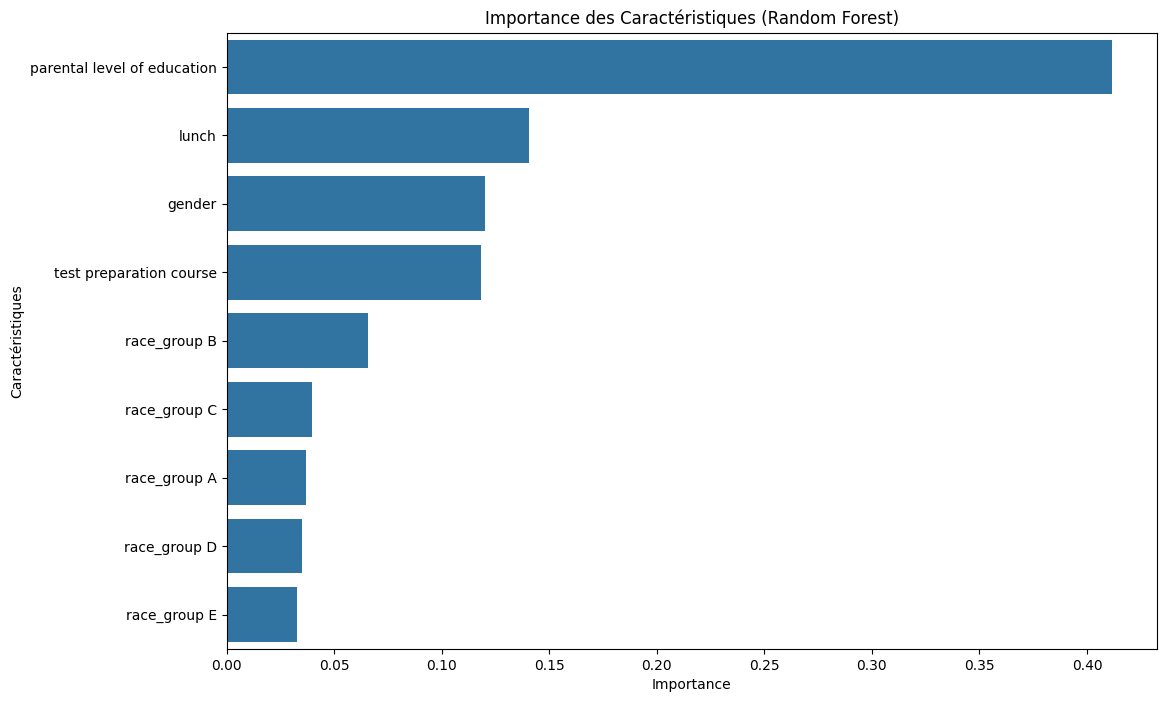

In [ ]:
# Tri de l'importance des caractéristiques par ordre décroissant
sorted_feature_importances = feature_importances.sort_values(ascending=False)
# Création d'un graphique à barres pour visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8)) # Ajustez la taille de la figure si nécessaire
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)

# Ajout de titres et labels pour une meilleure lisibilité
plt.title('Importance des Caractéristiques (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')

In [ ]:
# 1. Modèle AVEC les colonnes "race"
rf_with_race = RandomForestClassifier()
rf_with_race.fit(X, y)
score_with = rf_with_race.score(X, y)

# 2. Modèle SANS les colonnes "race"
X_no_race = X.drop(columns=['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E'])
rf_no_race = RandomForestClassifier()
rf_no_race.fit(X_no_race, y)
score_without = rf_no_race.score(X_no_race, y)

print(f"Score avec race: {score_with}")
print(f"Score sans race: {score_without}")


Score avec race: 0.9
Score sans race: 0.897


In [ ]:
# Création du nouveau DataFrame en supprimant les colonnes 'race_group'
data_class_res_RF = data_class_res.drop(columns=['race_group A', 'race_group B', 'race_group C', 'race_group D', 'race_group E'])

In [ ]:
data_class_res_RF

gender  parental level of education  lunch  test preparation course  \
0         0                            4      1                        0   
1         0                            2      1                        1   
2         0                            5      1                        0   
3         1                            3      0                        0   
4         1                            2      1                        0   
..      ...                          ...    ...                      ...   
995       0                            5      1                        1   
996       1                            1      0                        0   
997       0                            1      0                        1   
998       0                            2      1                        1   
999       0                            2      0                        0   

     result  
0         1  
1         1  
2         1  
3         0  
4         1  
..      ...  
995       1  
996       1  
997       1  
998       1  
999       1  

[1000 rows x 5 columns]

### réduction de dimension via PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 1. Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 2. Appliquer la PCA
# On peut commencer par ne pas spécifier le nombre de composantes pour analyser la variance expliquée
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

In [ ]:
# Analyser la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

Variance expliquée par chaque composante principale :
[1.59798896e-01 1.44775818e-01 1.38823605e-01 1.33628534e-01
 1.14721217e-01 1.05501246e-01 1.02221101e-01 1.00529582e-01
 2.46290280e-16]


In [ ]:
# Calculer la variance cumulée expliquée
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nVariance cumulée expliquée par les composantes principales :")
print(cumulative_explained_variance)



Variance cumulée expliquée par les composantes principales :
[0.1597989  0.30457471 0.44339832 0.57702685 0.69174807 0.79724932
 0.89947042 1.         1.        ]


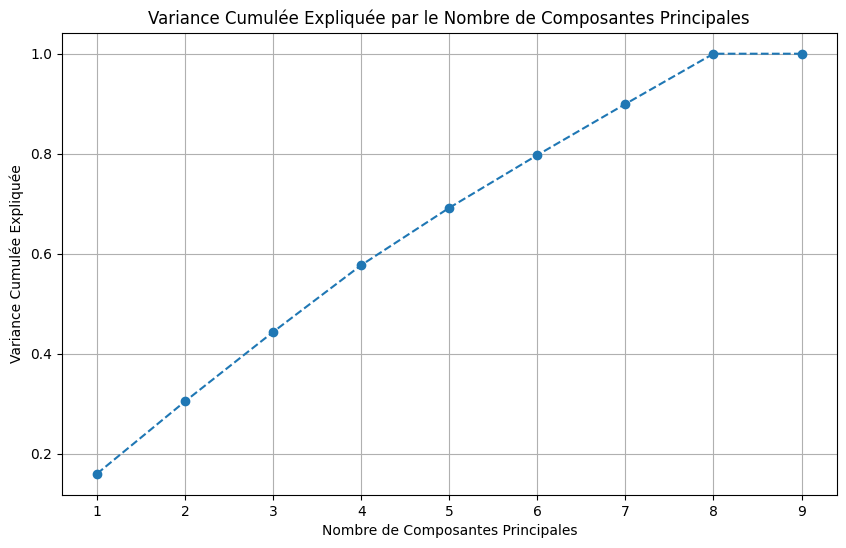

In [ ]:
# 3. Visualiser la variance expliquée pour aider à choisir le nombre de composantes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Variance Cumulée Expliquée par le Nombre de Composantes Principales')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée Expliquée')
plt.grid(True)
plt.show()

In [ ]:
# --------------- Après analyse, choisissez le nombre de composantes à conserver ---------------
# Basé sur variance cumulée expliquée, 7 composantes expliquent environ 90%.
n_components_to_keep = 7

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)

pca_final = PCA(n_components=n_components_to_keep)
X_pca_final = pca_final.fit_transform(X_scaled_full)

In [ ]:
# Créer un nouveau DataFrame avec les composantes principales
# Les noms des colonnes seront 'PC1', 'PC2', etc.
pca_columns = [f'PC{i+1}' for i in range(n_components_to_keep)]
data_class_res_PCA = pd.DataFrame(data=X_pca_final, columns=pca_columns)

# Ajouter la colonne cible au nouveau DataFrame si vous en avez besoin pour la modélisation
data_class_res_PCA['result'] = y.reset_index(drop=True) # Utiliser y du DataFrame original et réinitialiser l'index

print(f"\nNouveau DataFrame avec {n_components_to_keep} composantes principales :")
data_class_res_PCA


Nouveau DataFrame avec 7 composantes principales :


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.232192  1.412320 -0.725658 -1.673591 -0.049959 -1.454084  0.063150   
1    1.868830 -0.237665  0.030232 -0.267658  0.248870  0.972489 -1.083295   
2   -0.162782  1.256527 -0.565786 -1.863232 -0.312516 -1.692228  0.305301   
3   -0.623150  0.393340 -0.079235  3.086156 -1.590979 -1.406076  0.699915   
4    1.350633 -0.489562 -0.205623  0.492913  1.363358 -0.263981  0.944403   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.226652  0.267619  3.188151 -1.348123 -0.852570 -0.204762 -0.614380   
996  1.296911 -0.383534 -0.734408  0.851479 -0.046353  0.171651  1.275847   
997  1.815108 -0.131637 -0.498553  0.090907 -1.160841  1.408120 -0.751852   
998 -1.060842 -1.095117 -0.019186 -0.686729  0.003873  1.178384 -1.466555   
999 -1.218180 -1.420654 -0.853654 -0.527451 -1.159360 -0.360906 -0.483853   

     result  
0         1  
1         1  
2         1  
3         0  
4         1  
..      ...  
995       1  
996       1  
997       1  
998       1  
999       1  

[1000 rows x 8 columns]

### réduction de dimension via PCA + une sélection de features importantes via Random Forest

In [ ]:
# 1. Séparation des features et cible
X_pca3 = data_class_res_PCA.drop(columns=['result'])
y_pca3 = data_class_res_PCA['result']

# 2. Division train/test
X_train_pca3 , X_test_pca3, y_train_pca3, y_test_pca3 = train_test_split(X_pca3, y_pca3, test_size=0.3, random_state=42)

In [ ]:
# 1. Entraîner Random Forest sur les composantes principales
rf = RandomForestClassifier(random_state=42)
rf.fit(X_pca3, y_pca3)

# 2. Obtenir l'importance des composantes principales
importances = rf.feature_importances_

In [ ]:
# 3. Afficher l'importance de chaque composante PCA
for i, imp in enumerate(importances, 1):
    print(f"Importance PC{i}: {imp:.4f}")

Importance PC1: 0.1272
Importance PC2: 0.1159
Importance PC3: 0.1937
Importance PC4: 0.1663
Importance PC5: 0.1487
Importance PC6: 0.1160
Importance PC7: 0.1322


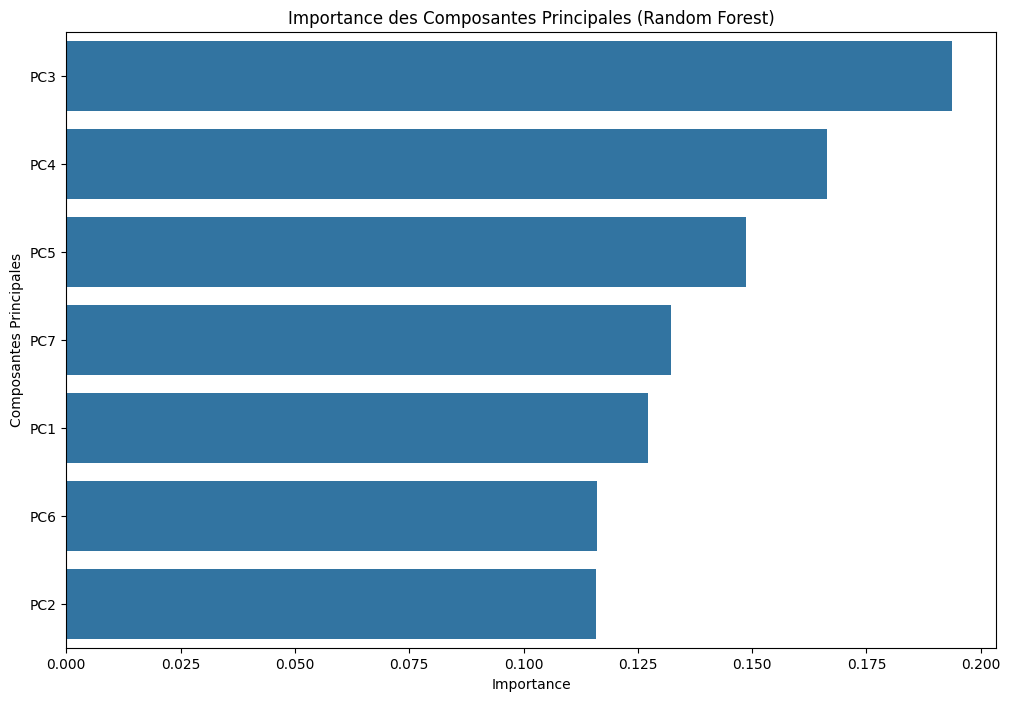

In [ ]:
# Obtenir l'importance des composantes principales
importances = rf.feature_importances_

# Créer une série Pandas pour associer les importances aux noms des composantes principales
feature_importances_pca3 = pd.Series(importances, index=X_pca3.columns)

# Tri de l'importance des caractéristiques par ordre décroissant
sorted_feature_importances_pca3 = feature_importances_pca3.sort_values(ascending=False)

# Création d'un graphique à barres pour visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 8)) # Ajustez la taille de la figure si nécessaire
sns.barplot(x=sorted_feature_importances_pca3, y=sorted_feature_importances_pca3.index)

# Ajout de titres et labels pour une meilleure lisibilité
plt.title('Importance des Composantes Principales (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Composantes Principales')

# Afficher le graphique
plt.show()

## Application des algorithmes pour la classification

### data preparation

In [ ]:
print("data_class_res \n")
data_class_res.info()
print("_________________________________________________")
print("\n")
print("data_class_res_RF\n")
data_class_res_RF.info()
print("_________________________________________________")
print("\n")
print("data_class_res_PCA\n")
data_class_res_PCA.info()

data_class_res 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   race_group A                 1000 non-null   int64
 5   race_group B                 1000 non-null   int64
 6   race_group C                 1000 non-null   int64
 7   race_group D                 1000 non-null   int64
 8   race_group E                 1000 non-null   int64
 9   result                       1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB
_________________________________________________


data_class_res_RF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5

In [ ]:
data_class_res.head(1)

gender  parental level of education  lunch  test preparation course  \
0       0                            4      1                        0   

   race_group A  race_group B  race_group C  race_group D  race_group E  \
0             0             1             0             0             0   

   result  
0       1

In [ ]:
data_class_res_RF.head(1)

gender  parental level of education  lunch  test preparation course  result
0       0                            4      1                        0       1

In [ ]:
data_class_res_PCA.head(1)

PC1      PC2       PC3       PC4       PC5       PC6      PC7  result
0 -0.232192  1.41232 -0.725658 -1.673591 -0.049959 -1.454084  0.06315       1

In [ ]:
def prepare_X_y(df, target='result'):
    return df.drop(columns=[target]), df[target]

X_normal, y_normal = prepare_X_y(data_class_res)
X_rf, y_rf = prepare_X_y(data_class_res_RF)
X_pca, y_pca = prepare_X_y(data_class_res_PCA)

In [ ]:
### -Standardisation + split ---
scaler = StandardScaler()

def scale_and_split(X, y):
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Xn_train, Xn_test, yn_train, yn_test = scale_and_split(X_normal, y_normal)
Xrf_train, Xrf_test, yrf_train, yrf_test = scale_and_split(X_rf, y_rf)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


#### Grid Searh

In [ ]:
# Fonction pour appliquer Grid Search à un jeu de données
def perform_grid_search(X, y, dataset_name=''):
    print(f"\n=== Grid Search pour {dataset_name} ===")

    # Définir les hyperparamètres à tester
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    }

    # Créer le modèle SVC
    svc = SVC()

    # Configuration de la recherche par grille avec validation croisée à 5 plis
    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                               cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

    # Apprentissage
    grid_search.fit(X, y)

    # Résultats
    print(f"Meilleurs paramètres pour {dataset_name} : {grid_search.best_params_}")
    print(f"Meilleure précision pour {dataset_name} : {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_



In [ ]:
# # Appliquer la recherche sur les trois datasets
# model_normal = perform_grid_search(X_normal, y_normal, 'X_normal')
# model_rf = perform_grid_search(X_rf, y_rf, 'X_rf')
# model_pca = perform_grid_search(X_pca, y_pca, 'X_pca')



# # === Grid Search pour X_normal ===
# # Fitting 5 folds for each of 24 candidates, totalling 120 fits
# # Meilleurs paramètres pour X_normal : {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
# # Meilleure précision pour X_normal : 0.5395

# # === Grid Search pour X_rf ===
# # Fitting 5 folds for each of 24 candidates, totalling 120 fits
# # Meilleurs paramètres pour X_rf : {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
# # Meilleure précision pour X_rf : 0.5369

# # === Grid Search pour X_pca ===
# # Fitting 5 folds for each of 24 candidates, totalling 120 fits
# # Meilleurs paramètres pour X_pca : {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
# # Meilleure précision pour X_pca : 0.5230

#### 1.  *** mauvaise SVC classification ***




In [ ]:
# Création manuelle des modèles finaux
model_normal = SVC(C=0.1, kernel='linear', gamma='scale')
model_rf = SVC(C=0.1, kernel='linear', gamma='scale')
model_pca = SVC(C=0.1, kernel='linear', gamma='scale')

# Entraînement sur les jeux d'entraînement
model_normal.fit(Xn_train, yn_train)
model_rf.fit(Xrf_train, yrf_train)
model_pca.fit(Xpca_train, ypca_train)


SVC(C=0.1, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, dataset_name):
    """
    Évalue un modèle de classification et affiche les métriques.
    """
    print(f"\n=== Évaluation du modèle sur {dataset_name} ===")

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {accuracy:.4f}")

    # Calcul du F1-score (macro average pour les classes déséquilibrées si nécessaire)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"F1-score (macro) : {f1:.4f}")

    # Affichage du rapport de classification (precision, recall, f1-score par classe)
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de Confusion pour {dataset_name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()




=== Évaluation du modèle sur data_class_res (Normal) ===
Accuracy : 0.8650
F1-score (macro) : 0.4638

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


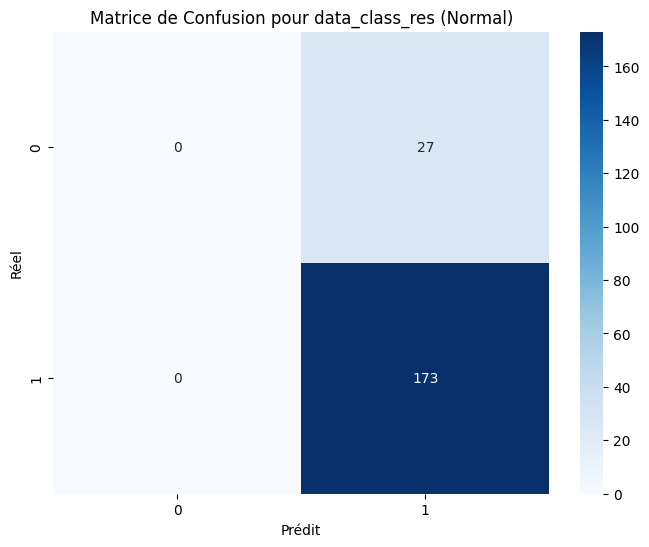


=== Évaluation du modèle sur data_class_res_RF ===
Accuracy : 0.8650
F1-score (macro) : 0.4638

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


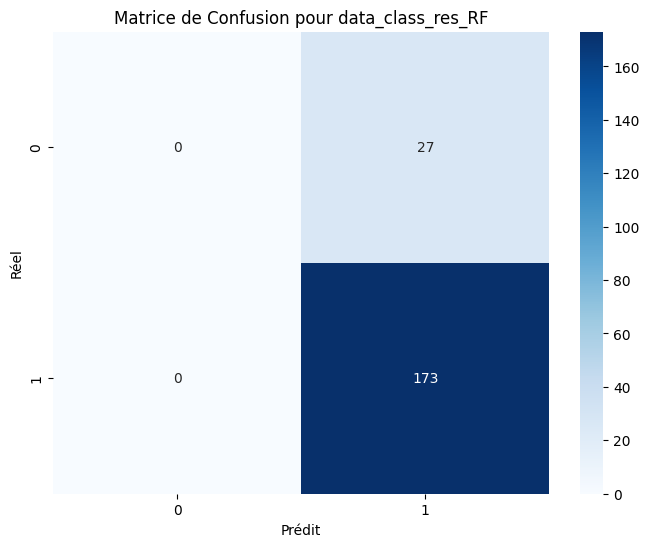


=== Évaluation du modèle sur data_class_res_PCA ===
Accuracy : 0.8650
F1-score (macro) : 0.4638

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


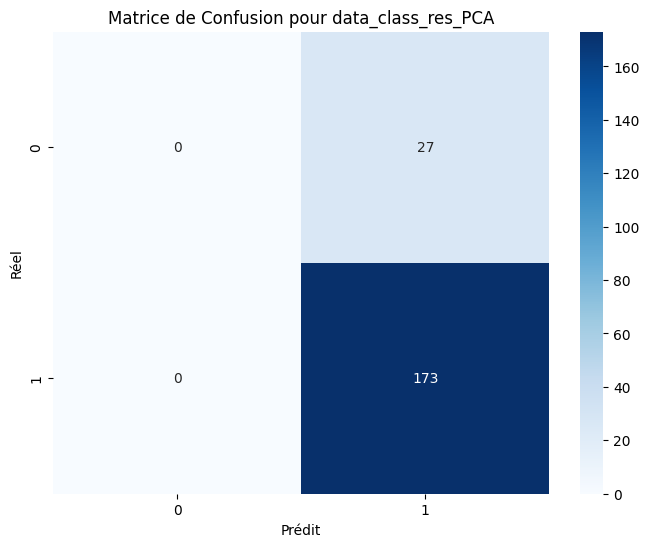

In [ ]:
# Évaluer chaque modèle sur son ensemble de test respectif
evaluate_model(model_normal, Xn_test, yn_test, 'data_class_res (Normal)')
evaluate_model(model_rf, Xrf_test, yrf_test, 'data_class_res_RF')
evaluate_model(model_pca, Xpca_test, ypca_test, 'data_class_res_PCA')

####2.   ***SVC classification amélioration*** *(class_weight='balanced')*


In [ ]:
# Création manuelle des modèles finaux
model_normal = SVC(C=10, kernel='linear', class_weight='balanced',gamma='scale')
model_rf = SVC(C=10, kernel='linear', class_weight='balanced',gamma='scale')
model_pca = SVC(C=10, kernel='linear', class_weight='balanced',gamma='scale')



# Entraînement sur les jeux d'entraînement
model_normal.fit(Xn_train, yn_train)
model_rf.fit(Xrf_train, yrf_train)
model_pca.fit(Xpca_train, ypca_train)


SVC(C=10, class_weight='balanced', kernel='linear')


=== Évaluation du modèle sur data_class_res ===
Accuracy : 0.6800
F1-score (macro) : 0.5614

Rapport de classification :
              precision    recall  f1-score   support

           0       0.23      0.59      0.33        27
           1       0.92      0.69      0.79       173

    accuracy                           0.68       200
   macro avg       0.57      0.64      0.56       200
weighted avg       0.82      0.68      0.73       200



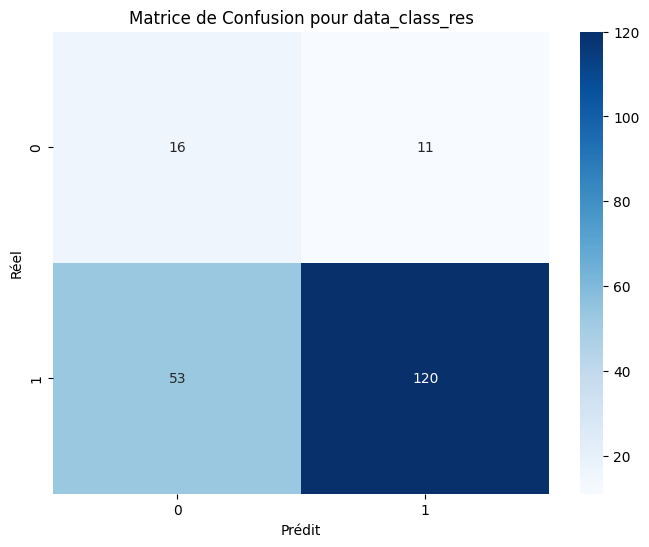


=== Évaluation du modèle sur data_class_res_RF ===
Accuracy : 0.6250
F1-score (macro) : 0.5375

Rapport de classification :
              precision    recall  f1-score   support

           0       0.22      0.70      0.34        27
           1       0.93      0.61      0.74       173

    accuracy                           0.62       200
   macro avg       0.58      0.66      0.54       200
weighted avg       0.83      0.62      0.68       200



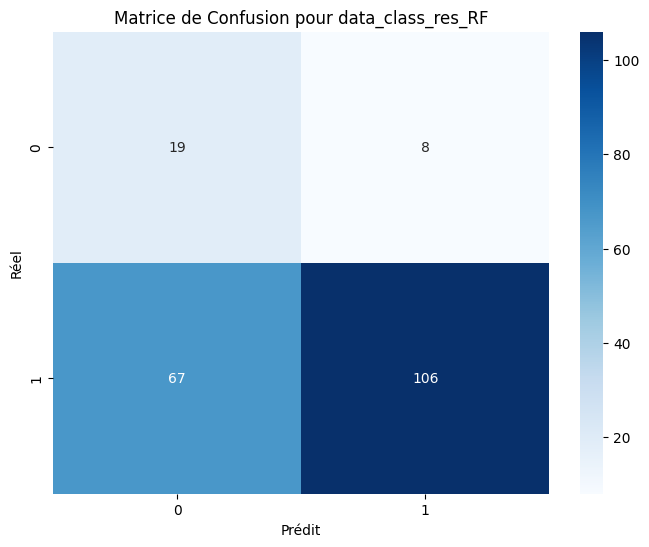


=== Évaluation du modèle sur data_class_res_PCA ===
Accuracy : 0.6050
F1-score (macro) : 0.5179

Rapport de classification :
              precision    recall  f1-score   support

           0       0.20      0.67      0.31        27
           1       0.92      0.60      0.72       173

    accuracy                           0.60       200
   macro avg       0.56      0.63      0.52       200
weighted avg       0.82      0.60      0.67       200



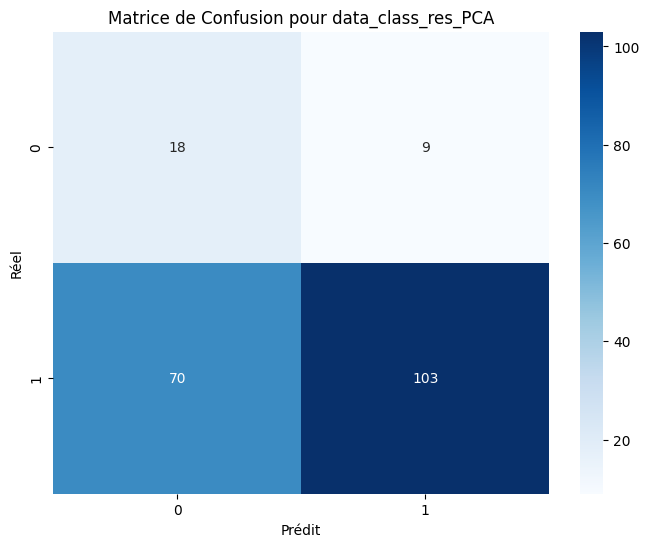

In [ ]:
# Évaluer chaque modèle sur son ensemble de test respectif
evaluate_model(model_normal, Xn_test, yn_test, 'data_class_res')
evaluate_model(model_rf, Xrf_test, yrf_test, 'data_class_res_RF')
evaluate_model(model_pca, Xpca_test, ypca_test, 'data_class_res_PCA')

Dans ce cas, le modèle a commencé à prédire les 0 et les 1, mais avec une accuracy de 0.67.

#### 3.  **SVC classification amélioration 2** (SMOTE_ADASYN_SMOTETOMEK)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Fonction de suréchantillonnage et d'entraînement pour SVC, retournant les métriques
def train_SVC(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n=== Entraînement SVC avec {method_name} sur {dataset_name} ===")

    # Choix de la méthode de suréchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Add a case for no oversampling for comparison
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Suréchantillonnage (si un échantillonneur est sélectionné)
    if sampler:
        X_res, y_res = sampler.fit_resample(X_train, y_train)
    else:
        X_res, y_res = X_train, y_train # Use original data if no sampler

    # Entraîner le modèle SVC

    model = SVC(C=10, kernel='linear', class_weight='balanced',gamma='scale')
    #model = SVC(C=0.1, kernel='linear', gamma='scale', class_weight='balanced', random_state=42)

    model.fit(X_res, y_res)

    # Prédiction sur le jeu de test
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== Évaluation SVC avec {method_name} sur {dataset_name} ===")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Affichage du rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, digits=4))

    # Créer un dictionnaire des métriques
    metrics = {
        'Model': 'SVC',
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }


    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics # Retourner le dictionnaire


=== Entraînement SVC avec None sur X_normal ===

=== Évaluation SVC avec None sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2319    0.5926    0.3333        27
           1     0.9160    0.6936    0.7895       173

    accuracy                         0.6800       200
   macro avg     0.5740    0.6431    0.5614       200
weighted avg     0.8237    0.6800    0.7279       200



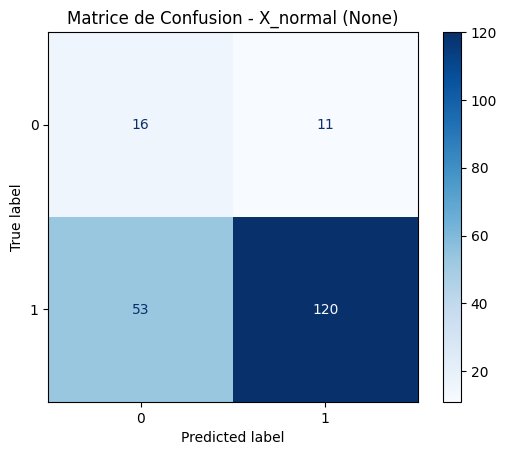


=== Entraînement SVC avec SMOTE sur X_normal ===

=== Évaluation SVC avec SMOTE sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



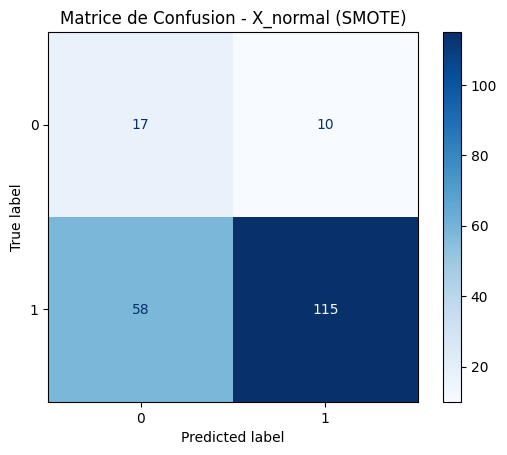


=== Entraînement SVC avec ADASYN sur X_normal ===

=== Évaluation SVC avec ADASYN sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2278    0.6667    0.3396        27
           1     0.9256    0.6474    0.7619       173

    accuracy                         0.6500       200
   macro avg     0.5767    0.6570    0.5508       200
weighted avg     0.8314    0.6500    0.7049       200



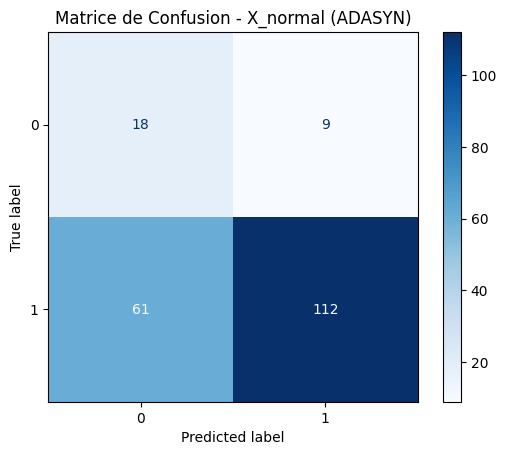


=== Entraînement SVC avec SMOTETomek sur X_normal ===

=== Évaluation SVC avec SMOTETomek sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



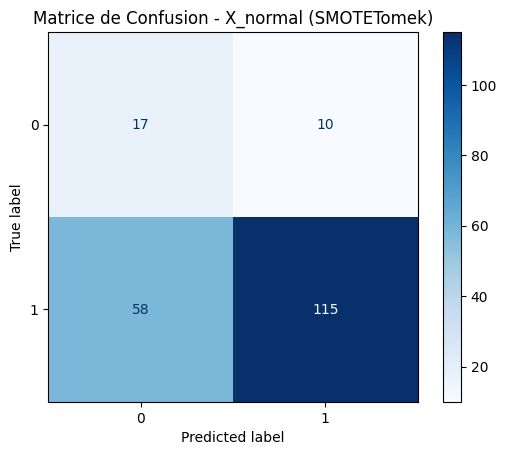


=== Entraînement SVC avec None sur X_rf ===

=== Évaluation SVC avec None sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2209    0.7037    0.3363        27
           1     0.9298    0.6127    0.7387       173

    accuracy                         0.6250       200
   macro avg     0.5754    0.6582    0.5375       200
weighted avg     0.8341    0.6250    0.6844       200



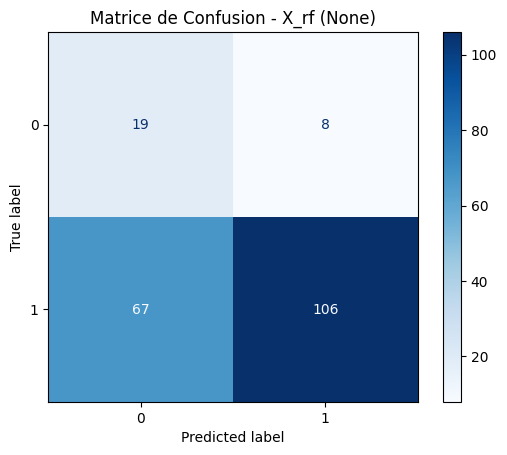


=== Entraînement SVC avec SMOTE sur X_rf ===

=== Évaluation SVC avec SMOTE sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2235    0.7037    0.3393        27
           1     0.9304    0.6185    0.7431       173

    accuracy                         0.6300       200
   macro avg     0.5770    0.6611    0.5412       200
weighted avg     0.8350    0.6300    0.6885       200



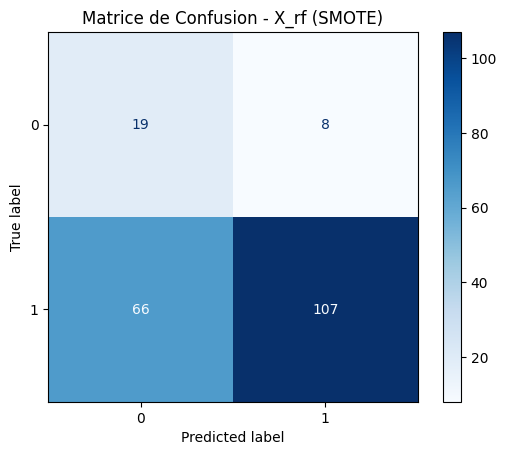


=== Entraînement SVC avec ADASYN sur X_rf ===

=== Évaluation SVC avec ADASYN sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2209    0.7037    0.3363        27
           1     0.9298    0.6127    0.7387       173

    accuracy                         0.6250       200
   macro avg     0.5754    0.6582    0.5375       200
weighted avg     0.8341    0.6250    0.6844       200



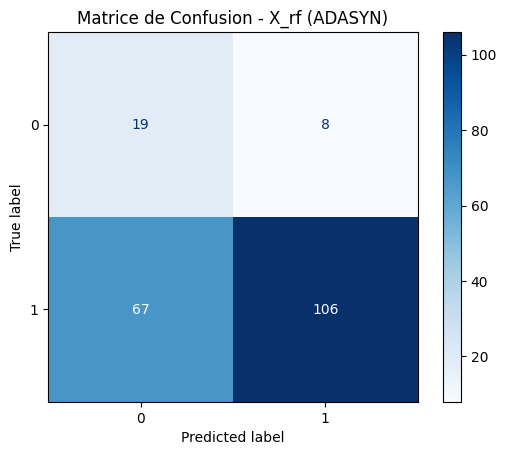


=== Entraînement SVC avec SMOTETomek sur X_rf ===

=== Évaluation SVC avec SMOTETomek sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2235    0.7037    0.3393        27
           1     0.9304    0.6185    0.7431       173

    accuracy                         0.6300       200
   macro avg     0.5770    0.6611    0.5412       200
weighted avg     0.8350    0.6300    0.6885       200



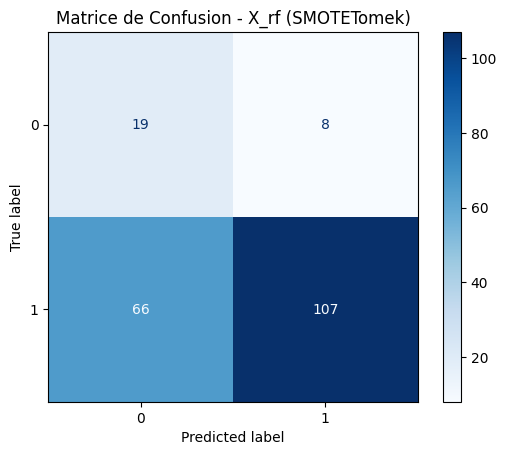


=== Entraînement SVC avec None sur X_pca ===

=== Évaluation SVC avec None sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2045    0.6667    0.3130        27
           1     0.9196    0.5954    0.7228       173

    accuracy                         0.6050       200
   macro avg     0.5621    0.6310    0.5179       200
weighted avg     0.8231    0.6050    0.6675       200



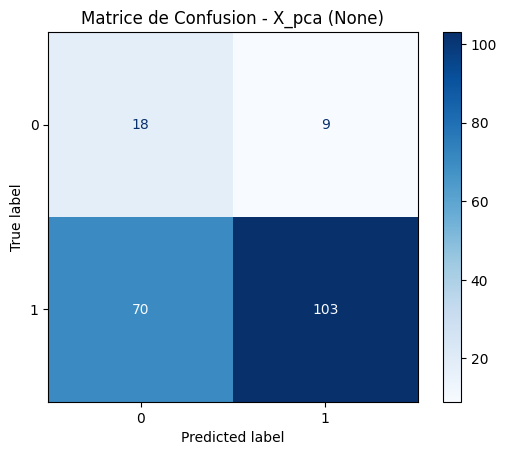


=== Entraînement SVC avec SMOTE sur X_pca ===

=== Évaluation SVC avec SMOTE sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1412    0.4444    0.2143        27
           1     0.8696    0.5780    0.6944       173

    accuracy                         0.5600       200
   macro avg     0.5054    0.5112    0.4544       200
weighted avg     0.7712    0.5600    0.6296       200



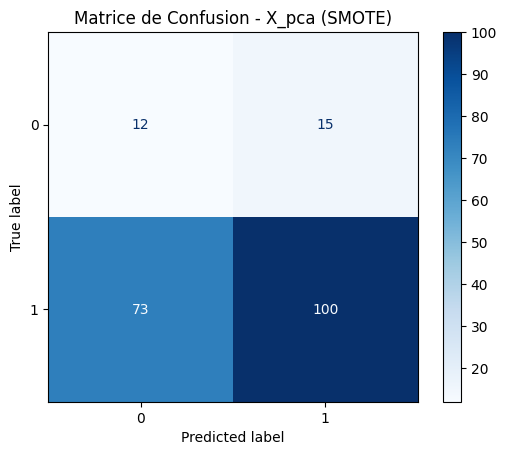


=== Entraînement SVC avec ADASYN sur X_pca ===

=== Évaluation SVC avec ADASYN sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1954    0.6296    0.2982        27
           1     0.9115    0.5954    0.7203       173

    accuracy                         0.6000       200
   macro avg     0.5535    0.6125    0.5093       200
weighted avg     0.8148    0.6000    0.6633       200



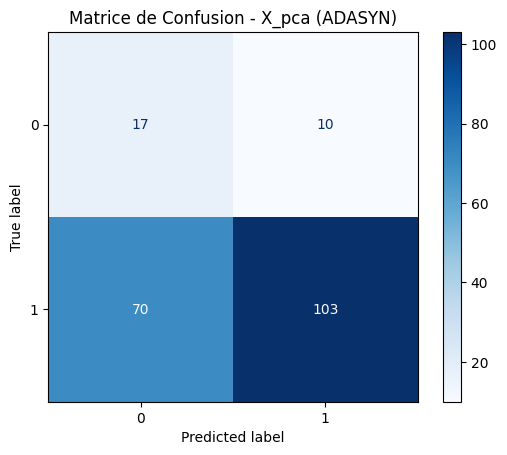


=== Entraînement SVC avec SMOTETomek sur X_pca ===

=== Évaluation SVC avec SMOTETomek sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1412    0.4444    0.2143        27
           1     0.8696    0.5780    0.6944       173

    accuracy                         0.5600       200
   macro avg     0.5054    0.5112    0.4544       200
weighted avg     0.7712    0.5600    0.6296       200



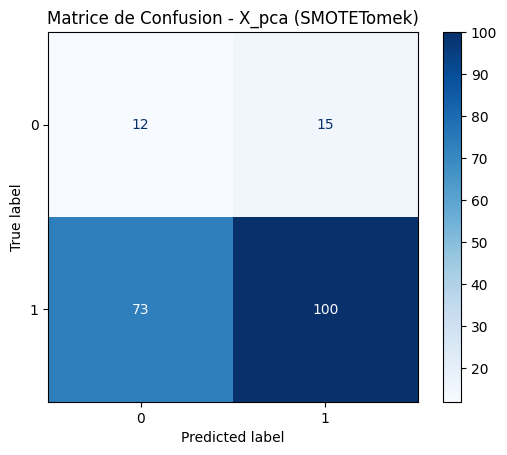

In [ ]:
all_svc_metrics = []

# Liste des datasets et leurs correspondants splits
datasets = {
    "X_normal": (Xn_train, yn_train, Xn_test, yn_test),
    "X_rf": (Xrf_train, yrf_train, Xrf_test, yrf_test),
    "X_pca": (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Liste des méthodes de rééchantillonnage, incluant 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Boucle à travers les datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Boucle à travers les méthodes de rééchantillonnage
    for method_name in resampling_methods:
        # Appelle la fonction modifiée pour entraîner, évaluer et collecter les métriques
        metrics = train_SVC(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_svc_metrics.append(metrics)

# Créer le DataFrame de comparaison pour SVC
svc_comparison_df = pd.DataFrame(all_svc_metrics)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_class_distribution(y_list, titles):
    plt.figure(figsize=(18, 4))

    for i, y in enumerate(y_list):
        plt.subplot(1, len(y_list), i+1)
        sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
        plt.title(titles[i])
        plt.xlabel("Classe")
        plt.ylabel("Nombre d'échantillons")
        plt.xticks([0, 1])
        plt.grid(True)

    plt.tight_layout()
    plt.show()


<ipython-input-45-d8c10fdb7609>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
<ipython-input-45-d8c10fdb7609>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
<ipython-input-45-d8c10fdb7609>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()), palette='viridis')
<ipython-input-45-d8c10fdb7609>:10: FutureWarning: 

Passing `palette` witho

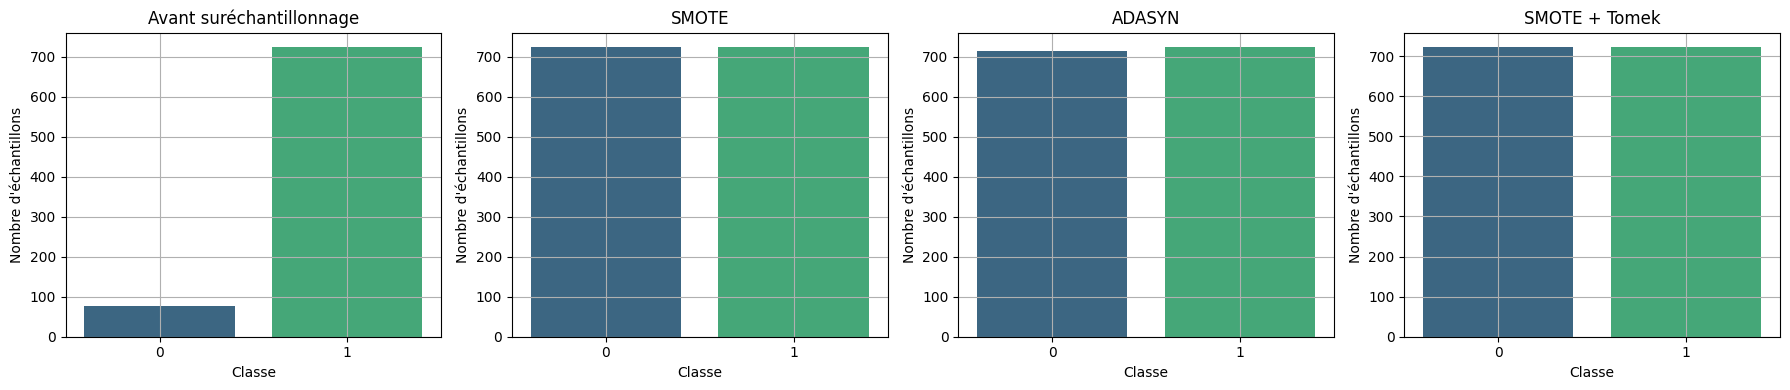

In [ ]:
# Appliquer SMOTE, ADASYN, SMOTE + Tomek
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
smote_tomek = SMOTETomek(random_state=42)

X_smote, y_smote = smote.fit_resample(Xn_train, yn_train)
X_adasyn, y_adasyn = adasyn.fit_resample(Xn_train, yn_train)
X_smt, y_smt = smote_tomek.fit_resample(Xn_train, yn_train)

# Affichage de la distribution
plot_class_distribution(
    [yn_train, y_smote, y_adasyn, y_smt],
    ["Avant suréchantillonnage", "SMOTE", "ADASYN", "SMOTE + Tomek"]
)


##### svc_comparison_df

In [ ]:
svc_comparison_df
#none : cad j'ai j'ai fait juste balanced

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0    SVC  X_normal              None     0.680             0.231884   
1    SVC  X_normal             SMOTE     0.660             0.226667   
2    SVC  X_normal            ADASYN     0.650             0.227848   
3    SVC  X_normal        SMOTETomek     0.660             0.226667   
4    SVC      X_rf              None     0.625             0.220930   
5    SVC      X_rf             SMOTE     0.630             0.223529   
6    SVC      X_rf            ADASYN     0.625             0.220930   
7    SVC      X_rf        SMOTETomek     0.630             0.223529   
8    SVC     X_pca              None     0.605             0.204545   
9    SVC     X_pca             SMOTE     0.560             0.141176   
10   SVC     X_pca            ADASYN     0.600             0.195402   
11   SVC     X_pca        SMOTETomek     0.560             0.141176   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.592593            0.333333             0.916031   
1           0.629630            0.333333             0.920000   
2           0.666667            0.339623             0.925620   
3           0.629630            0.333333             0.920000   
4           0.703704            0.336283             0.929825   
5           0.703704            0.339286             0.930435   
6           0.703704            0.336283             0.929825   
7           0.703704            0.339286             0.930435   
8           0.666667            0.313043             0.919643   
9           0.444444            0.214286             0.869565   
10          0.629630            0.298246             0.911504   
11          0.444444            0.214286             0.869565   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.693642            0.789474             0.573957   
1           0.664740            0.771812             0.573333   
2           0.647399            0.761905             0.576734   
3           0.664740            0.771812             0.573333   
4           0.612717            0.738676             0.575377   
5           0.618497            0.743056             0.576982   
6           0.612717            0.738676             0.575377   
7           0.618497            0.743056             0.576982   
8           0.595376            0.722807             0.562094   
9           0.578035            0.694444             0.505371   
10          0.595376            0.720280             0.553453   
11          0.578035            0.694444             0.505371   

    Macro Avg Recall  Macro Avg F1-score  
0           0.643117            0.561404  
1           0.647185            0.552573  
2           0.657033            0.550764  
3           0.647185            0.552573  
4           0.658210            0.537480  
5           0.661100            0.541171  
6           0.658210            0.537480  
7           0.661100            0.541171  
8           0.631021            0.517925  
9           0.511240            0.454365  
10          0.612503            0.509263  
11          0.511240            0.454365

##### Visualisation SVC

Ce graphique permet de visualiser clairement la performance globale des modèles en termes de Macro Avg F1-score, une métrique robuste qui prend en compte l’équilibre entre précision et rappel sur toutes les classes, sans être biaisée par la disproportion des classes. Le barplot montre, pour chaque jeu de données (Dataset) et chaque méthode de rééchantillonnage (resampling), la qualité du modèle, facilitant ainsi la comparaison visuelle des différentes configurations.

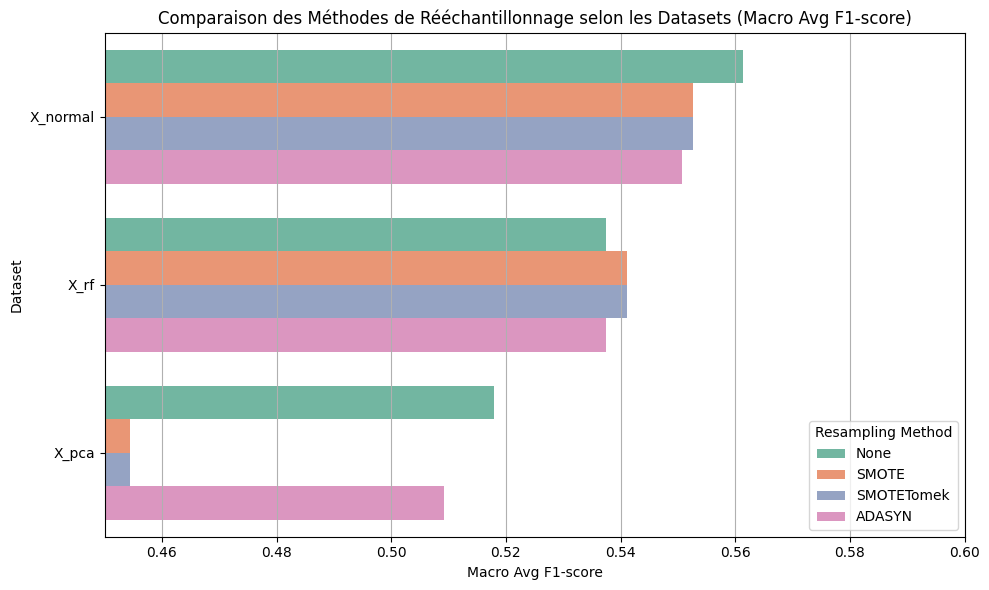

In [ ]:
# Tri dans chaque dataset pour l'affichage clair
svc_comparison_df["Dataset"] = pd.Categorical(svc_comparison_df["Dataset"], categories=["X_normal", "X_rf", "X_pca"], ordered=True)
svc_comparison_df.sort_values(by=["Dataset", "Macro Avg F1-score"], ascending=[True, False], inplace=True)

# Graphique horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    data=svc_comparison_df,
    y="Dataset", x="Macro Avg F1-score",
    hue="Resampling Method", orient="h", palette="Set2"
)

plt.title("Comparaison des Méthodes de Rééchantillonnage selon les Datasets (Macro Avg F1-score)")
plt.xlabel("Macro Avg F1-score")
plt.ylabel("Dataset")
plt.xlim(0.45, 0.60)
plt.legend(title="Resampling Method", loc="lower right")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()


La heatmap présente les performances des modèles sous forme matricielle, ce qui permet d’identifier rapidement les meilleures combinaisons Dataset × méthode de resampling. L’utilisation d’une palette de couleurs graduées facilite la perception des différences de performance et met en évidence les points forts et faibles, favorisant une prise de décision plus rapide.

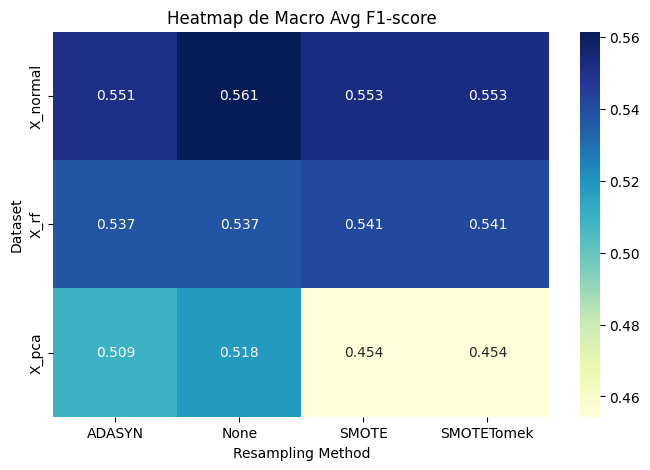

In [ ]:
pivot_f1 = svc_comparison_df.pivot(index='Dataset', columns='Resampling Method', values='Macro Avg F1-score')

plt.figure(figsize=(8,5))
sns.heatmap(pivot_f1, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Heatmap de Macro Avg F1-score')
plt.show()


En complément des visualisations graphiques, nous présentons un tableau trié par Macro Avg F1-score décroissant, afin d’identifier explicitement les configurations les plus performantes. Ce classement aide à valider les observations graphiques et fournit une liste claire des meilleurs modèles à retenir pour un usage ultérieur.

In [ ]:
svc_comparison_df.sort_values(by='Macro Avg F1-score', ascending=False).head(5)

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0   SVC  X_normal              None      0.68             0.231884   
1   SVC  X_normal             SMOTE      0.66             0.226667   
3   SVC  X_normal        SMOTETomek      0.66             0.226667   
2   SVC  X_normal            ADASYN      0.65             0.227848   
5   SVC      X_rf             SMOTE      0.63             0.223529   

   Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0          0.592593            0.333333             0.916031   
1          0.629630            0.333333             0.920000   
3          0.629630            0.333333             0.920000   
2          0.666667            0.339623             0.925620   
5          0.703704            0.339286             0.930435   

   Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0          0.693642            0.789474             0.573957   
1          0.664740            0.771812             0.573333   
3          0.664740            0.771812             0.573333   
2          0.647399            0.761905             0.576734   
5          0.618497            0.743056             0.576982   

   Macro Avg Recall  Macro Avg F1-score  
0          0.643117            0.561404  
1          0.647185            0.552573  
3          0.647185            0.552573  
2          0.657033            0.550764  
5          0.661100            0.541171

### NAIVE BAYES

####GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def find_best_params_naive_bayes(X_train, y_train):
    """
    Recherche des meilleurs paramètres pour GaussianNB via GridSearchCV.
    """
    print("Recherche des meilleurs paramètres pour Naive Bayes...")

    param_grid = {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
    }

    gnb = GaussianNB()
    grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"Meilleurs paramètres trouvés: {grid_search.best_params_}")
    print(f"Meilleur score de validation: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test, dataset_name=''):
    """
    Évalue et affiche le rapport de classification et la matrice de confusion.
    """
    y_pred = model.predict(X_test)

    print(f"\nÉvaluation du modèle Naive Bayes sur {dataset_name} :")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matrice de confusion - {dataset_name}')
    plt.show()

In [ ]:
# # 2. Trouver le meilleur modèle
# best_nb_model = find_best_params_naive_bayes(Xn_train, yn_train)  # Ici Xn_train, yn_train = données normales entraînement


# # Recherche des meilleurs paramètres pour Naive Bayes...
# # Fitting 5 folds for each of 4 candidates, totalling 20 fits
# # Meilleurs paramètres trouvés: {'var_smoothing': 1e-09}
# # Meilleur score de validation: 0.6117

In [ ]:
# 3. Évaluer sur le test
#evaluate_model(best_nb_model, Xn_test, yn_test, 'Données normales')

NameError: name 'best_nb_model' is not defined

#### NB normal


=== Naive Bayes sur X_normal (sans rééquilibrage, var_smoothing=1e-09) ===
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



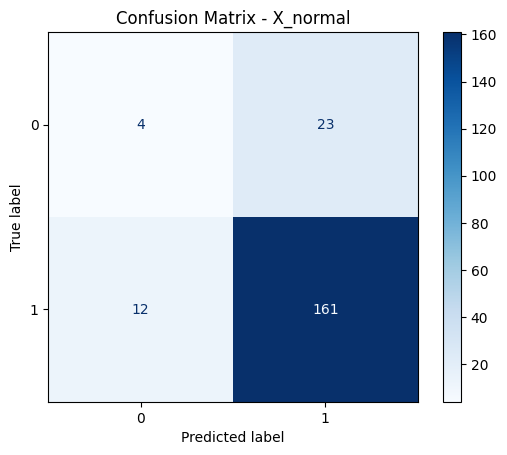


=== Naive Bayes sur X_rf (sans rééquilibrage, var_smoothing=1e-09) ===
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


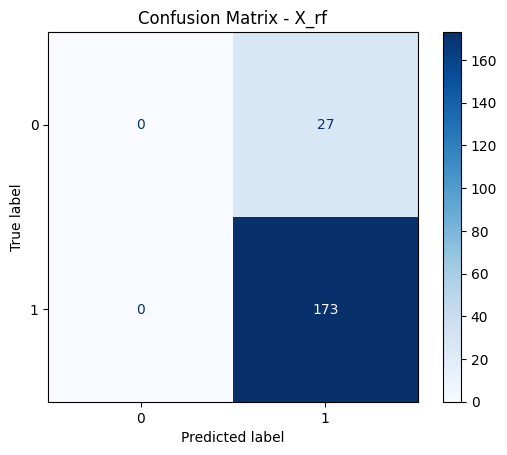


=== Naive Bayes sur X_pca (sans rééquilibrage, var_smoothing=1e-09) ===
              precision    recall  f1-score   support

           0     1.0000    0.1111    0.2000        27
           1     0.8782    1.0000    0.9351       173

    accuracy                         0.8800       200
   macro avg     0.9391    0.5556    0.5676       200
weighted avg     0.8946    0.8800    0.8359       200



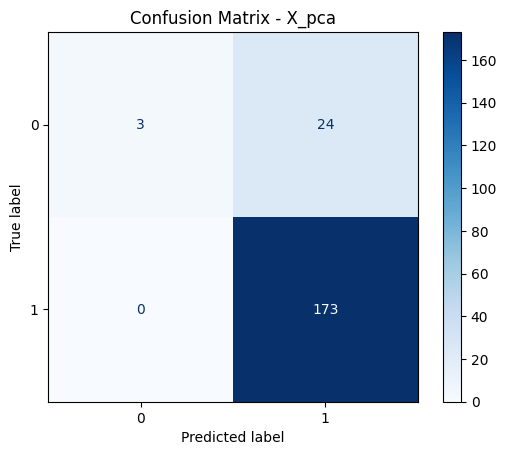

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_naive_bayes(X_train, y_train, X_test, y_test, dataset_name):
    # Création du modèle avec le paramètre var_smoothing spécifié
    model = GaussianNB(var_smoothing=1e-09)

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== Naive Bayes sur {dataset_name} (sans rééquilibrage, var_smoothing=1e-09) ===")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.grid(False)
    plt.show()

# Appliquer sur les 3 datasets normaux
evaluate_naive_bayes(Xn_train, yn_train, Xn_test, yn_test, "X_normal")
evaluate_naive_bayes(Xrf_train, yrf_train, Xrf_test, yrf_test, "X_rf")
evaluate_naive_bayes(Xpca_train, ypca_train, Xpca_test, ypca_test, "X_pca")

#### NB avec (SMOTE_ADASYN_SMOTETOMEK)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd # N'oublie pas d'importer pandas


def train_NB(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n=== Entraînement Naive Bayes avec {method_name} sur {dataset_name} ===")

    # Choisir la méthode de rééquilibrage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Ajout du cas 'None'
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Rééquilibrage (si un sampler est sélectionné)
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train # Utiliser les données originales


    # Naive Bayes n'a pas de paramètre class_weight comme SVC ou LR.
    model = GaussianNB(var_smoothing=1e-09)
    model.fit(X_resampled, y_resampled)

    # Évaluation sur le test
    y_pred = model.predict(X_test)

    print(f"\n=== Évaluation Naive Bayes avec {method_name} sur {dataset_name} ===")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Affichage du rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, digits=4))

    # Créer un dictionnaire des métriques
    metrics = {
        'Model': 'Naive Bayes', # Nom du modèle
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics # Retourner le dictionnaire


=== Entraînement Naive Bayes avec None sur X_normal ===

=== Évaluation Naive Bayes avec None sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



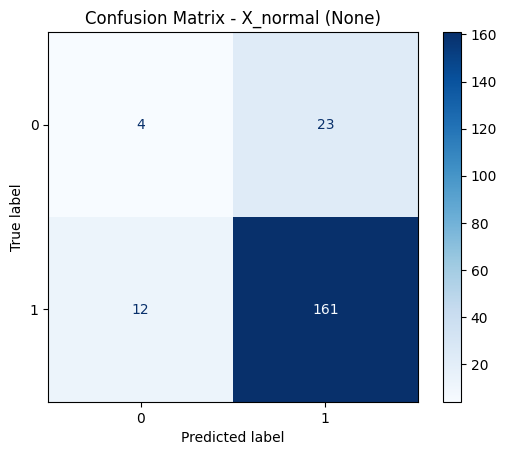


=== Entraînement Naive Bayes avec SMOTE sur X_normal ===

=== Évaluation Naive Bayes avec SMOTE sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2131    0.4815    0.2955        27
           1     0.8993    0.7225    0.8013       173

    accuracy                         0.6900       200
   macro avg     0.5562    0.6020    0.5484       200
weighted avg     0.8066    0.6900    0.7330       200



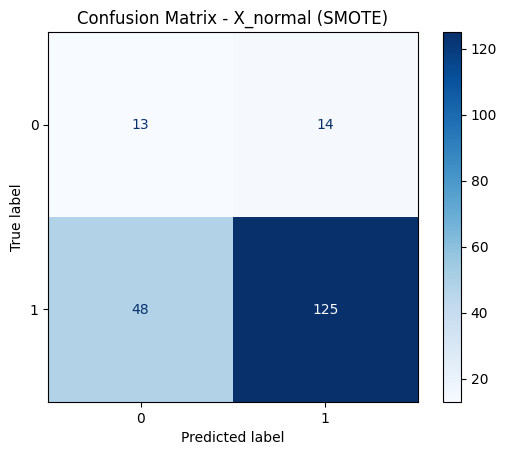


=== Entraînement Naive Bayes avec ADASYN sur X_normal ===

=== Évaluation Naive Bayes avec ADASYN sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2113    0.5556    0.3061        27
           1     0.9070    0.6763    0.7748       173

    accuracy                         0.6600       200
   macro avg     0.5591    0.6159    0.5405       200
weighted avg     0.8131    0.6600    0.7116       200



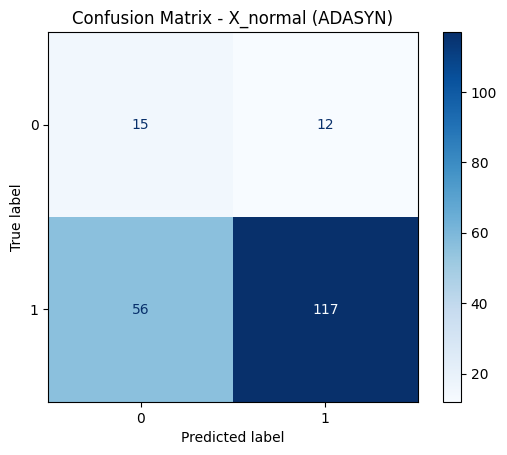


=== Entraînement Naive Bayes avec SMOTETomek sur X_normal ===

=== Évaluation Naive Bayes avec SMOTETomek sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2131    0.4815    0.2955        27
           1     0.8993    0.7225    0.8013       173

    accuracy                         0.6900       200
   macro avg     0.5562    0.6020    0.5484       200
weighted avg     0.8066    0.6900    0.7330       200



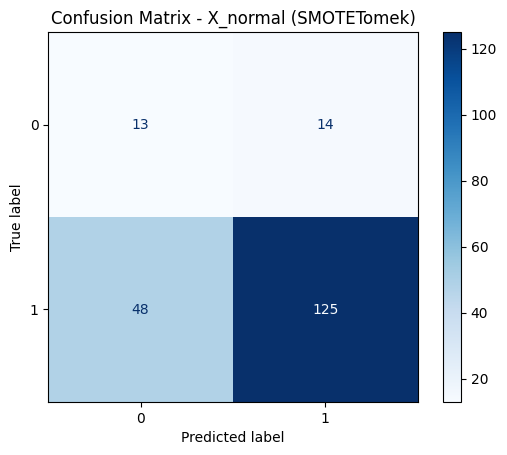


=== Entraînement Naive Bayes avec None sur X_rf ===

=== Évaluation Naive Bayes avec None sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

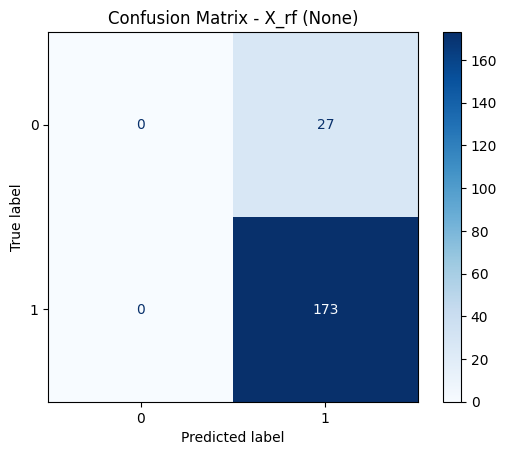


=== Entraînement Naive Bayes avec SMOTE sur X_rf ===

=== Évaluation Naive Bayes avec SMOTE sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2169    0.6667    0.3273        27
           1     0.9231    0.6243    0.7448       173

    accuracy                         0.6300       200
   macro avg     0.5700    0.6455    0.5361       200
weighted avg     0.8277    0.6300    0.6885       200



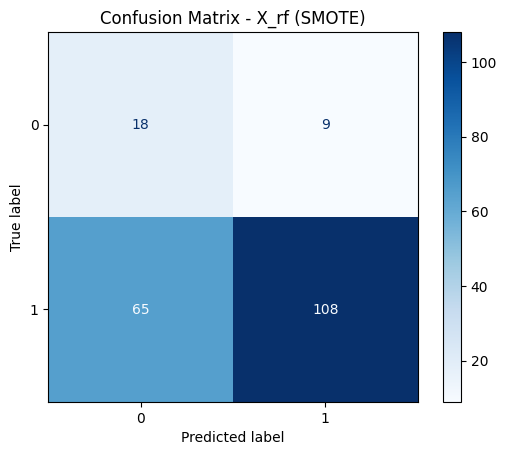


=== Entraînement Naive Bayes avec ADASYN sur X_rf ===

=== Évaluation Naive Bayes avec ADASYN sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2169    0.6667    0.3273        27
           1     0.9231    0.6243    0.7448       173

    accuracy                         0.6300       200
   macro avg     0.5700    0.6455    0.5361       200
weighted avg     0.8277    0.6300    0.6885       200



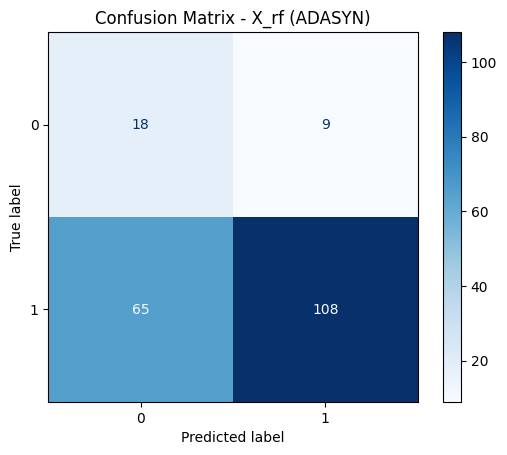


=== Entraînement Naive Bayes avec SMOTETomek sur X_rf ===

=== Évaluation Naive Bayes avec SMOTETomek sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2169    0.6667    0.3273        27
           1     0.9231    0.6243    0.7448       173

    accuracy                         0.6300       200
   macro avg     0.5700    0.6455    0.5361       200
weighted avg     0.8277    0.6300    0.6885       200



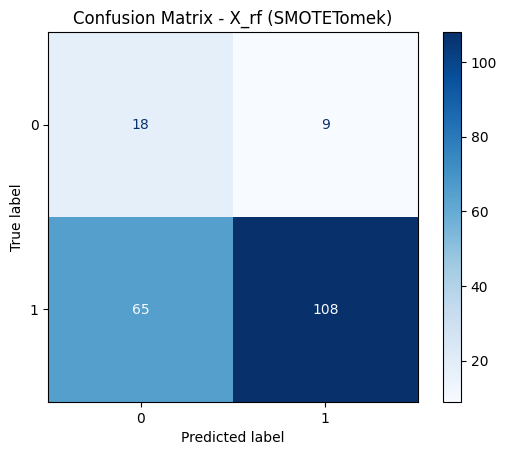


=== Entraînement Naive Bayes avec None sur X_pca ===

=== Évaluation Naive Bayes avec None sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     1.0000    0.1111    0.2000        27
           1     0.8782    1.0000    0.9351       173

    accuracy                         0.8800       200
   macro avg     0.9391    0.5556    0.5676       200
weighted avg     0.8946    0.8800    0.8359       200



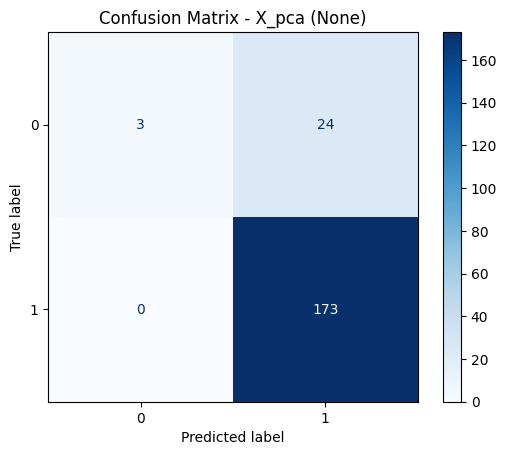


=== Entraînement Naive Bayes avec SMOTE sur X_pca ===

=== Évaluation Naive Bayes avec SMOTE sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1944    0.5185    0.2828        27
           1     0.8984    0.6647    0.7641       173

    accuracy                         0.6450       200
   macro avg     0.5464    0.5916    0.5235       200
weighted avg     0.8034    0.6450    0.6991       200



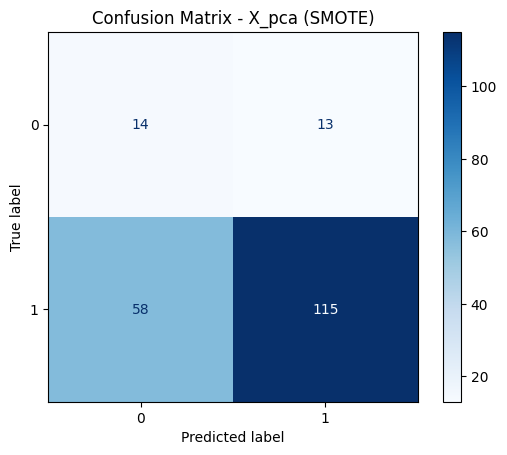


=== Entraînement Naive Bayes avec ADASYN sur X_pca ===

=== Évaluation Naive Bayes avec ADASYN sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2048    0.6296    0.3091        27
           1     0.9145    0.6185    0.7379       173

    accuracy                         0.6200       200
   macro avg     0.5597    0.6241    0.5235       200
weighted avg     0.8187    0.6200    0.6800       200



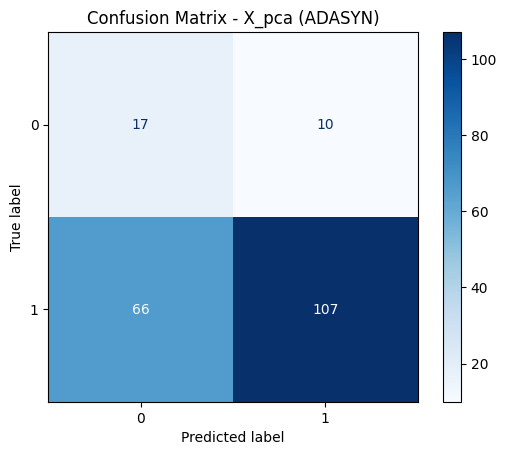


=== Entraînement Naive Bayes avec SMOTETomek sur X_pca ===

=== Évaluation Naive Bayes avec SMOTETomek sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1944    0.5185    0.2828        27
           1     0.8984    0.6647    0.7641       173

    accuracy                         0.6450       200
   macro avg     0.5464    0.5916    0.5235       200
weighted avg     0.8034    0.6450    0.6991       200



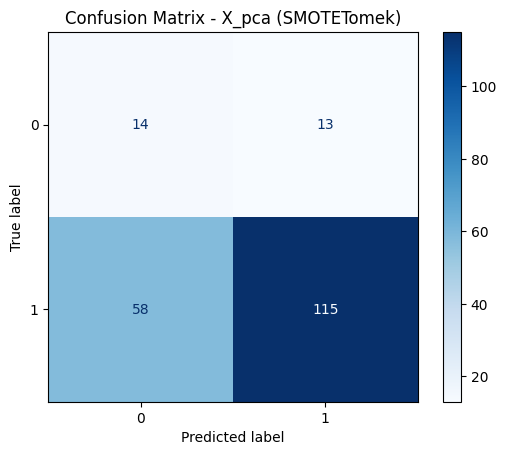

In [ ]:
# Liste pour stocker les métriques de Naive Bayes
all_nb_metrics = []


# Liste des méthodes de rééchantillonnage, incluant 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Boucle à travers les datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Boucle à travers les méthodes de rééchantillonnage
    for method_name in resampling_methods:
        # Appelle la fonction modifiée pour entraîner, évaluer et collecter les métriques NB
        metrics = train_NB(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_nb_metrics.append(metrics)



# Pour voir seulement les résultats de Naive Bayes :
nb_comparison_df = pd.DataFrame(all_nb_metrics)

#####nb_comparison_df

In [ ]:
print("\nTableau de comparaison des métriques pour Naive Bayes (avec et sans rééchantillonnage) :")
nb_comparison_df


Tableau de comparaison des métriques pour Naive Bayes (avec et sans rééchantillonnage) :


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0   Naive Bayes  X_normal              None     0.825             0.250000   
1   Naive Bayes  X_normal             SMOTE     0.690             0.213115   
2   Naive Bayes  X_normal            ADASYN     0.660             0.211268   
3   Naive Bayes  X_normal        SMOTETomek     0.690             0.213115   
4   Naive Bayes      X_rf              None     0.865             0.000000   
5   Naive Bayes      X_rf             SMOTE     0.630             0.216867   
6   Naive Bayes      X_rf            ADASYN     0.630             0.216867   
7   Naive Bayes      X_rf        SMOTETomek     0.630             0.216867   
8   Naive Bayes     X_pca              None     0.880             1.000000   
9   Naive Bayes     X_pca             SMOTE     0.645             0.194444   
10  Naive Bayes     X_pca            ADASYN     0.620             0.204819   
11  Naive Bayes     X_pca        SMOTETomek     0.645             0.194444   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.148148            0.186047             0.875000   
1           0.481481            0.295455             0.899281   
2           0.555556            0.306122             0.906977   
3           0.481481            0.295455             0.899281   
4           0.000000            0.000000             0.865000   
5           0.666667            0.327273             0.923077   
6           0.666667            0.327273             0.923077   
7           0.666667            0.327273             0.923077   
8           0.111111            0.200000             0.878173   
9           0.518519            0.282828             0.898438   
10          0.629630            0.309091             0.914530   
11          0.518519            0.282828             0.898438   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.930636            0.901961             0.562500   
1           0.722543            0.801282             0.556198   
2           0.676301            0.774834             0.559122   
3           0.722543            0.801282             0.556198   
4           1.000000            0.927614             0.432500   
5           0.624277            0.744828             0.569972   
6           0.624277            0.744828             0.569972   
7           0.624277            0.744828             0.569972   
8           1.000000            0.935135             0.939086   
9           0.664740            0.764120             0.546441   
10          0.618497            0.737931             0.559675   
11          0.664740            0.764120             0.546441   

    Macro Avg Recall  Macro Avg F1-score  
0           0.539392            0.544004  
1           0.602012            0.548368  
2           0.615928            0.540478  
3           0.602012            0.548368  
4           0.500000            0.463807  
5           0.645472            0.536050  
6           0.645472            0.536050  
7           0.645472            0.536050  
8           0.555556            0.567568  
9           0.591629            0.523474  
10          0.624063            0.523511  
11          0.591629            0.523474

##### Visualisation NB

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_barplot(df, model_name, dataset_order=None, resampling_order=None, xlim=(0.45, 0.65)):
    if dataset_order:
        df["Dataset"] = pd.Categorical(df["Dataset"], categories=dataset_order, ordered=True)
    if resampling_order:
        df["Resampling Method"] = pd.Categorical(df["Resampling Method"], categories=resampling_order, ordered=True)

    df.sort_values(by=["Dataset", "Macro Avg F1-score"], ascending=[True, False], inplace=True)

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df,
        y="Dataset", x="Macro Avg F1-score",
        hue="Resampling Method", orient="h", palette="Set2"
    )
    plt.title(f"Comparaison des Méthodes de Rééchantillonnage selon les Datasets (Macro Avg F1-score) - {model_name}")
    plt.xlabel("Macro Avg F1-score")
    plt.ylabel("Dataset")
    plt.xlim(*xlim)
    plt.legend(title="Resampling Method", loc="lower right")
    plt.grid(True, axis="x")
    plt.tight_layout()
    plt.show()

def plot_heatmap(df, model_name, resampling_order=None, dataset_order=None):
    if dataset_order:
        df["Dataset"] = pd.Categorical(df["Dataset"], categories=dataset_order, ordered=True)

    pivot_f1 = df.pivot(index='Dataset', columns='Resampling Method', values='Macro Avg F1-score')

    if resampling_order:
        cols_present = [col for col in resampling_order if col in pivot_f1.columns]
        pivot_f1 = pivot_f1[cols_present]

    plt.figure(figsize=(8,5))
    sns.heatmap(pivot_f1, annot=True, cmap='YlGnBu', fmt='.3f')
    plt.title(f'Heatmap de Macro Avg F1-score - {model_name}')
    plt.show()

def print_top5(df, model_name):
    return df.sort_values(by='Macro Avg F1-score', ascending=False).head(5)




=== Visualisation pour le modèle : Naive Bayes ===



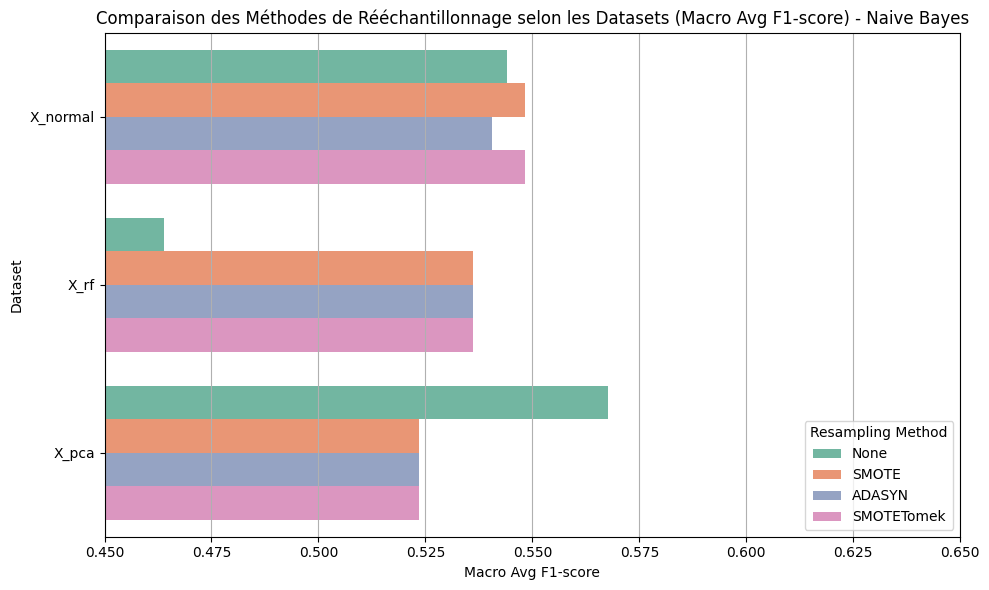

In [ ]:
dataset_order = ["X_normal", "X_rf", "X_pca"]
resampling_order = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# 4. Naive Bayes
print("\n=== Visualisation pour le modèle : Naive Bayes ===\n")
plot_barplot(nb_comparison_df, "Naive Bayes", dataset_order=dataset_order, resampling_order=resampling_order)




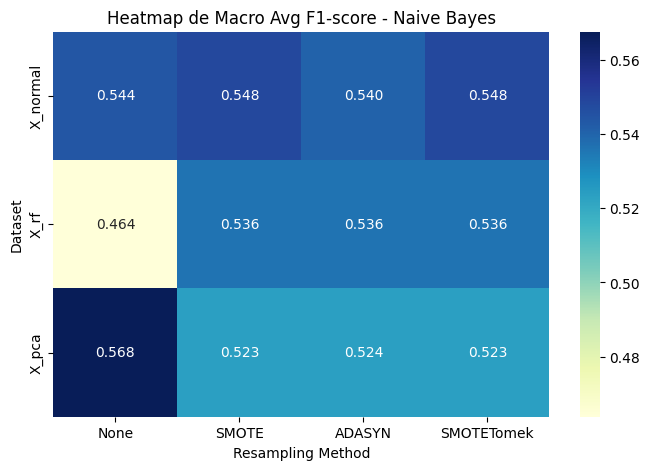

In [ ]:
plot_heatmap(nb_comparison_df, "Naive Bayes", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(nb_comparison_df, "Naive Bayes")

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
8  Naive Bayes     X_pca              None     0.880             1.000000   
1  Naive Bayes  X_normal             SMOTE     0.690             0.213115   
3  Naive Bayes  X_normal        SMOTETomek     0.690             0.213115   
0  Naive Bayes  X_normal              None     0.825             0.250000   
2  Naive Bayes  X_normal            ADASYN     0.660             0.211268   

   Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
8          0.111111            0.200000             0.878173   
1          0.481481            0.295455             0.899281   
3          0.481481            0.295455             0.899281   
0          0.148148            0.186047             0.875000   
2          0.555556            0.306122             0.906977   

   Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
8          1.000000            0.935135             0.939086   
1          0.722543            0.801282             0.556198   
3          0.722543            0.801282             0.556198   
0          0.930636            0.901961             0.562500   
2          0.676301            0.774834             0.559122   

   Macro Avg Recall  Macro Avg F1-score  
8          0.555556            0.567568  
1          0.602012            0.548368  
3          0.602012            0.548368  
0          0.539392            0.544004  
2          0.615928            0.540478

###Decision Tree

#### DT normal


--- Decision Tree (CART) - Normal ---
Classification report:
               precision    recall  f1-score   support

           0     0.2075    0.4074    0.2750        27
           1     0.8912    0.7572    0.8187       173

    accuracy                         0.7100       200
   macro avg     0.5494    0.5823    0.5469       200
weighted avg     0.7989    0.7100    0.7453       200



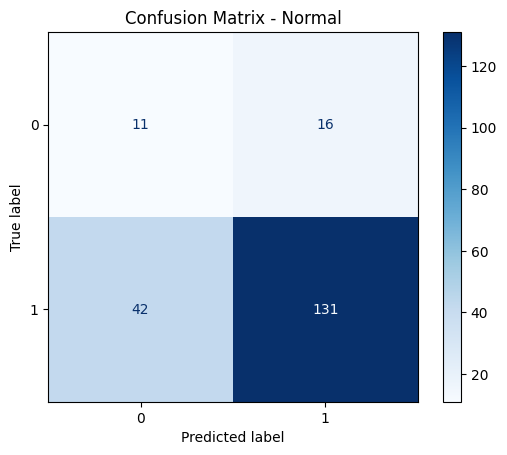


--- Decision Tree (CART) - RF ---
Classification report:
               precision    recall  f1-score   support

           0     0.1842    0.5185    0.2718        27
           1     0.8952    0.6416    0.7475       173

    accuracy                         0.6250       200
   macro avg     0.5397    0.5801    0.5097       200
weighted avg     0.7992    0.6250    0.6833       200



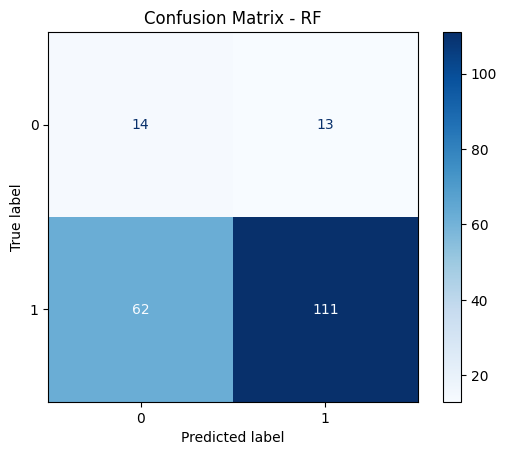


--- Decision Tree (CART) - PCA ---
Classification report:
               precision    recall  f1-score   support

           0     0.2157    0.4074    0.2821        27
           1     0.8926    0.7688    0.8261       173

    accuracy                         0.7200       200
   macro avg     0.5542    0.5881    0.5541       200
weighted avg     0.8012    0.7200    0.7526       200



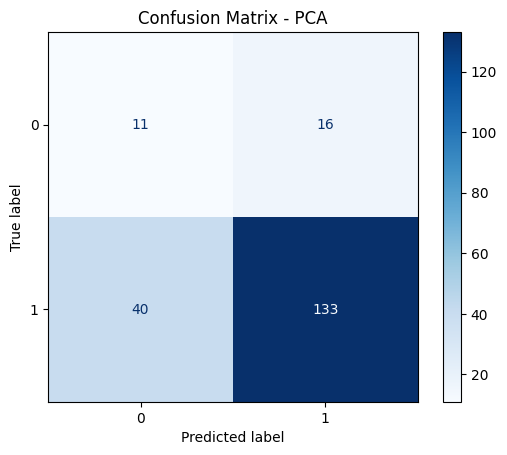

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def run_decision_tree(X_train, y_train, X_test, y_test, dataset_name):
    print(f"\n--- Decision Tree (CART) - {dataset_name} ---")

    # Création du modèle avec pondération des classes
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.grid(False)
    plt.show()

# Exemple d’appel sur tes datasets déjà split et standardisés

run_decision_tree(Xn_train, yn_train, Xn_test, yn_test, "Normal")
run_decision_tree(Xrf_train, yrf_train, Xrf_test, yrf_test, "RF")
run_decision_tree(Xpca_train, ypca_train, Xpca_test, ypca_test, "PCA")


#### DT avec SMOTE_ADASYN_SMOTETOMEK

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek



def train_DT(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n--- Entraînement Decision Tree avec {method_name} - {dataset_name} ---")


    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Add 'None' case for no resampling
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Resample the training data (if sampler is not None)
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train # Use original data if no resampling


    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

    # Train the model
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate and collect metrics
    print(f"\n--- Évaluation Decision Tree avec {method_name} sur {dataset_name} ---")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Print classification report for review
    print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

    # Create a dictionary of metrics
    metrics = {
        'Model': 'Decision Tree', # Model name
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics # Return the metrics dictionary


--- Entraînement Decision Tree avec None - X_normal ---

--- Évaluation Decision Tree avec None sur X_normal ---
Classification report:
               precision    recall  f1-score   support

           0     0.2075    0.4074    0.2750        27
           1     0.8912    0.7572    0.8187       173

    accuracy                         0.7100       200
   macro avg     0.5494    0.5823    0.5469       200
weighted avg     0.7989    0.7100    0.7453       200



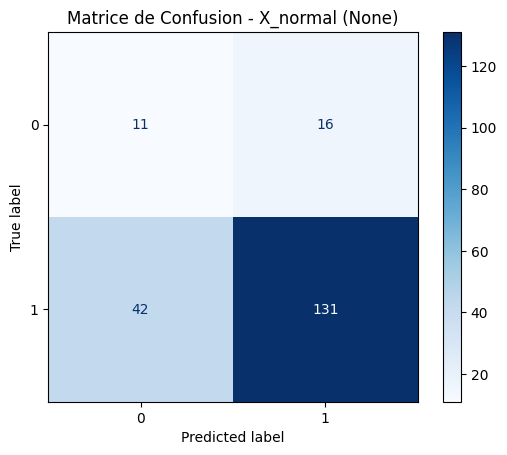


--- Entraînement Decision Tree avec SMOTE - X_normal ---

--- Évaluation Decision Tree avec SMOTE sur X_normal ---
Classification report:
               precision    recall  f1-score   support

           0     0.2500    0.1852    0.2128        27
           1     0.8778    0.9133    0.8952       173

    accuracy                         0.8150       200
   macro avg     0.5639    0.5492    0.5540       200
weighted avg     0.7930    0.8150    0.8031       200



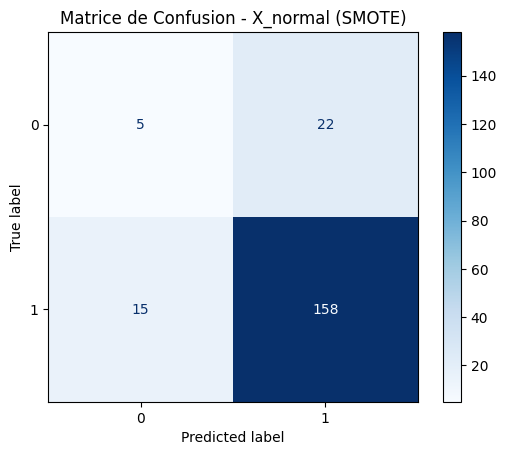


--- Entraînement Decision Tree avec ADASYN - X_normal ---

--- Évaluation Decision Tree avec ADASYN sur X_normal ---
Classification report:
               precision    recall  f1-score   support

           0     0.2632    0.1852    0.2174        27
           1     0.8785    0.9191    0.8983       173

    accuracy                         0.8200       200
   macro avg     0.5708    0.5521    0.5578       200
weighted avg     0.7954    0.8200    0.8064       200



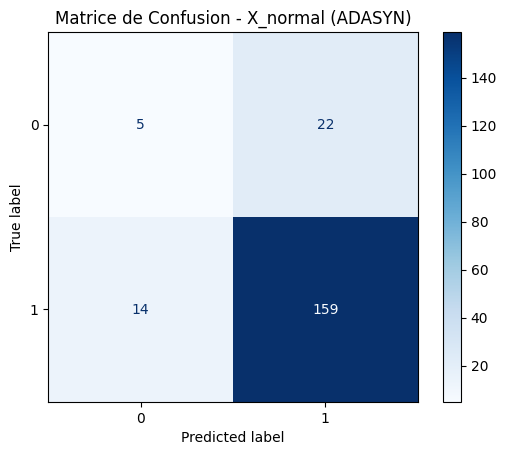


--- Entraînement Decision Tree avec SMOTETomek - X_normal ---

--- Évaluation Decision Tree avec SMOTETomek sur X_normal ---
Classification report:
               precision    recall  f1-score   support

           0     0.2500    0.1852    0.2128        27
           1     0.8778    0.9133    0.8952       173

    accuracy                         0.8150       200
   macro avg     0.5639    0.5492    0.5540       200
weighted avg     0.7930    0.8150    0.8031       200



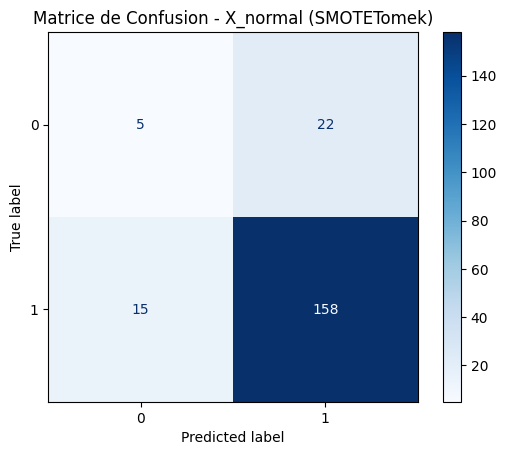


--- Entraînement Decision Tree avec None - X_rf ---

--- Évaluation Decision Tree avec None sur X_rf ---
Classification report:
               precision    recall  f1-score   support

           0     0.1842    0.5185    0.2718        27
           1     0.8952    0.6416    0.7475       173

    accuracy                         0.6250       200
   macro avg     0.5397    0.5801    0.5097       200
weighted avg     0.7992    0.6250    0.6833       200



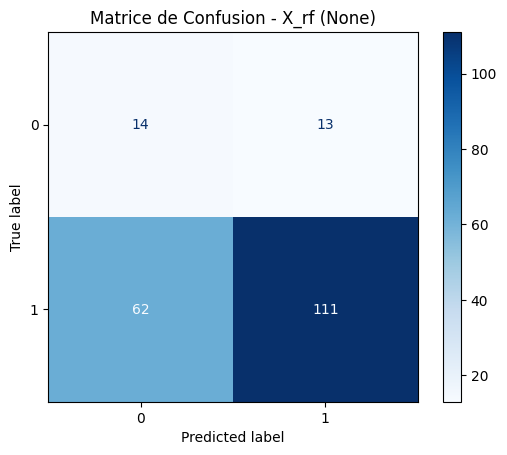


--- Entraînement Decision Tree avec SMOTE - X_rf ---

--- Évaluation Decision Tree avec SMOTE sur X_rf ---
Classification report:
               precision    recall  f1-score   support

           0     0.2667    0.4444    0.3333        27
           1     0.9032    0.8092    0.8537       173

    accuracy                         0.7600       200
   macro avg     0.5849    0.6268    0.5935       200
weighted avg     0.8173    0.7600    0.7834       200



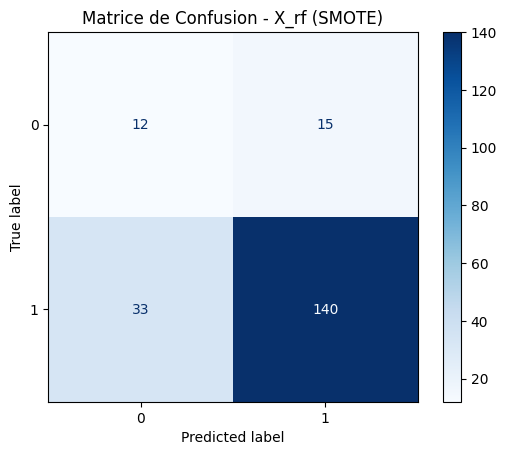


--- Entraînement Decision Tree avec ADASYN - X_rf ---

--- Évaluation Decision Tree avec ADASYN sur X_rf ---
Classification report:
               precision    recall  f1-score   support

           0     0.2353    0.4444    0.3077        27
           1     0.8993    0.7746    0.8323       173

    accuracy                         0.7300       200
   macro avg     0.5673    0.6095    0.5700       200
weighted avg     0.8097    0.7300    0.7615       200



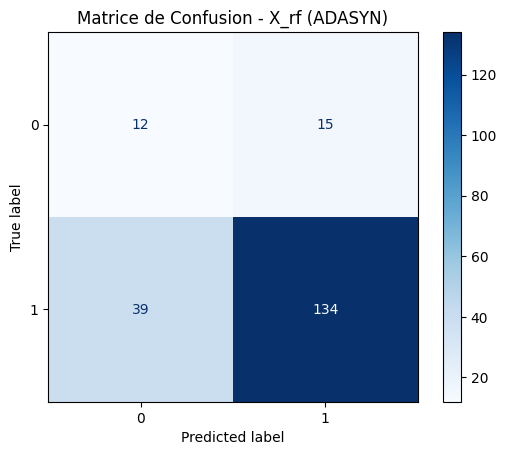


--- Entraînement Decision Tree avec SMOTETomek - X_rf ---

--- Évaluation Decision Tree avec SMOTETomek sur X_rf ---
Classification report:
               precision    recall  f1-score   support

           0     0.2667    0.4444    0.3333        27
           1     0.9032    0.8092    0.8537       173

    accuracy                         0.7600       200
   macro avg     0.5849    0.6268    0.5935       200
weighted avg     0.8173    0.7600    0.7834       200



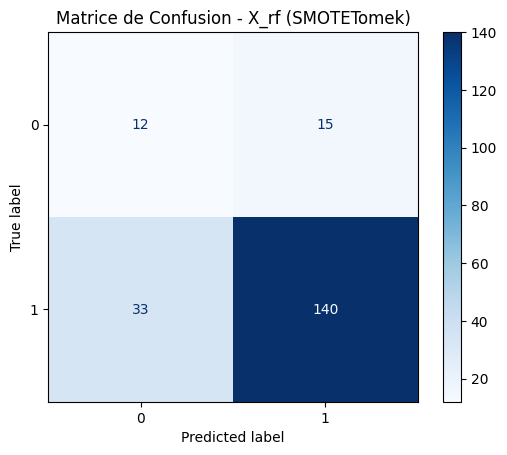


--- Entraînement Decision Tree avec None - X_pca ---

--- Évaluation Decision Tree avec None sur X_pca ---
Classification report:
               precision    recall  f1-score   support

           0     0.2157    0.4074    0.2821        27
           1     0.8926    0.7688    0.8261       173

    accuracy                         0.7200       200
   macro avg     0.5542    0.5881    0.5541       200
weighted avg     0.8012    0.7200    0.7526       200



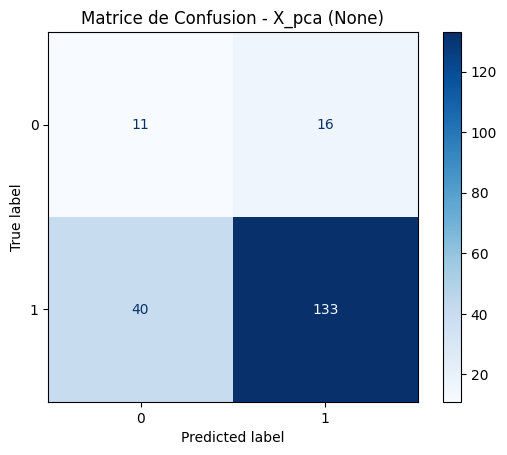


--- Entraînement Decision Tree avec SMOTE - X_pca ---

--- Évaluation Decision Tree avec SMOTE sur X_pca ---
Classification report:
               precision    recall  f1-score   support

           0     0.2273    0.1852    0.2041        27
           1     0.8764    0.9017    0.8889       173

    accuracy                         0.8050       200
   macro avg     0.5518    0.5435    0.5465       200
weighted avg     0.7888    0.8050    0.7964       200



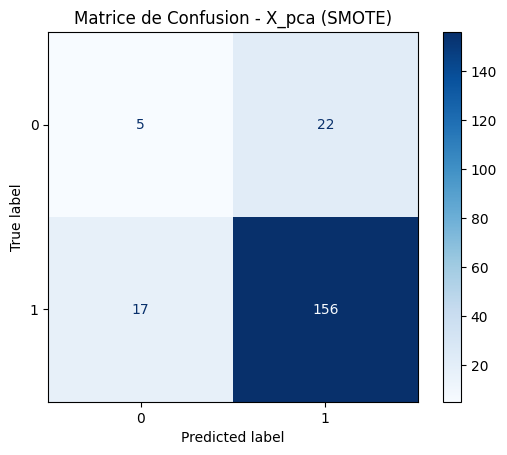


--- Entraînement Decision Tree avec ADASYN - X_pca ---

--- Évaluation Decision Tree avec ADASYN sur X_pca ---
Classification report:
               precision    recall  f1-score   support

           0     0.1538    0.0741    0.1000        27
           1     0.8663    0.9364    0.9000       173

    accuracy                         0.8200       200
   macro avg     0.5101    0.5052    0.5000       200
weighted avg     0.7701    0.8200    0.7920       200



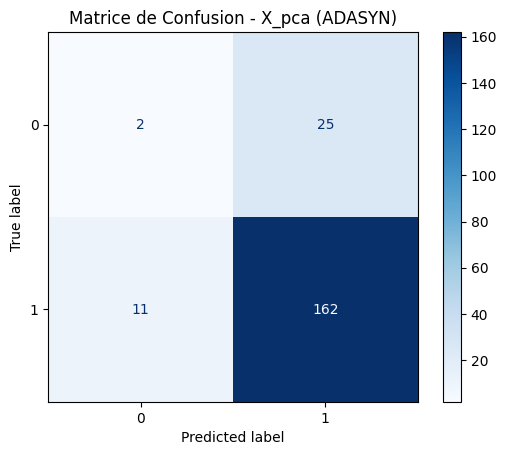


--- Entraînement Decision Tree avec SMOTETomek - X_pca ---

--- Évaluation Decision Tree avec SMOTETomek sur X_pca ---
Classification report:
               precision    recall  f1-score   support

           0     0.2273    0.1852    0.2041        27
           1     0.8764    0.9017    0.8889       173

    accuracy                         0.8050       200
   macro avg     0.5518    0.5435    0.5465       200
weighted avg     0.7888    0.8050    0.7964       200



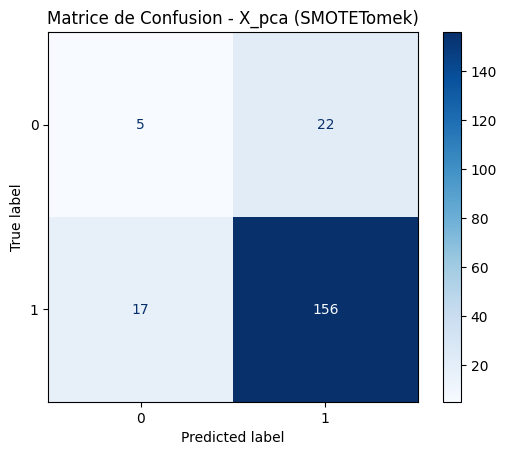

In [ ]:


# List to store Decision Tree metrics
all_dt_metrics = []



# List of resampling methods, including 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Loop through datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Loop through resampling methods
    for method_name in resampling_methods:
        # Call the modified function to train, evaluate, and collect DT metrics
        metrics = train_DT(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_dt_metrics.append(metrics)



# To view only the Decision Tree results:
dt_comparison_df = pd.DataFrame(all_dt_metrics)

##### dt_comparison_df

In [ ]:
print("\nTableau de comparaison des métriques pour Decision Tree (avec et sans rééchantillonnage) :")
dt_comparison_df


Tableau de comparaison des métriques pour Decision Tree (avec et sans rééchantillonnage) :


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0   Decision Tree  X_normal              None     0.710             0.207547   
1   Decision Tree  X_normal             SMOTE     0.815             0.250000   
2   Decision Tree  X_normal            ADASYN     0.820             0.263158   
3   Decision Tree  X_normal        SMOTETomek     0.815             0.250000   
4   Decision Tree      X_rf              None     0.625             0.184211   
5   Decision Tree      X_rf             SMOTE     0.760             0.266667   
6   Decision Tree      X_rf            ADASYN     0.730             0.235294   
7   Decision Tree      X_rf        SMOTETomek     0.760             0.266667   
8   Decision Tree     X_pca              None     0.720             0.215686   
9   Decision Tree     X_pca             SMOTE     0.805             0.227273   
10  Decision Tree     X_pca            ADASYN     0.820             0.153846   
11  Decision Tree     X_pca        SMOTETomek     0.805             0.227273   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.407407            0.275000             0.891156   
1           0.185185            0.212766             0.877778   
2           0.185185            0.217391             0.878453   
3           0.185185            0.212766             0.877778   
4           0.518519            0.271845             0.895161   
5           0.444444            0.333333             0.903226   
6           0.444444            0.307692             0.899329   
7           0.444444            0.333333             0.903226   
8           0.407407            0.282051             0.892617   
9           0.185185            0.204082             0.876404   
10          0.074074            0.100000             0.866310   
11          0.185185            0.204082             0.876404   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.757225            0.818750             0.549352   
1           0.913295            0.895184             0.563889   
2           0.919075            0.898305             0.570805   
3           0.913295            0.895184             0.563889   
4           0.641618            0.747475             0.539686   
5           0.809249            0.853659             0.584946   
6           0.774566            0.832298             0.567311   
7           0.809249            0.853659             0.584946   
8           0.768786            0.826087             0.554152   
9           0.901734            0.888889             0.551839   
10          0.936416            0.900000             0.510078   
11          0.901734            0.888889             0.551839   

    Macro Avg Recall  Macro Avg F1-score  
0           0.582316            0.546875  
1           0.549240            0.553975  
2           0.552130            0.557848  
3           0.549240            0.553975  
4           0.580069            0.509660  
5           0.626846            0.593496  
6           0.609505            0.569995  
7           0.626846            0.593496  
8           0.588097            0.554069  
9           0.543460            0.546485  
10          0.505245            0.500000  
11          0.543460            0.546485

##### Visualisation DT


=== Visualisation pour le modèle : Decision Tree ===



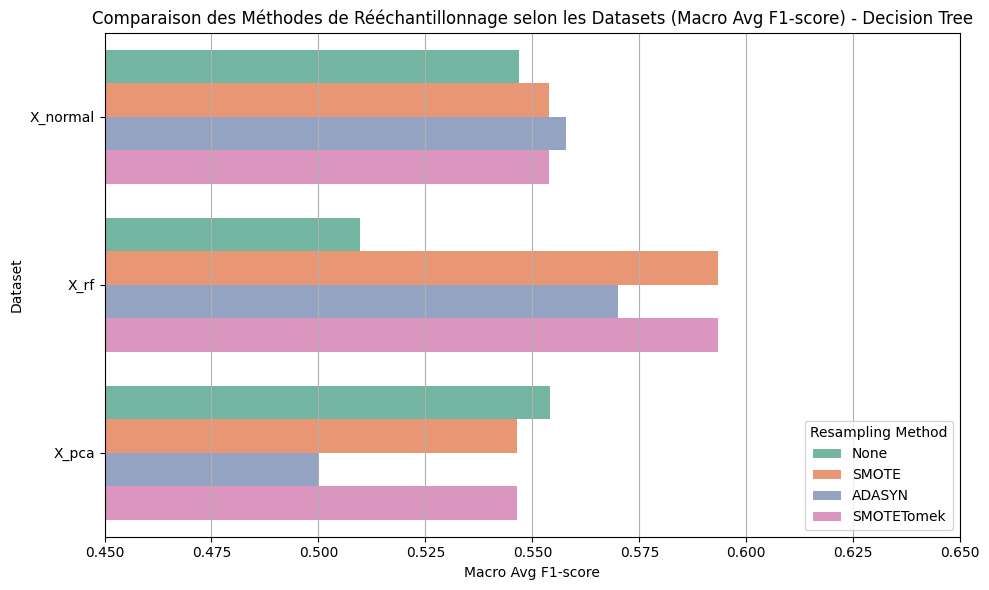

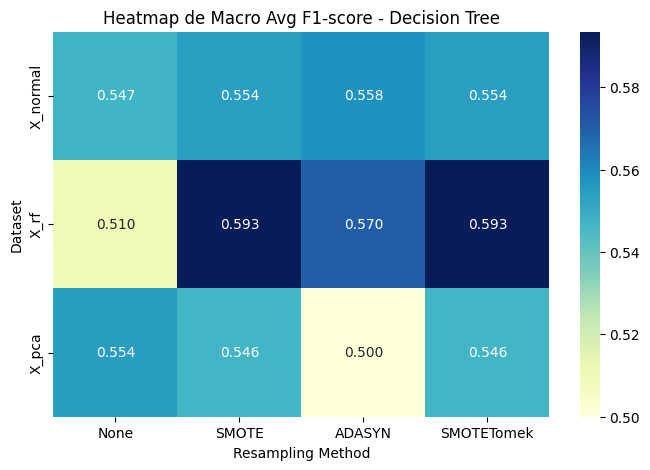

In [ ]:
print("\n=== Visualisation pour le modèle : Decision Tree ===\n")
plot_barplot(dt_comparison_df, "Decision Tree", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(dt_comparison_df, "Decision Tree", resampling_order=resampling_order, dataset_order=dataset_order)

In [ ]:
print_top5(dt_comparison_df, "Decision Tree")


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
7  Decision Tree      X_rf        SMOTETomek      0.76             0.266667   
5  Decision Tree      X_rf             SMOTE      0.76             0.266667   
6  Decision Tree      X_rf            ADASYN      0.73             0.235294   
2  Decision Tree  X_normal            ADASYN      0.82             0.263158   
8  Decision Tree     X_pca              None      0.72             0.215686   

   Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
7          0.444444            0.333333             0.903226   
5          0.444444            0.333333             0.903226   
6          0.444444            0.307692             0.899329   
2          0.185185            0.217391             0.878453   
8          0.407407            0.282051             0.892617   

   Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
7          0.809249            0.853659             0.584946   
5          0.809249            0.853659             0.584946   
6          0.774566            0.832298             0.567311   
2          0.919075            0.898305             0.570805   
8          0.768786            0.826087             0.554152   

   Macro Avg Recall  Macro Avg F1-score  
7          0.626846            0.593496  
5          0.626846            0.593496  
6          0.609505            0.569995  
2          0.552130            0.557848  
8          0.588097            0.554069

###KNN

##### meilleur K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def find_best_k(X_train, y_train, max_k=30):
    scores = []
    k_range = range(1, max_k + 1)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro').mean()
        scores.append(cv_score)
    best_k = k_range[np.argmax(scores)]
    print(f"Meilleur k trouvé : {best_k} avec score CV = {max(scores):.4f}")
    return best_k


#### KNN normal(no class_Weight)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def run_knn(X_train, y_train, X_test, y_test, dataset_name):
    print(f"\n--- KNN - {dataset_name} ---")

    # Trouver le meilleur k
    best_k = find_best_k(X_train, y_train)

    # Entraîner avec meilleur k
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de Confusion - {dataset_name} (k={best_k})")
    plt.grid(False)
    plt.show()



--- KNN - Normal ---
Meilleur k trouvé : 4 avec score CV = 0.5723
              precision    recall  f1-score   support

           0     0.3000    0.1111    0.1622        27
           1     0.8737    0.9595    0.9146       173

    accuracy                         0.8450       200
   macro avg     0.5868    0.5353    0.5384       200
weighted avg     0.7962    0.8450    0.8130       200



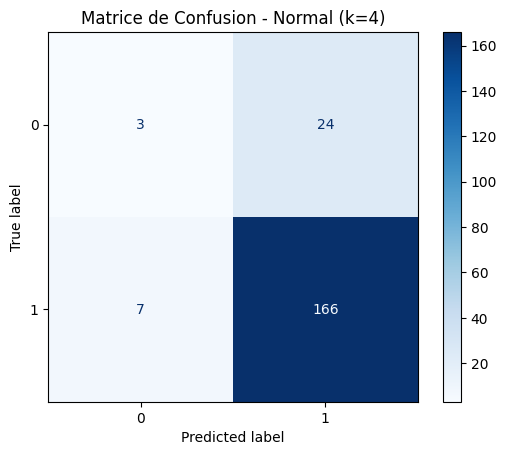


--- KNN - RF ---
Meilleur k trouvé : 1 avec score CV = 0.5826
              precision    recall  f1-score   support

           0     0.2500    0.0370    0.0645        27
           1     0.8673    0.9827    0.9214       173

    accuracy                         0.8550       200
   macro avg     0.5587    0.5098    0.4930       200
weighted avg     0.7840    0.8550    0.8057       200



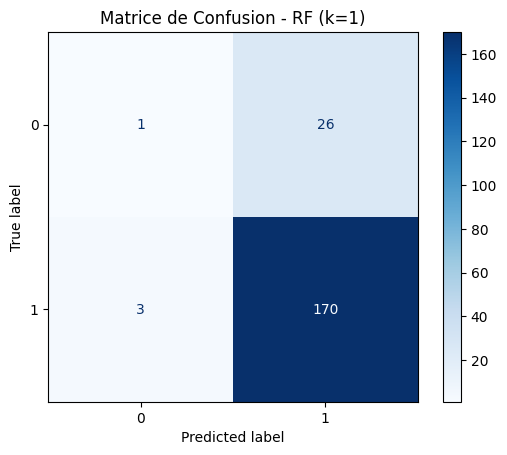


--- KNN - PCA ---
Meilleur k trouvé : 4 avec score CV = 0.5371
              precision    recall  f1-score   support

           0     0.1000    0.0370    0.0541        27
           1     0.8632    0.9480    0.9036       173

    accuracy                         0.8250       200
   macro avg     0.4816    0.4925    0.4788       200
weighted avg     0.7601    0.8250    0.7889       200



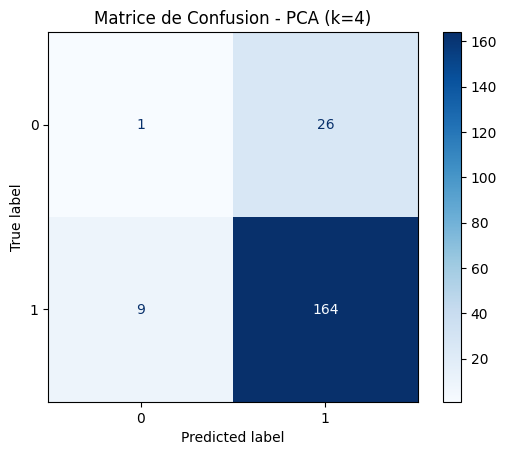

In [ ]:
datasets = {
    "Normal": (Xn_train, Xn_test, yn_train, yn_test),
    "RF": (Xrf_train, Xrf_test, yrf_train, yrf_test),
    "PCA": (Xpca_train, Xpca_test, ypca_train, ypca_test)
}

# KNN simple (sans rééquilibrage)
for name, (Xtr, Xte, ytr, yte) in datasets.items():
    run_knn(Xtr, ytr, Xte, yte, name)

#### KNN avec SMOTE_ADASYN_SMOTETOMEK

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

# Function to train KNN with resampling and collect metrics
def train_KNN(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n--- Entraînement KNN avec {method_name} - {dataset_name} ---")

    # Choose the resampling method
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Add 'None' case
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Resample the training data (if sampler is not None)
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train # Use original data

    # Find the best k on the resampled training data
    # Make sure find_best_k is accessible in this scope
    best_k = find_best_k(X_resampled, y_resampled)

    # Train the KNN model with the best k
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_resampled, y_resampled)

    # Predict on the original test set
    y_pred = model.predict(X_test)

    # Evaluate and collect metrics
    print(f"\n--- Évaluation KNN avec {method_name} sur {dataset_name} ---")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Print classification report for review
    print(classification_report(y_test, y_pred, digits=4))

    # Create a dictionary of metrics
    metrics = {
        'Model': 'KNN', # Model name
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name}, k={best_k})")
    plt.grid(False)
    plt.show()

    return metrics # Return the metrics dictionary


--- Entraînement KNN avec None - X_normal ---
Meilleur k trouvé : 4 avec score CV = 0.5723

--- Évaluation KNN avec None sur X_normal ---
              precision    recall  f1-score   support

           0     0.3000    0.1111    0.1622        27
           1     0.8737    0.9595    0.9146       173

    accuracy                         0.8450       200
   macro avg     0.5868    0.5353    0.5384       200
weighted avg     0.7962    0.8450    0.8130       200



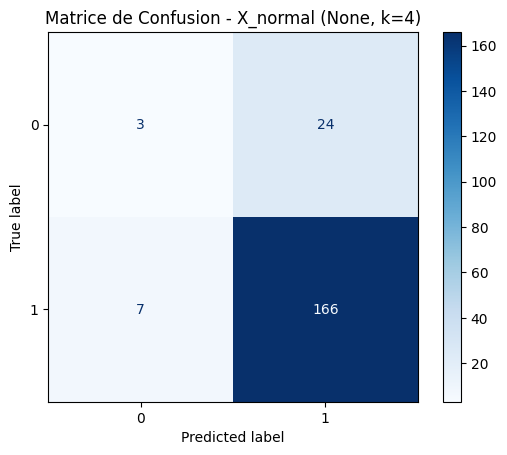


--- Entraînement KNN avec SMOTE - X_normal ---
Meilleur k trouvé : 1 avec score CV = 0.8172

--- Évaluation KNN avec SMOTE sur X_normal ---
              precision    recall  f1-score   support

           0     0.2667    0.1481    0.1905        27
           1     0.8757    0.9364    0.9050       173

    accuracy                         0.8300       200
   macro avg     0.5712    0.5423    0.5478       200
weighted avg     0.7935    0.8300    0.8086       200



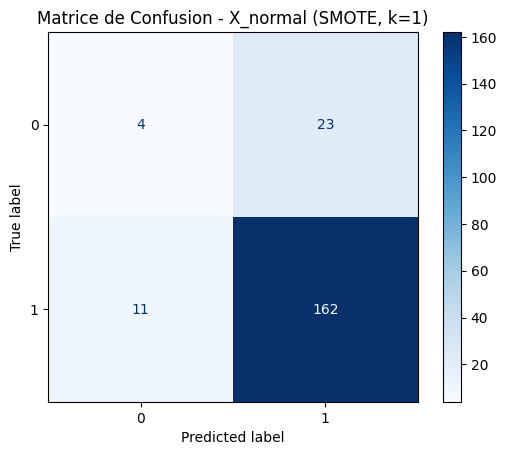


--- Entraînement KNN avec ADASYN - X_normal ---
Meilleur k trouvé : 2 avec score CV = 0.7858

--- Évaluation KNN avec ADASYN sur X_normal ---
              precision    recall  f1-score   support

           0     0.2424    0.2963    0.2667        27
           1     0.8862    0.8555    0.8706       173

    accuracy                         0.7800       200
   macro avg     0.5643    0.5759    0.5686       200
weighted avg     0.7993    0.7800    0.7891       200



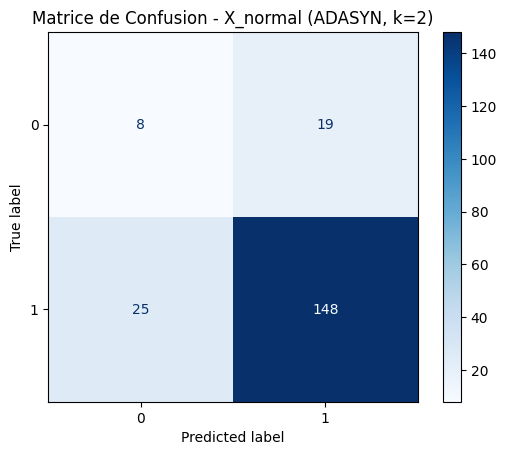


--- Entraînement KNN avec SMOTETomek - X_normal ---
Meilleur k trouvé : 1 avec score CV = 0.8115

--- Évaluation KNN avec SMOTETomek sur X_normal ---
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



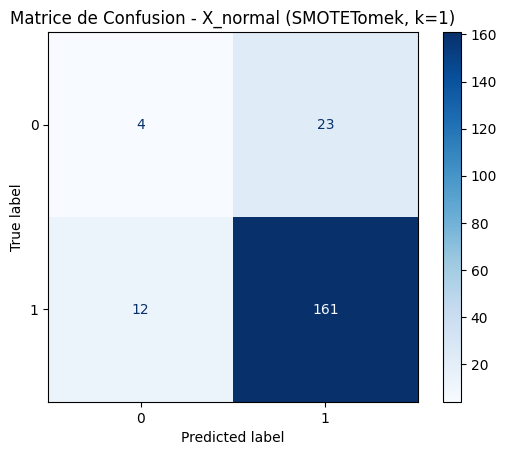


--- Entraînement KNN avec None - X_rf ---
Meilleur k trouvé : 1 avec score CV = 0.5826

--- Évaluation KNN avec None sur X_rf ---
              precision    recall  f1-score   support

           0     0.2500    0.0370    0.0645        27
           1     0.8673    0.9827    0.9214       173

    accuracy                         0.8550       200
   macro avg     0.5587    0.5098    0.4930       200
weighted avg     0.7840    0.8550    0.8057       200



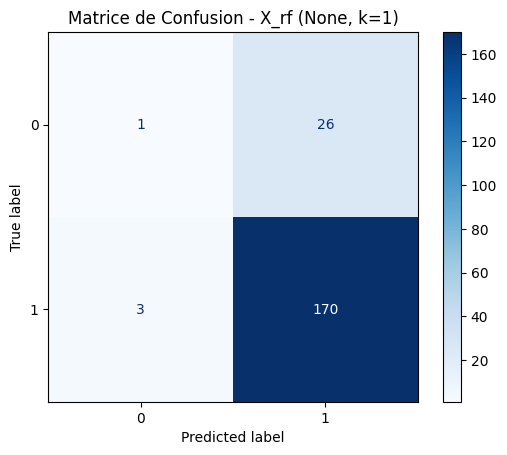


--- Entraînement KNN avec SMOTE - X_rf ---
Meilleur k trouvé : 2 avec score CV = 0.7120

--- Évaluation KNN avec SMOTE sur X_rf ---
              precision    recall  f1-score   support

           0     0.1964    0.4074    0.2651        27
           1     0.8889    0.7399    0.8076       173

    accuracy                         0.6950       200
   macro avg     0.5427    0.5736    0.5363       200
weighted avg     0.7954    0.6950    0.7343       200



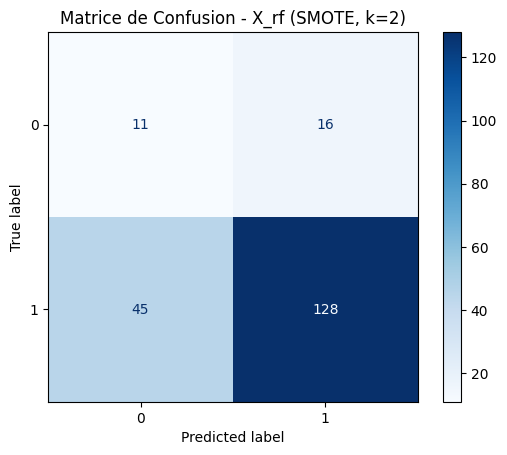


--- Entraînement KNN avec ADASYN - X_rf ---
Meilleur k trouvé : 2 avec score CV = 0.6289

--- Évaluation KNN avec ADASYN sur X_rf ---
              precision    recall  f1-score   support

           0     0.2097    0.4815    0.2921        27
           1     0.8986    0.7168    0.7974       173

    accuracy                         0.6850       200
   macro avg     0.5541    0.5991    0.5448       200
weighted avg     0.8056    0.6850    0.7292       200



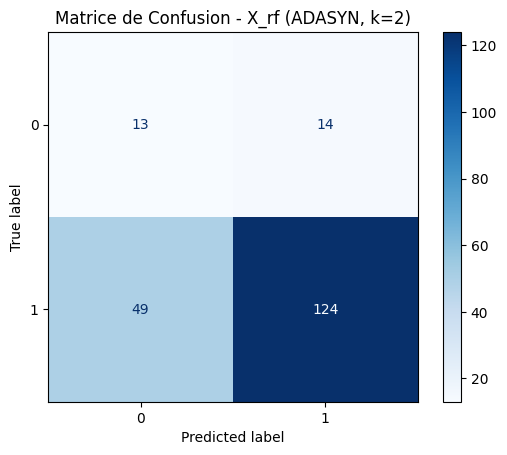


--- Entraînement KNN avec SMOTETomek - X_rf ---
Meilleur k trouvé : 2 avec score CV = 0.7120

--- Évaluation KNN avec SMOTETomek sur X_rf ---
              precision    recall  f1-score   support

           0     0.1964    0.4074    0.2651        27
           1     0.8889    0.7399    0.8076       173

    accuracy                         0.6950       200
   macro avg     0.5427    0.5736    0.5363       200
weighted avg     0.7954    0.6950    0.7343       200



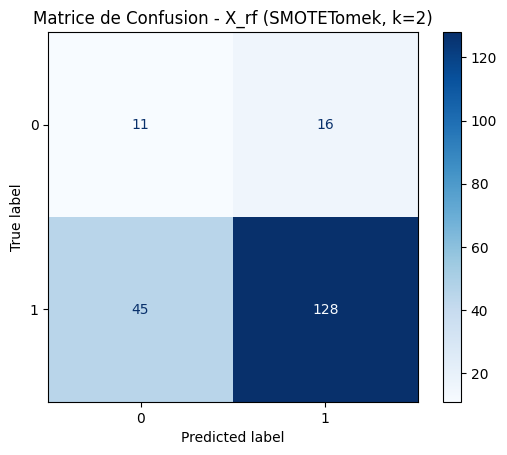


--- Entraînement KNN avec None - X_pca ---
Meilleur k trouvé : 4 avec score CV = 0.5371

--- Évaluation KNN avec None sur X_pca ---
              precision    recall  f1-score   support

           0     0.1000    0.0370    0.0541        27
           1     0.8632    0.9480    0.9036       173

    accuracy                         0.8250       200
   macro avg     0.4816    0.4925    0.4788       200
weighted avg     0.7601    0.8250    0.7889       200



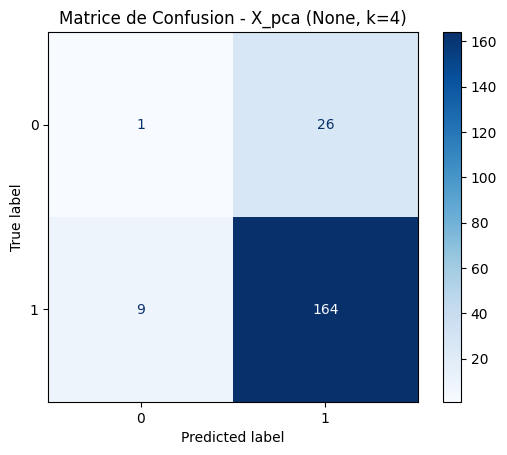


--- Entraînement KNN avec SMOTE - X_pca ---
Meilleur k trouvé : 1 avec score CV = 0.8427

--- Évaluation KNN avec SMOTE sur X_pca ---
              precision    recall  f1-score   support

           0     0.2727    0.2222    0.2449        27
           1     0.8820    0.9075    0.8946       173

    accuracy                         0.8150       200
   macro avg     0.5774    0.5649    0.5697       200
weighted avg     0.7998    0.8150    0.8069       200



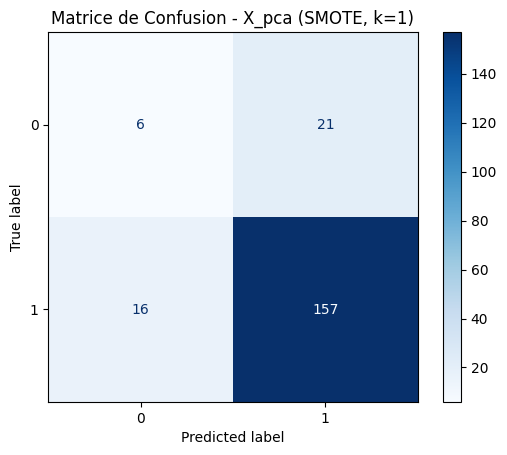


--- Entraînement KNN avec ADASYN - X_pca ---
Meilleur k trouvé : 1 avec score CV = 0.8006

--- Évaluation KNN avec ADASYN sur X_pca ---
              precision    recall  f1-score   support

           0     0.2500    0.1481    0.1860        27
           1     0.8750    0.9306    0.9020       173

    accuracy                         0.8250       200
   macro avg     0.5625    0.5394    0.5440       200
weighted avg     0.7906    0.8250    0.8053       200



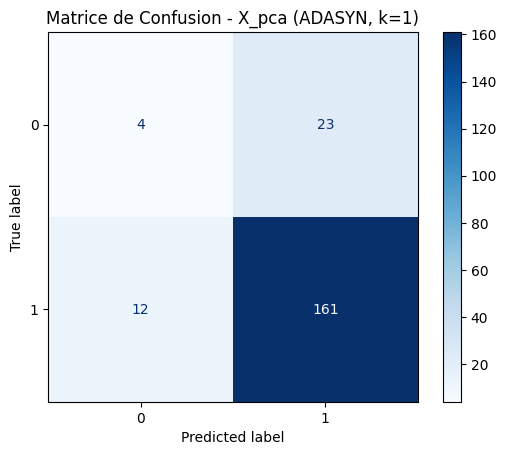


--- Entraînement KNN avec SMOTETomek - X_pca ---
Meilleur k trouvé : 2 avec score CV = 0.8262

--- Évaluation KNN avec SMOTETomek sur X_pca ---
              precision    recall  f1-score   support

           0     0.1875    0.2222    0.2034        27
           1     0.8750    0.8497    0.8622       173

    accuracy                         0.7650       200
   macro avg     0.5312    0.5360    0.5328       200
weighted avg     0.7822    0.7650    0.7732       200



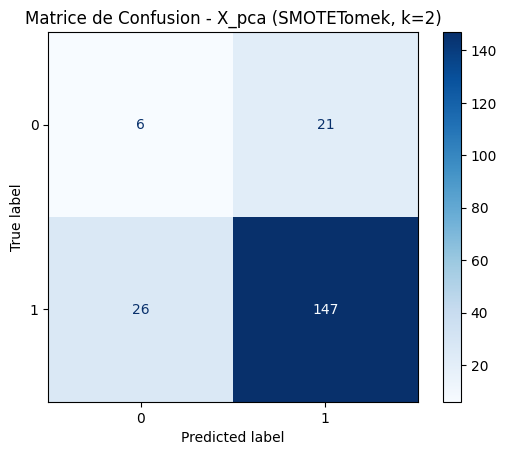

In [ ]:
# List to store KNN metrics
all_knn_metrics = []

# List of datasets and their corresponding splits (reuse the same structure)
datasets = {
    "X_normal": (Xn_train, yn_train, Xn_test, yn_test),
    "X_rf": (Xrf_train, yrf_train, Xrf_test, yrf_test),
    "X_pca": (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# List of resampling methods, including 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Loop through datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Loop through resampling methods
    for method_name in resampling_methods:
        # Call the modified function to train, evaluate, and collect KNN metrics
        metrics = train_KNN(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_knn_metrics.append(metrics)

# You can now add this 'all_knn_metrics' list to your global list
# all_overall_metrics (which you should have initialized at the start)
# for example: all_overall_metrics.extend(all_knn_metrics)

# To view only the KNN results:
knn_comparison_df = pd.DataFrame(all_knn_metrics)



##### knn_comparison_df

In [ ]:
print("\nTableau de comparaison des métriques pour KNN (avec et sans rééchantillonnage) :")
knn_comparison_df


Tableau de comparaison des métriques pour KNN (avec et sans rééchantillonnage) :


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0    KNN  X_normal              None     0.845             0.300000   
1    KNN  X_normal             SMOTE     0.830             0.266667   
2    KNN  X_normal            ADASYN     0.780             0.242424   
3    KNN  X_normal        SMOTETomek     0.825             0.250000   
4    KNN      X_rf              None     0.855             0.250000   
5    KNN      X_rf             SMOTE     0.695             0.196429   
6    KNN      X_rf            ADASYN     0.685             0.209677   
7    KNN      X_rf        SMOTETomek     0.695             0.196429   
8    KNN     X_pca              None     0.825             0.100000   
9    KNN     X_pca             SMOTE     0.815             0.272727   
10   KNN     X_pca            ADASYN     0.825             0.250000   
11   KNN     X_pca        SMOTETomek     0.765             0.187500   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.111111            0.162162             0.873684   
1           0.148148            0.190476             0.875676   
2           0.296296            0.266667             0.886228   
3           0.148148            0.186047             0.875000   
4           0.037037            0.064516             0.867347   
5           0.407407            0.265060             0.888889   
6           0.481481            0.292135             0.898551   
7           0.407407            0.265060             0.888889   
8           0.037037            0.054054             0.863158   
9           0.222222            0.244898             0.882022   
10          0.148148            0.186047             0.875000   
11          0.222222            0.203390             0.875000   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.959538            0.914601             0.586842   
1           0.936416            0.905028             0.571171   
2           0.855491            0.870588             0.564326   
3           0.930636            0.901961             0.562500   
4           0.982659            0.921409             0.558673   
5           0.739884            0.807571             0.542659   
6           0.716763            0.797428             0.554114   
7           0.739884            0.807571             0.542659   
8           0.947977            0.903581             0.481579   
9           0.907514            0.894587             0.577375   
10          0.930636            0.901961             0.562500   
11          0.849711            0.862170             0.531250   

    Macro Avg Recall  Macro Avg F1-score  
0           0.535324            0.538381  
1           0.542282            0.547752  
2           0.575894            0.568627  
3           0.539392            0.544004  
4           0.509848            0.492963  
5           0.573646            0.536316  
6           0.599122            0.544781  
7           0.573646            0.536316  
8           0.492507            0.478818  
9           0.564868            0.569742  
10          0.539392            0.544004  
11          0.535967            0.532780

##### Visualisation KNN


=== Visualisation pour le modèle : KNN ===



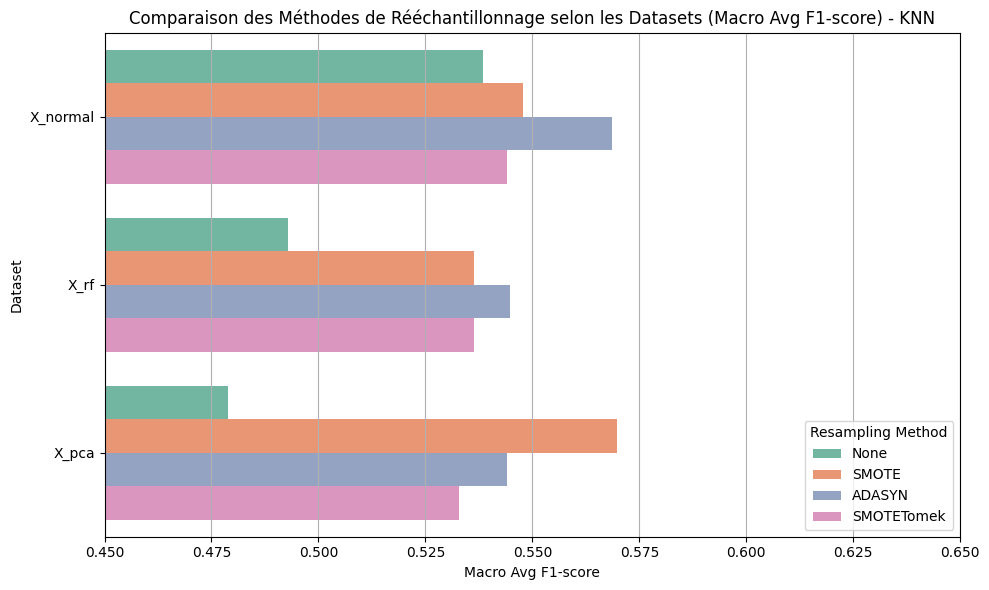

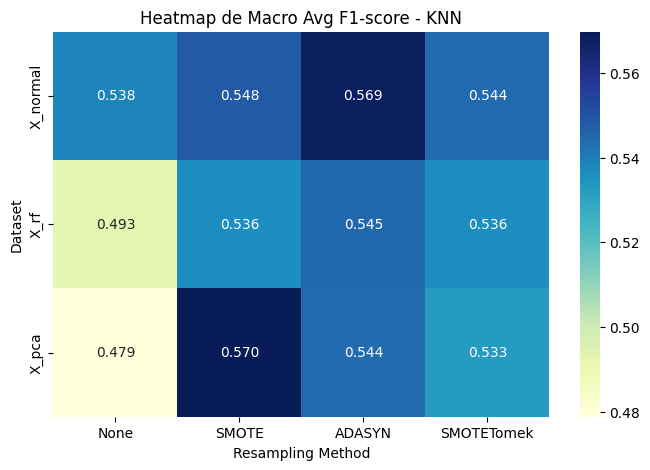

In [ ]:

print("\n=== Visualisation pour le modèle : KNN ===\n")
plot_barplot(knn_comparison_df, "KNN", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(knn_comparison_df, "KNN", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(knn_comparison_df, "KNN")

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
9    KNN     X_pca             SMOTE     0.815             0.272727   
2    KNN  X_normal            ADASYN     0.780             0.242424   
1    KNN  X_normal             SMOTE     0.830             0.266667   
6    KNN      X_rf            ADASYN     0.685             0.209677   
10   KNN     X_pca            ADASYN     0.825             0.250000   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
9           0.222222            0.244898             0.882022   
2           0.296296            0.266667             0.886228   
1           0.148148            0.190476             0.875676   
6           0.481481            0.292135             0.898551   
10          0.148148            0.186047             0.875000   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
9           0.907514            0.894587             0.577375   
2           0.855491            0.870588             0.564326   
1           0.936416            0.905028             0.571171   
6           0.716763            0.797428             0.554114   
10          0.930636            0.901961             0.562500   

    Macro Avg Recall  Macro Avg F1-score  
9           0.564868            0.569742  
2           0.575894            0.568627  
1           0.542282            0.547752  
6           0.599122            0.544781  
10          0.539392            0.544004

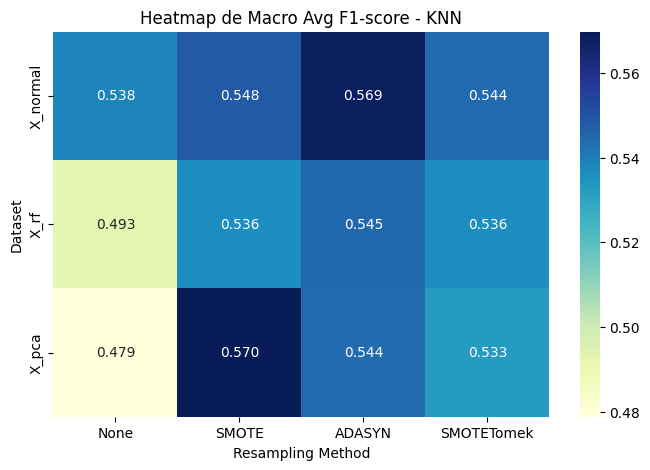

In [ ]:
# Création du pivot
pivot_f1_knn = knn_comparison_df.pivot(index='Dataset', columns='Resampling Method', values='Macro Avg F1-score')

# Réordonner les colonnes pour avoir "None" en premier
cols_order = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']  # adapte selon les méthodes que tu as réellement
pivot_f1_knn = pivot_f1_knn[cols_order]

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_f1_knn, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Heatmap de Macro Avg F1-score - KNN')
plt.show()


In [ ]:
knn_comparison_df.sort_values(by='Macro Avg F1-score', ascending=False).head(5)

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
9    KNN     X_pca             SMOTE     0.815             0.272727   
2    KNN  X_normal            ADASYN     0.780             0.242424   
1    KNN  X_normal             SMOTE     0.830             0.266667   
6    KNN      X_rf            ADASYN     0.685             0.209677   
10   KNN     X_pca            ADASYN     0.825             0.250000   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
9           0.222222            0.244898             0.882022   
2           0.296296            0.266667             0.886228   
1           0.148148            0.190476             0.875676   
6           0.481481            0.292135             0.898551   
10          0.148148            0.186047             0.875000   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
9           0.907514            0.894587             0.577375   
2           0.855491            0.870588             0.564326   
1           0.936416            0.905028             0.571171   
6           0.716763            0.797428             0.554114   
10          0.930636            0.901961             0.562500   

    Macro Avg Recall  Macro Avg F1-score  
9           0.564868            0.569742  
2           0.575894            0.568627  
1           0.542282            0.547752  
6           0.599122            0.544781  
10          0.539392            0.544004

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#### Grid Search

In [ ]:
def find_best_params_logistic_regression(X_train, y_train):
    """
    Recherche des meilleurs paramètres pour LogisticRegression via GridSearchCV.
    Applique également la standardisation.
    """
    print("Recherche des meilleurs paramètres pour Logistic Regression...")

    # Standardisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': [None, 'balanced'] # Ajouter class_weight ici
    }

    # Créer le modèle Logistic Regression
    logreg = LogisticRegression(solver='liblinear', random_state=42)

    # Configuration de la recherche par grille
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

    # Apprentissage sur les données standardisées
    grid_search.fit(X_train_scaled, y_train)

    print(f"Meilleurs paramètres trouvés: {grid_search.best_params_}")
    print(f"Meilleur score de validation: {grid_search.best_score_:.4f}")

    # Pour utiliser le meilleur modèle trouvé, il faudra l'entraîner à nouveau
    # avec les meilleurs paramètres et sur les données standardisées.
    # Ou vous pouvez retourner grid_search.best_estimator_ qui est déjà fit.
    # Nous allons retourner le best_estimator_ pour la simplicité.
    return grid_search.best_estimator_, scaler

In [ ]:
# # Assuming X_normal, y_normal, X_rf, y_rf, X_pca, y_pca are already defined and loaded

# # Apply Grid Search to each dataset
# best_logreg_normal = find_best_params_logistic_regression(X_normal, y_normal)
# best_logreg_rf = find_best_params_logistic_regression(X_rf, y_rf)
# best_logreg_pca = find_best_params_logistic_regression(X_pca, y_pca)


# # Recherche des meilleurs paramètres pour Logistic Regression...
# # Fitting 5 folds for each of 12 candidates, totalling 60 fits
# # Meilleurs paramètres trouvés: {'C': 10, 'class_weight': 'balanced'}
# # Meilleur score de validation: 0.5487
# # Recherche des meilleurs paramètres pour Logistic Regression...
# # Fitting 5 folds for each of 12 candidates, totalling 60 fits
# # Meilleurs paramètres trouvés: {'C': 1, 'class_weight': 'balanced'}
# # Meilleur score de validation: 0.5511
# # Recherche des meilleurs paramètres pour Logistic Regression...
# # Fitting 5 folds for each of 12 candidates, totalling 60 fits
# # Meilleurs paramètres trouvés: {'C': 1, 'class_weight': 'balanced'}
# # Meilleur score de validation: 0.5169

#### LR avec SMOTE_ADASYN_SMOTETOMEK


=== Logistic Regression avec SMOTE sur X_normal ===
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



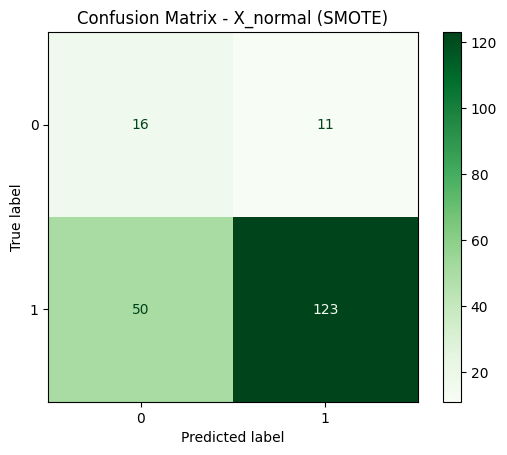


=== Logistic Regression avec ADASYN sur X_normal ===
              precision    recall  f1-score   support

           0     0.2535    0.6667    0.3673        27
           1     0.9302    0.6936    0.7947       173

    accuracy                         0.6900       200
   macro avg     0.5919    0.6802    0.5810       200
weighted avg     0.8389    0.6900    0.7370       200



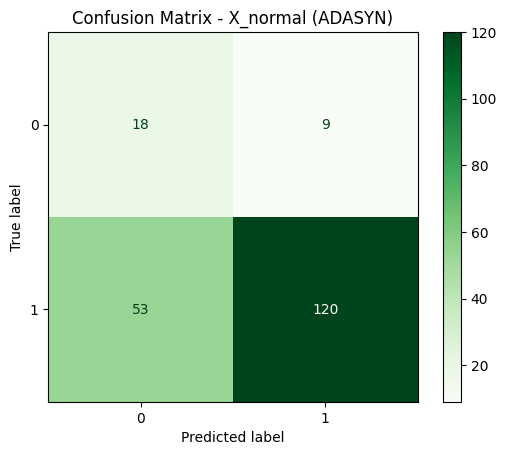


=== Logistic Regression avec SMOTETomek sur X_normal ===
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



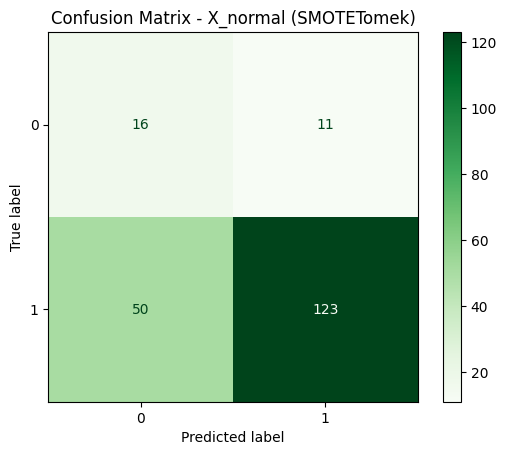


=== Logistic Regression avec SMOTE sur X_rf ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



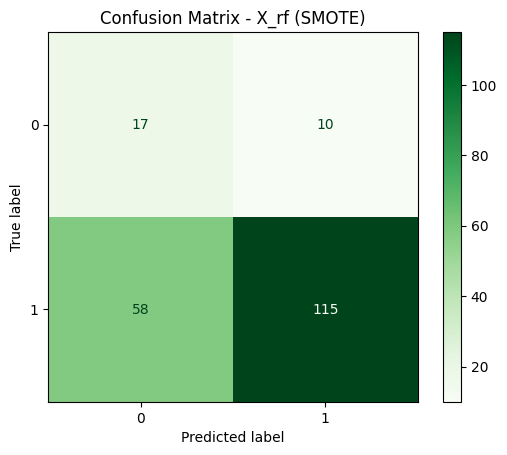


=== Logistic Regression avec ADASYN sur X_rf ===
              precision    recall  f1-score   support

           0     0.2237    0.6296    0.3301        27
           1     0.9194    0.6590    0.7677       173

    accuracy                         0.6550       200
   macro avg     0.5715    0.6443    0.5489       200
weighted avg     0.8254    0.6550    0.7086       200



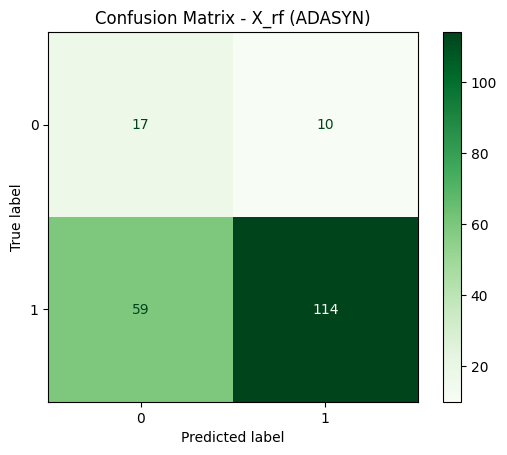


=== Logistic Regression avec SMOTETomek sur X_rf ===
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



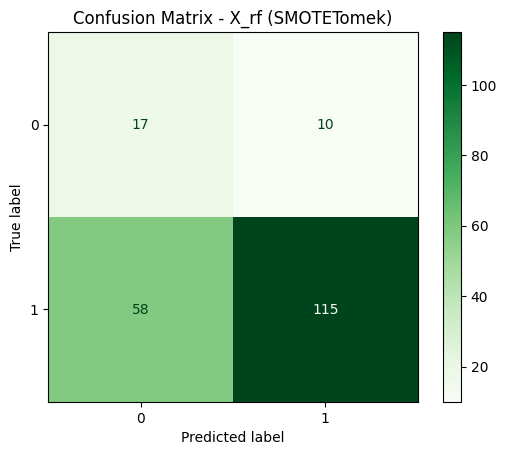


=== Logistic Regression avec SMOTE sur X_pca ===
              precision    recall  f1-score   support

           0     0.1757    0.4815    0.2574        27
           1     0.8889    0.6474    0.7492       173

    accuracy                         0.6250       200
   macro avg     0.5323    0.5644    0.5033       200
weighted avg     0.7926    0.6250    0.6828       200



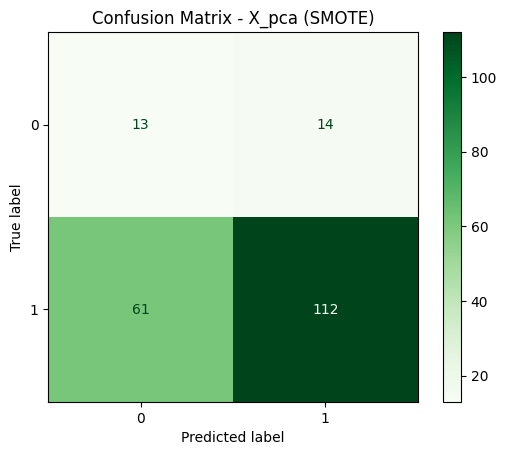


=== Logistic Regression avec ADASYN sur X_pca ===
              precision    recall  f1-score   support

           0     0.1600    0.4444    0.2353        27
           1     0.8800    0.6358    0.7383       173

    accuracy                         0.6100       200
   macro avg     0.5200    0.5401    0.4868       200
weighted avg     0.7828    0.6100    0.6704       200



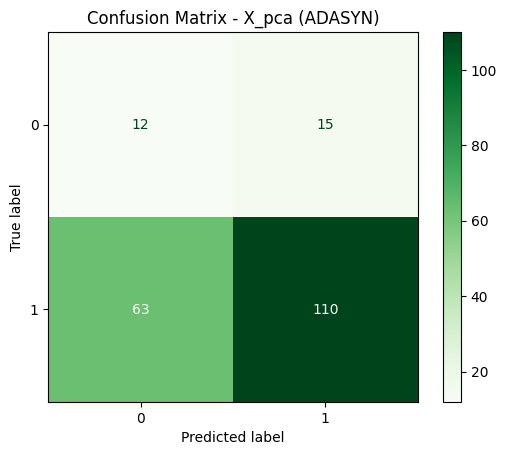


=== Logistic Regression avec SMOTETomek sur X_pca ===
              precision    recall  f1-score   support

           0     0.1571    0.4074    0.2268        27
           1     0.8769    0.6590    0.7525       173

    accuracy                         0.6250       200
   macro avg     0.5170    0.5332    0.4896       200
weighted avg     0.7798    0.6250    0.6815       200



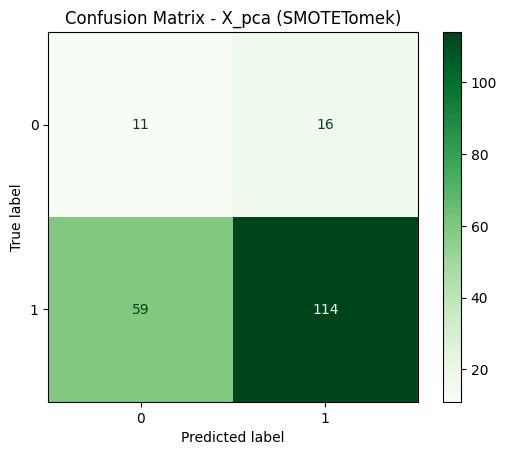

In [ ]:
# Fonction d'entraînement et évaluation
def oversample_and_train_logreg(X_train, y_train, X_test, y_test, method_name, dataset_name):
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    else:
        raise ValueError("Méthode inconnue")

    # Suréchantillonnage
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    # Modèle Logistic Regression
    model = LogisticRegression(C=10, solver='liblinear',class_weight='balanced', random_state=42)
    model.fit(X_res, y_res)

    # Prédiction
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n=== Logistic Regression avec {method_name} sur {dataset_name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

# === Application aux 3 jeux de données ===

# Dataset 1 : X_normal
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg(Xn_train, yn_train, Xn_test, yn_test, method, 'X_normal')

# Dataset 2 : X_rf
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg(Xrf_train, yrf_train, Xrf_test, yrf_test, method, 'X_rf')

# Dataset 3 : X_pca
for method in ['SMOTE', 'ADASYN', 'SMOTETomek']:
    oversample_and_train_logreg(Xpca_train, ypca_train, Xpca_test, ypca_test, method, 'X_pca')


#### LR avec (SMOTE_ADASYN_SMOTETOMEK) + class_weight='balanced'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd # N'oublie pas d'importer pandas

# Fonction d'entraînement et d'évaluation pour Logistic Regression, retournant les métriques
def train_LR(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n=== Entraînement Logistic Regression avec {method_name} sur {dataset_name} ===")

    # Choix de la méthode de rééchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Ajout du cas 'None' pour les données non rééchantillonnées
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Appliquer la méthode de rééchantillonnage (si un sampler est sélectionné)
    if sampler:
        X_res, y_res = sampler.fit_resample(X_train, y_train)
    else:
        X_res, y_res = X_train, y_train # Utiliser les données originales si pas de rééchantillonnage

    # Entraînement du modèle Logistic Regression
    # Tu peux choisir d'utiliser class_weight='balanced' ici ou non, selon l'expérience
    # Si method_name est 'None', utiliser class_weight='balanced' a du sens pour gérer le déséquilibre
    # Si tu utilises SMOTE/ADASYN/SMOTETomek, class_weight='balanced' peut ne pas être nécessaire,
    # mais tu peux l'essayer pour voir l'effet combiné.
    model = LogisticRegression(C=10, solver='liblinear',class_weight='balanced', random_state=42)
    model.fit(X_res, y_res)

    # Prédiction sur les données de test
    y_pred = model.predict(X_test)

    # Évaluation et collecte des métriques
    print(f"\n=== Évaluation Logistic Regression avec {method_name} sur {dataset_name} ===")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Affichage du rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, digits=4))

    # Créer un dictionnaire des métriques
    metrics = {
        'Model': 'Logistic Regression', # Nom du modèle
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="BuPu")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics # Retourner le dictionnaire de métriques


=== Entraînement Logistic Regression avec None sur X_normal ===

=== Évaluation Logistic Regression avec None sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2329    0.6296    0.3400        27
           1     0.9213    0.6763    0.7800       173

    accuracy                         0.6700       200
   macro avg     0.5771    0.6530    0.5600       200
weighted avg     0.8283    0.6700    0.7206       200



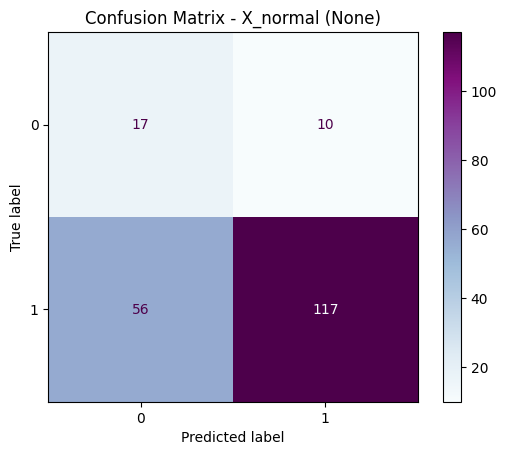


=== Entraînement Logistic Regression avec SMOTE sur X_normal ===

=== Évaluation Logistic Regression avec SMOTE sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



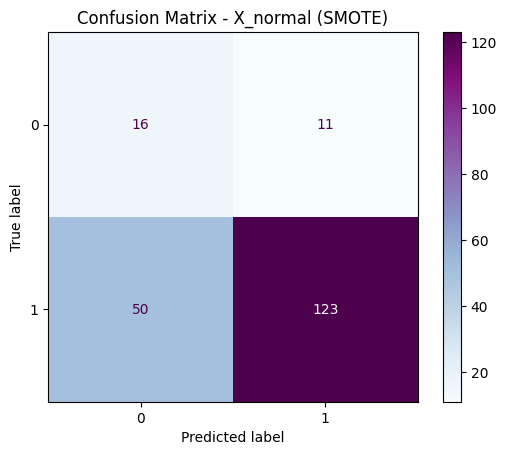


=== Entraînement Logistic Regression avec ADASYN sur X_normal ===

=== Évaluation Logistic Regression avec ADASYN sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2535    0.6667    0.3673        27
           1     0.9302    0.6936    0.7947       173

    accuracy                         0.6900       200
   macro avg     0.5919    0.6802    0.5810       200
weighted avg     0.8389    0.6900    0.7370       200



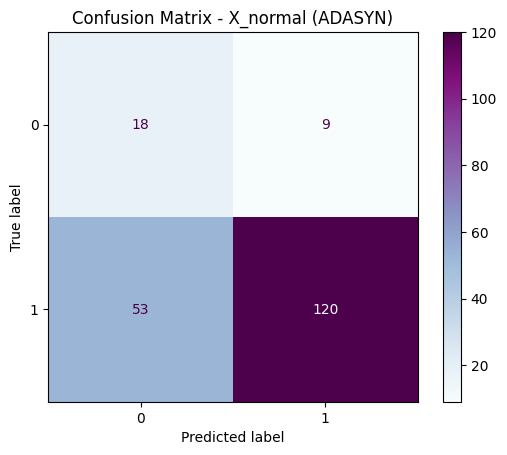


=== Entraînement Logistic Regression avec SMOTETomek sur X_normal ===

=== Évaluation Logistic Regression avec SMOTETomek sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



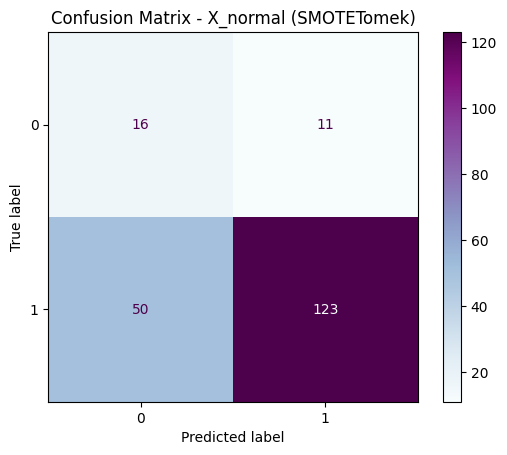


=== Entraînement Logistic Regression avec None sur X_rf ===

=== Évaluation Logistic Regression avec None sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2237    0.6296    0.3301        27
           1     0.9194    0.6590    0.7677       173

    accuracy                         0.6550       200
   macro avg     0.5715    0.6443    0.5489       200
weighted avg     0.8254    0.6550    0.7086       200



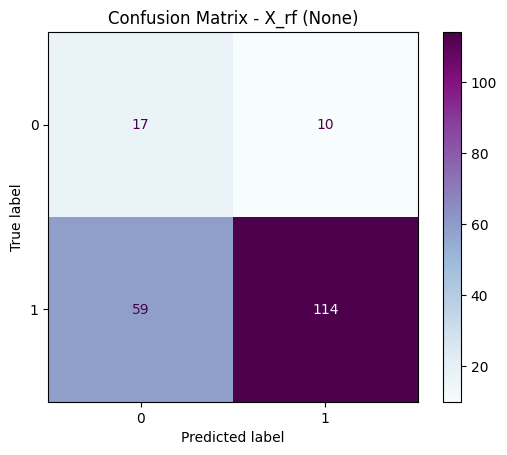


=== Entraînement Logistic Regression avec SMOTE sur X_rf ===

=== Évaluation Logistic Regression avec SMOTE sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



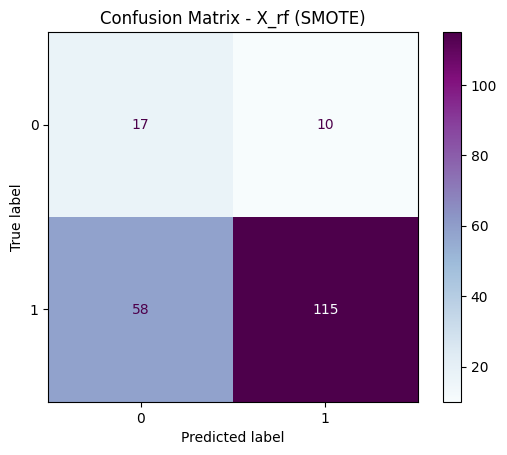


=== Entraînement Logistic Regression avec ADASYN sur X_rf ===

=== Évaluation Logistic Regression avec ADASYN sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2237    0.6296    0.3301        27
           1     0.9194    0.6590    0.7677       173

    accuracy                         0.6550       200
   macro avg     0.5715    0.6443    0.5489       200
weighted avg     0.8254    0.6550    0.7086       200



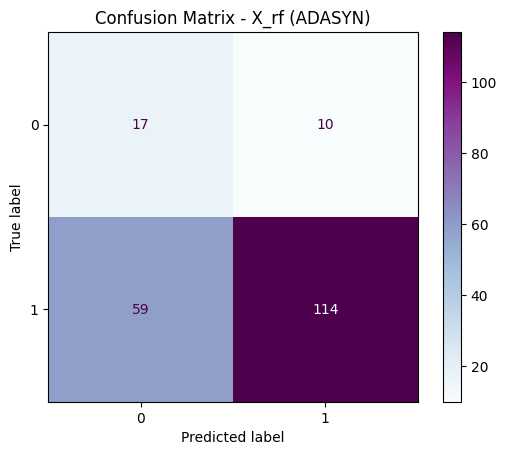


=== Entraînement Logistic Regression avec SMOTETomek sur X_rf ===

=== Évaluation Logistic Regression avec SMOTETomek sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2267    0.6296    0.3333        27
           1     0.9200    0.6647    0.7718       173

    accuracy                         0.6600       200
   macro avg     0.5733    0.6472    0.5526       200
weighted avg     0.8264    0.6600    0.7126       200



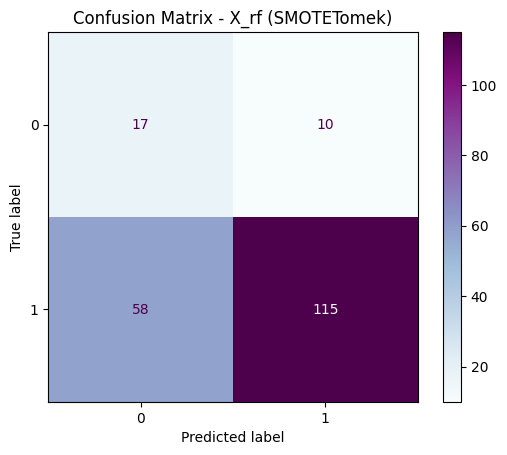


=== Entraînement Logistic Regression avec None sur X_pca ===

=== Évaluation Logistic Regression avec None sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1954    0.6296    0.2982        27
           1     0.9115    0.5954    0.7203       173

    accuracy                         0.6000       200
   macro avg     0.5535    0.6125    0.5093       200
weighted avg     0.8148    0.6000    0.6633       200



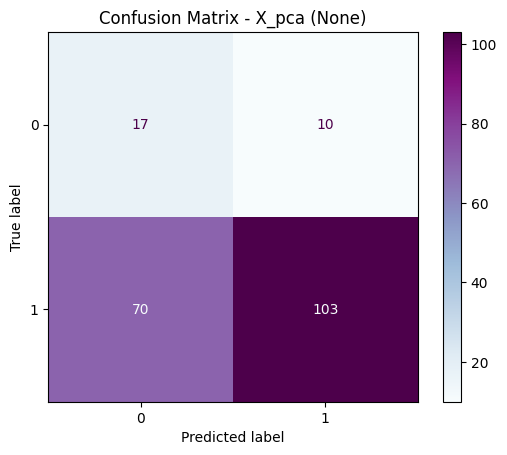


=== Entraînement Logistic Regression avec SMOTE sur X_pca ===

=== Évaluation Logistic Regression avec SMOTE sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1757    0.4815    0.2574        27
           1     0.8889    0.6474    0.7492       173

    accuracy                         0.6250       200
   macro avg     0.5323    0.5644    0.5033       200
weighted avg     0.7926    0.6250    0.6828       200



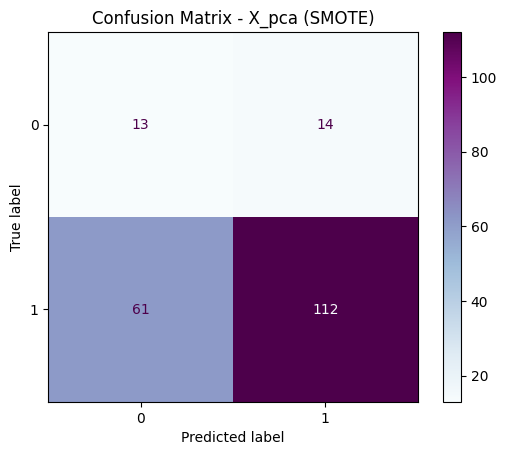


=== Entraînement Logistic Regression avec ADASYN sur X_pca ===

=== Évaluation Logistic Regression avec ADASYN sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1600    0.4444    0.2353        27
           1     0.8800    0.6358    0.7383       173

    accuracy                         0.6100       200
   macro avg     0.5200    0.5401    0.4868       200
weighted avg     0.7828    0.6100    0.6704       200



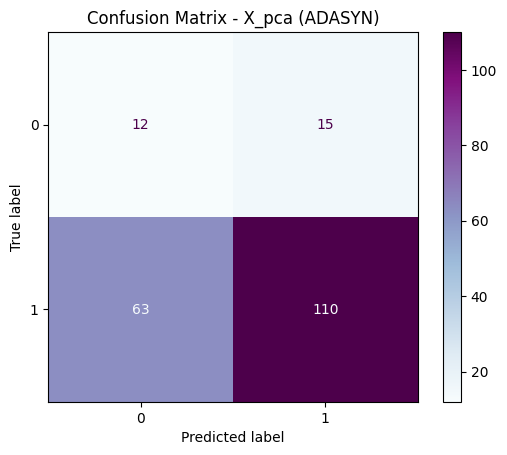


=== Entraînement Logistic Regression avec SMOTETomek sur X_pca ===

=== Évaluation Logistic Regression avec SMOTETomek sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1571    0.4074    0.2268        27
           1     0.8769    0.6590    0.7525       173

    accuracy                         0.6250       200
   macro avg     0.5170    0.5332    0.4896       200
weighted avg     0.7798    0.6250    0.6815       200



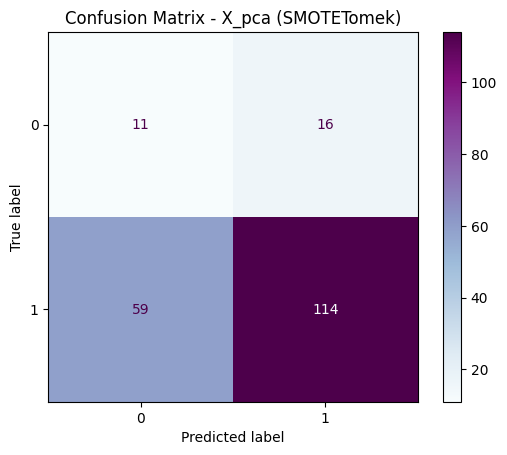

In [ ]:
# Liste pour stocker les métriques de Logistic Regression
all_lr_metrics = []

# Liste des méthodes de rééchantillonnage
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Boucle à travers les datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Boucle à travers les méthodes de rééchantillonnage
    for method_name in resampling_methods:
        # Appelle la fonction modifiée pour entraîner, évaluer et collecter les métriques LR
        # La fonction train_LR
        # utilise déjà class_weight='balanced' à l'intérieur.
        # Si method_name est 'None', elle entraînera la LR avec class_weight='balanced'
        # sur les données originales.

        metrics = train_LR(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_lr_metrics.append(metrics)



# Pour voir seulement les résultats de LR :
lr_comparison_df = pd.DataFrame(all_lr_metrics)


#####lr_comparison_df

In [ ]:
print("\nTableau de comparaison des métriques pour Logistic Regression (avec et sans rééchantillonnage) :")
lr_comparison_df


Tableau de comparaison des métriques pour Logistic Regression (avec et sans rééchantillonnage) :


Model   Dataset Resampling Method  Accuracy  \
0   Logistic Regression  X_normal              None     0.670   
1   Logistic Regression  X_normal             SMOTE     0.695   
2   Logistic Regression  X_normal            ADASYN     0.690   
3   Logistic Regression  X_normal        SMOTETomek     0.695   
4   Logistic Regression      X_rf              None     0.655   
5   Logistic Regression      X_rf             SMOTE     0.660   
6   Logistic Regression      X_rf            ADASYN     0.655   
7   Logistic Regression      X_rf        SMOTETomek     0.660   
8   Logistic Regression     X_pca              None     0.600   
9   Logistic Regression     X_pca             SMOTE     0.625   
10  Logistic Regression     X_pca            ADASYN     0.610   
11  Logistic Regression     X_pca        SMOTETomek     0.625   

    Precision (Class 0)  Recall (Class 0)  F1-score (Class 0)  \
0              0.232877          0.629630            0.340000   
1              0.242424          0.592593            0.344086   
2              0.253521          0.666667            0.367347   
3              0.242424          0.592593            0.344086   
4              0.223684          0.629630            0.330097   
5              0.226667          0.629630            0.333333   
6              0.223684          0.629630            0.330097   
7              0.226667          0.629630            0.333333   
8              0.195402          0.629630            0.298246   
9              0.175676          0.481481            0.257426   
10             0.160000          0.444444            0.235294   
11             0.157143          0.407407            0.226804   

    Precision (Class 1)  Recall (Class 1)  F1-score (Class 1)  \
0              0.921260          0.676301            0.780000   
1              0.917910          0.710983            0.801303   
2              0.930233          0.693642            0.794702   
3              0.917910          0.710983            0.801303   
4              0.919355          0.658960            0.767677   
5              0.920000          0.664740            0.771812   
6              0.919355          0.658960            0.767677   
7              0.920000          0.664740            0.771812   
8              0.911504          0.595376            0.720280   
9              0.888889          0.647399            0.749164   
10             0.880000          0.635838            0.738255   
11             0.876923          0.658960            0.752475   

    Macro Avg Precision  Macro Avg Recall  Macro Avg F1-score  
0              0.577068          0.652965            0.560000  
1              0.580167          0.651788            0.572694  
2              0.591877          0.680154            0.581024  
3              0.580167          0.651788            0.572694  
4              0.571520          0.644295            0.548887  
5              0.573333          0.647185            0.552573  
6              0.571520          0.644295            0.548887  
7              0.573333          0.647185            0.552573  
8              0.553453          0.612503            0.509263  
9              0.532282          0.564440            0.503295  
10             0.520000          0.540141            0.486775  
11             0.517033          0.533183            0.489640

##### Visualisation LR


=== Visualisation pour le modèle : Logistic Regression ===



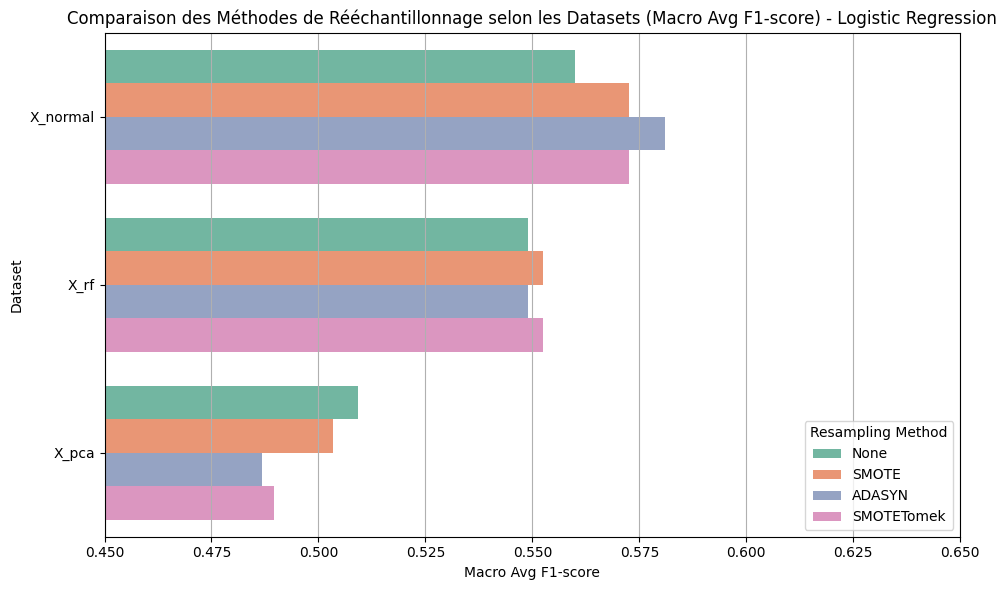

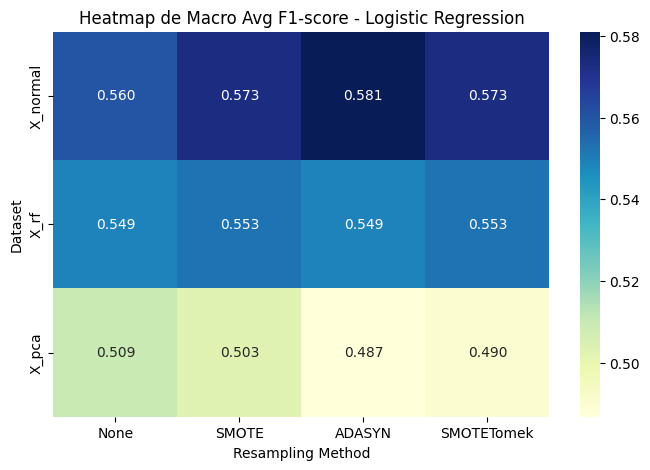

In [ ]:
print("\n=== Visualisation pour le modèle : Logistic Regression ===\n")
plot_barplot(lr_comparison_df, "Logistic Regression", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(lr_comparison_df, "Logistic Regression", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(lr_comparison_df, "Logistic Regression")

Model   Dataset Resampling Method  Accuracy  \
2  Logistic Regression  X_normal            ADASYN     0.690   
1  Logistic Regression  X_normal             SMOTE     0.695   
3  Logistic Regression  X_normal        SMOTETomek     0.695   
0  Logistic Regression  X_normal              None     0.670   
5  Logistic Regression      X_rf             SMOTE     0.660   

   Precision (Class 0)  Recall (Class 0)  F1-score (Class 0)  \
2             0.253521          0.666667            0.367347   
1             0.242424          0.592593            0.344086   
3             0.242424          0.592593            0.344086   
0             0.232877          0.629630            0.340000   
5             0.226667          0.629630            0.333333   

   Precision (Class 1)  Recall (Class 1)  F1-score (Class 1)  \
2             0.930233          0.693642            0.794702   
1             0.917910          0.710983            0.801303   
3             0.917910          0.710983            0.801303   
0             0.921260          0.676301            0.780000   
5             0.920000          0.664740            0.771812   

   Macro Avg Precision  Macro Avg Recall  Macro Avg F1-score  
2             0.591877          0.680154            0.581024  
1             0.580167          0.651788            0.572694  
3             0.580167          0.651788            0.572694  
0             0.577068          0.652965            0.560000  
5             0.573333          0.647185            0.552573

###Random Forest

####GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score # Important for scoring with imbalanced data

def find_best_params_rf(X_train, y_train):
    """
    Recherche des meilleurs paramètres pour RandomForestClassifier via GridSearchCV.
    Utilise le macro F1-score comme métrique d'évaluation pour la recherche.
    """
    print("\nRecherche des meilleurs paramètres pour Random Forest...")

    # Définir la grille de paramètres à tester
    param_grid = {
        'n_estimators': [50, 100, 150], # Exemple, tu peux augmenter ou modifier
        'max_depth': [None, 10, 20],    # None signifie profondeur illimitée
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', 'balanced_subsample'] # Important pour déséquilibre
    }

    # Créer le modèle Random Forest
    rf = RandomForestClassifier(random_state=42)

    # Utiliser le macro F1-score comme métrique de scoring pour GridSearchCV
    # C'est plus approprié que l'accuracy pour les données déséquilibrées.
    macro_f1_scorer = make_scorer(f1_score, average='macro')

    # Configuration de la recherche par grille avec validation croisée
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               cv=5, scoring=macro_f1_scorer, # Utilise le macro F1-score
                               verbose=1, n_jobs=-1) # n_jobs=-1 utilise tous les cœurs disponibles

    # Effectuer la recherche sur les données d'entraînement

    grid_search.fit(X_train, y_train)

    print(f"Meilleurs paramètres trouvés: {grid_search.best_params_}")
    print(f"Meilleur score de validation (Macro F1): {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_ # Retourne le modèle avec les meilleurs paramètres

In [ ]:
# # Exemple d'utilisation :
# # Pour les données Normal avec SMOTE
# smote = SMOTE(random_state=42)
# Xn_train_smote, yn_train_smote = smote.fit_resample(Xn_train, yn_train)

# # Trouver les meilleurs paramètres RF sur les données SMOTE
# best_rf_smote_normal = find_best_params_rf(Xn_train_smote, yn_train_smote)

# # Ensuite, tu entraînerais ton modèle final en utilisant best_rf_smote_normal
# # et tu l'évaluerais sur Xn_test, yn_test.


# #rslt :

# # Recherche des meilleurs paramètres pour Random Forest...
# # Fitting 5 folds for each of 162 candidates, totalling 810 fits
# # Meilleurs paramètres trouvés: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
# # Meilleur score de validation (Macro F1): 0.8910

####train_RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd # N'oublie pas d'importer pandas

# Fonction pour entraîner Random Forest avec rééchantillonnage et collecter les métriques
def train_RF(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n=== Entraînement Random Forest avec {method_name} sur {dataset_name} ===")

    # Choisir la méthode de rééchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Ajout du cas 'None'
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Appliquer la méthode de rééchantillonnage (si un sampler est sélectionné)
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train # Utiliser les données originales


    model = RandomForestClassifier(
      class_weight='balanced_subsample',
      max_depth=10,
      min_samples_leaf=2,
      min_samples_split=5,
      n_estimators=150,
      random_state=42 # Il est toujours bon d'ajouter random_state pour la reproductibilité
    )



    model.fit(X_resampled, y_resampled)

    # Prédiction sur le test
    y_pred = model.predict(X_test)

    # Évaluation et collecte des métriques
    print(f"\n=== Évaluation Random Forest avec {method_name} sur {dataset_name} ===")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Affichage du rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, digits=4))

    # Créer un dictionnaire des métriques (structure uniforme)
    metrics = {
        'Model': 'Random Forest', # Nom du modèle
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics # Retourner le dictionnaire


=== Entraînement Random Forest avec None sur X_normal ===

=== Évaluation Random Forest avec None sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2286    0.2963    0.2581        27
           1     0.8848    0.8439    0.8639       173

    accuracy                         0.7700       200
   macro avg     0.5567    0.5701    0.5610       200
weighted avg     0.7963    0.7700    0.7821       200



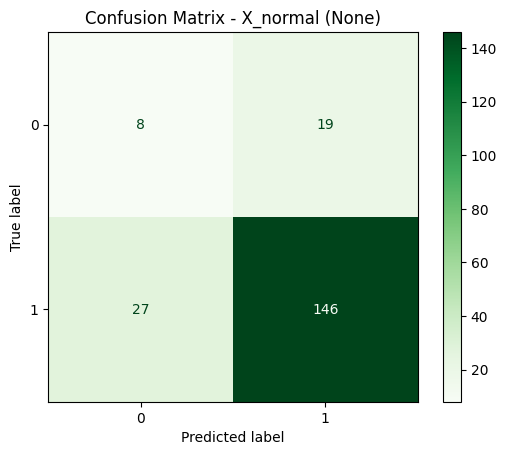


=== Entraînement Random Forest avec SMOTE sur X_normal ===

=== Évaluation Random Forest avec SMOTE sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2500    0.1852    0.2128        27
           1     0.8778    0.9133    0.8952       173

    accuracy                         0.8150       200
   macro avg     0.5639    0.5492    0.5540       200
weighted avg     0.7930    0.8150    0.8031       200



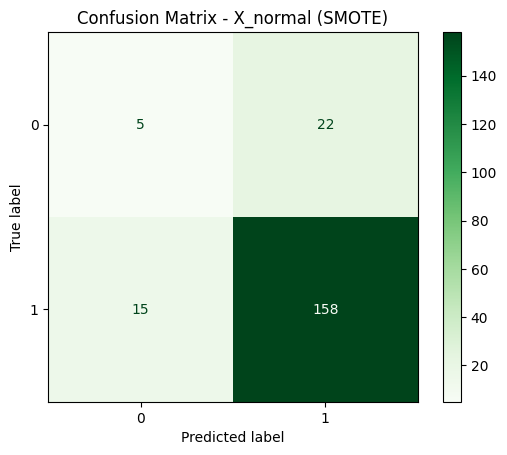


=== Entraînement Random Forest avec ADASYN sur X_normal ===

=== Évaluation Random Forest avec ADASYN sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2692    0.2593    0.2642        27
           1     0.8851    0.8902    0.8876       173

    accuracy                         0.8050       200
   macro avg     0.5771    0.5747    0.5759       200
weighted avg     0.8019    0.8050    0.8034       200



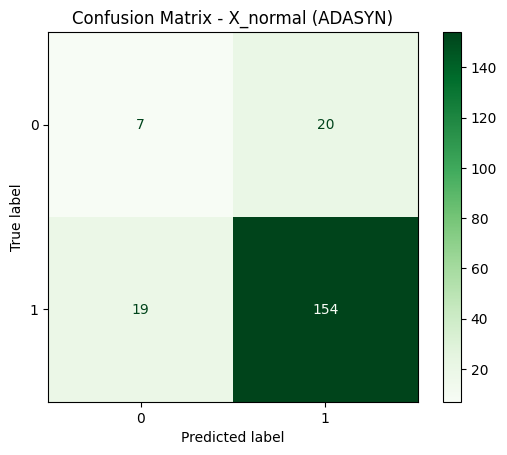


=== Entraînement Random Forest avec SMOTETomek sur X_normal ===

=== Évaluation Random Forest avec SMOTETomek sur X_normal ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2632    0.1852    0.2174        27
           1     0.8785    0.9191    0.8983       173

    accuracy                         0.8200       200
   macro avg     0.5708    0.5521    0.5578       200
weighted avg     0.7954    0.8200    0.8064       200



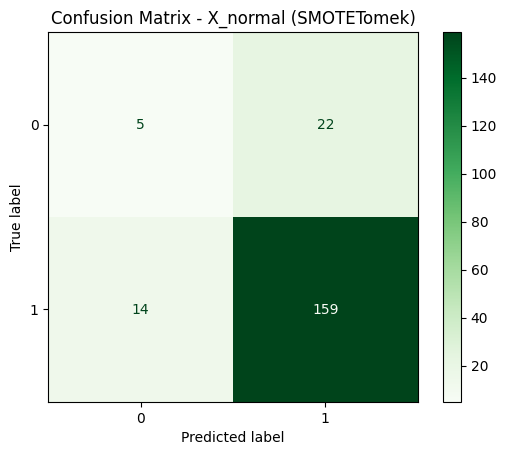


=== Entraînement Random Forest avec None sur X_rf ===

=== Évaluation Random Forest avec None sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.1944    0.5185    0.2828        27
           1     0.8984    0.6647    0.7641       173

    accuracy                         0.6450       200
   macro avg     0.5464    0.5916    0.5235       200
weighted avg     0.8034    0.6450    0.6991       200



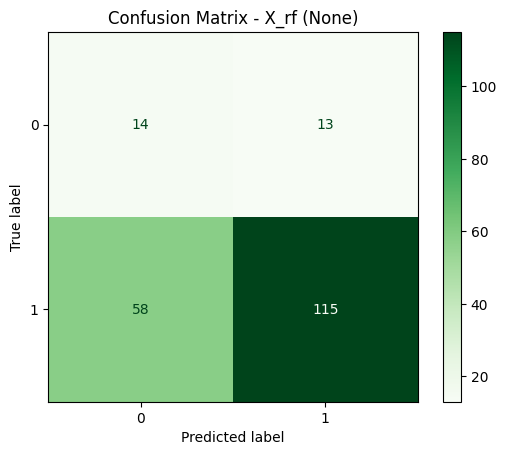


=== Entraînement Random Forest avec SMOTE sur X_rf ===

=== Évaluation Random Forest avec SMOTE sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2791    0.4444    0.3429        27
           1     0.9045    0.8208    0.8606       173

    accuracy                         0.7700       200
   macro avg     0.5918    0.6326    0.6017       200
weighted avg     0.8200    0.7700    0.7907       200



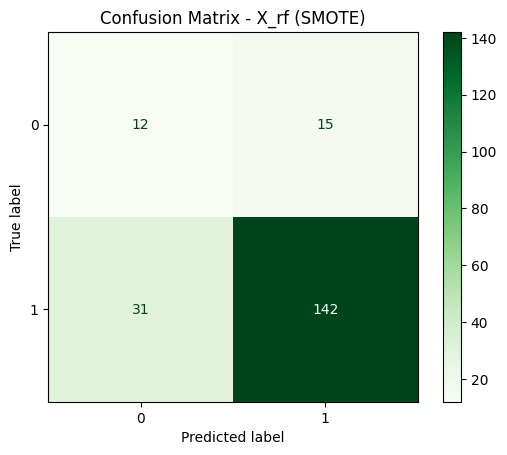


=== Entraînement Random Forest avec ADASYN sur X_rf ===

=== Évaluation Random Forest avec ADASYN sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2353    0.4444    0.3077        27
           1     0.8993    0.7746    0.8323       173

    accuracy                         0.7300       200
   macro avg     0.5673    0.6095    0.5700       200
weighted avg     0.8097    0.7300    0.7615       200



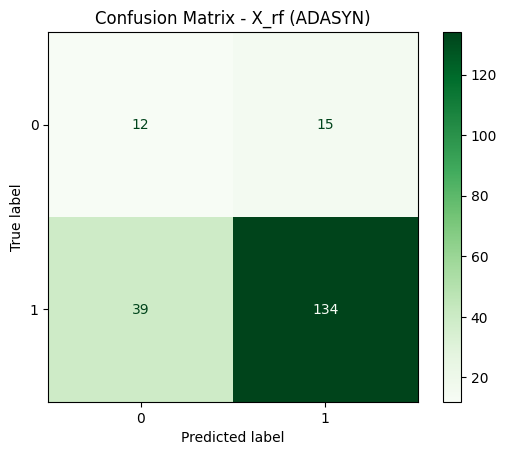


=== Entraînement Random Forest avec SMOTETomek sur X_rf ===

=== Évaluation Random Forest avec SMOTETomek sur X_rf ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2791    0.4444    0.3429        27
           1     0.9045    0.8208    0.8606       173

    accuracy                         0.7700       200
   macro avg     0.5918    0.6326    0.6017       200
weighted avg     0.8200    0.7700    0.7907       200



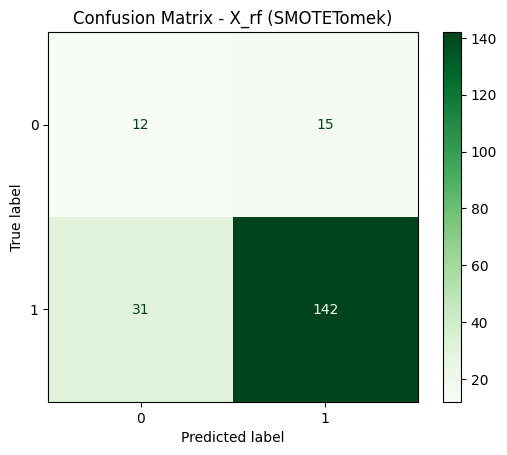


=== Entraînement Random Forest avec None sur X_pca ===

=== Évaluation Random Forest avec None sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2571    0.3333    0.2903        27
           1     0.8909    0.8497    0.8698       173

    accuracy                         0.7800       200
   macro avg     0.5740    0.5915    0.5801       200
weighted avg     0.8054    0.7800    0.7916       200



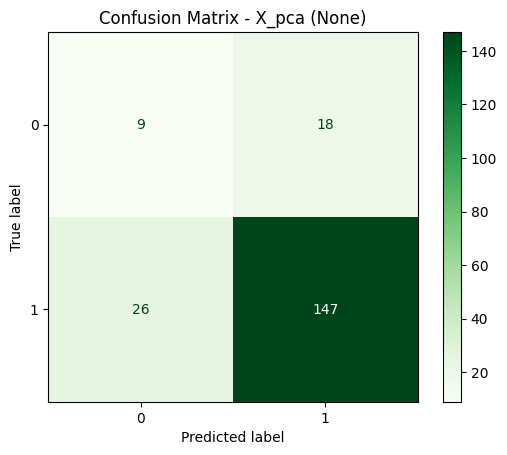


=== Entraînement Random Forest avec SMOTE sur X_pca ===

=== Évaluation Random Forest avec SMOTE sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2500    0.2593    0.2545        27
           1     0.8837    0.8786    0.8812       173

    accuracy                         0.7950       200
   macro avg     0.5669    0.5689    0.5679       200
weighted avg     0.7982    0.7950    0.7966       200



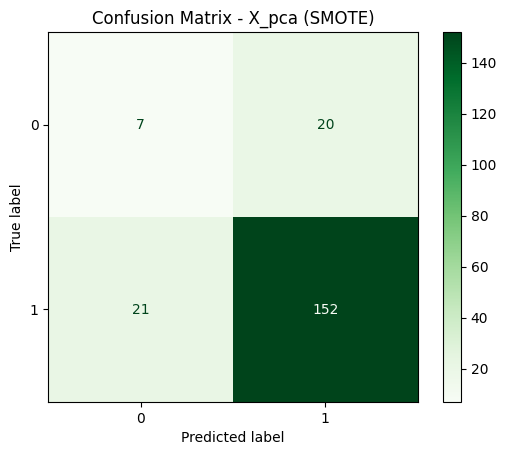


=== Entraînement Random Forest avec ADASYN sur X_pca ===

=== Évaluation Random Forest avec ADASYN sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.3103    0.3333    0.3214        27
           1     0.8947    0.8844    0.8895       173

    accuracy                         0.8100       200
   macro avg     0.6025    0.6089    0.6055       200
weighted avg     0.8158    0.8100    0.8128       200



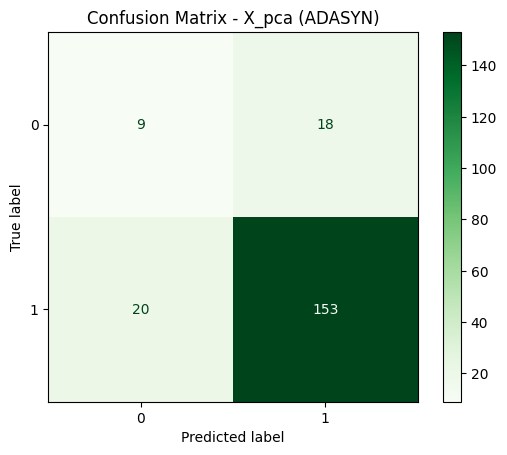


=== Entraînement Random Forest avec SMOTETomek sur X_pca ===

=== Évaluation Random Forest avec SMOTETomek sur X_pca ===
Rapport de classification :
              precision    recall  f1-score   support

           0     0.2692    0.2593    0.2642        27
           1     0.8851    0.8902    0.8876       173

    accuracy                         0.8050       200
   macro avg     0.5771    0.5747    0.5759       200
weighted avg     0.8019    0.8050    0.8034       200



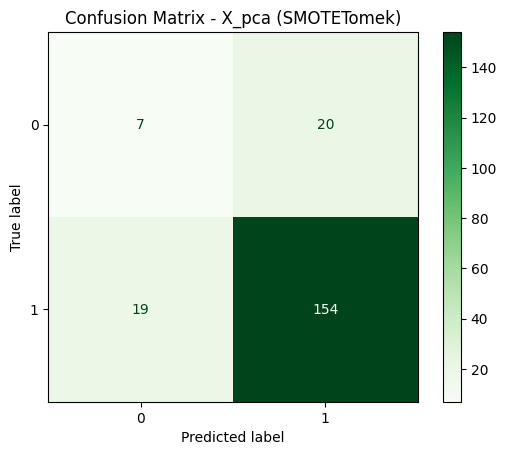

In [ ]:


# Liste pour stocker les métriques de Random Forest
all_rf_metrics = []



# Liste des méthodes de rééchantillonnage, incluant 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Boucle à travers les datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Boucle à travers les méthodes de rééchantillonnage
    for method_name in resampling_methods:
        # Appelle la fonction modifiée pour entraîner, évaluer et collecter les métriques RF
        metrics = train_RF(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        all_rf_metrics.append(metrics)

# Pour voir seulement les résultats de Random Forest :
rf_comparison_df = pd.DataFrame(all_rf_metrics)


##### rf_comparison_df

In [ ]:
rf_comparison_df

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0   Random Forest  X_normal              None     0.770             0.228571   
1   Random Forest  X_normal             SMOTE     0.815             0.250000   
2   Random Forest  X_normal            ADASYN     0.805             0.269231   
3   Random Forest  X_normal        SMOTETomek     0.820             0.263158   
4   Random Forest      X_rf              None     0.645             0.194444   
5   Random Forest      X_rf             SMOTE     0.770             0.279070   
6   Random Forest      X_rf            ADASYN     0.730             0.235294   
7   Random Forest      X_rf        SMOTETomek     0.770             0.279070   
8   Random Forest     X_pca              None     0.780             0.257143   
9   Random Forest     X_pca             SMOTE     0.795             0.250000   
10  Random Forest     X_pca            ADASYN     0.810             0.310345   
11  Random Forest     X_pca        SMOTETomek     0.805             0.269231   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.296296            0.258065             0.884848   
1           0.185185            0.212766             0.877778   
2           0.259259            0.264151             0.885057   
3           0.185185            0.217391             0.878453   
4           0.518519            0.282828             0.898438   
5           0.444444            0.342857             0.904459   
6           0.444444            0.307692             0.899329   
7           0.444444            0.342857             0.904459   
8           0.333333            0.290323             0.890909   
9           0.259259            0.254545             0.883721   
10          0.333333            0.321429             0.894737   
11          0.259259            0.264151             0.885057   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.843931            0.863905             0.556710   
1           0.913295            0.895184             0.563889   
2           0.890173            0.887608             0.577144   
3           0.919075            0.898305             0.570805   
4           0.664740            0.764120             0.546441   
5           0.820809            0.860606             0.591764   
6           0.774566            0.832298             0.567311   
7           0.820809            0.860606             0.591764   
8           0.849711            0.869822             0.574026   
9           0.878613            0.881159             0.566860   
10          0.884393            0.889535             0.602541   
11          0.890173            0.887608             0.577144   

    Macro Avg Recall  Macro Avg F1-score  
0           0.570113            0.560985  
1           0.549240            0.553975  
2           0.574716            0.575880  
3           0.552130            0.557848  
4           0.591629            0.523474  
5           0.632627            0.601732  
6           0.609505            0.569995  
7           0.632627            0.601732  
8           0.591522            0.580073  
9           0.568936            0.567852  
10          0.608863            0.605482  
11          0.574716            0.575880

##### Visualisatin RF

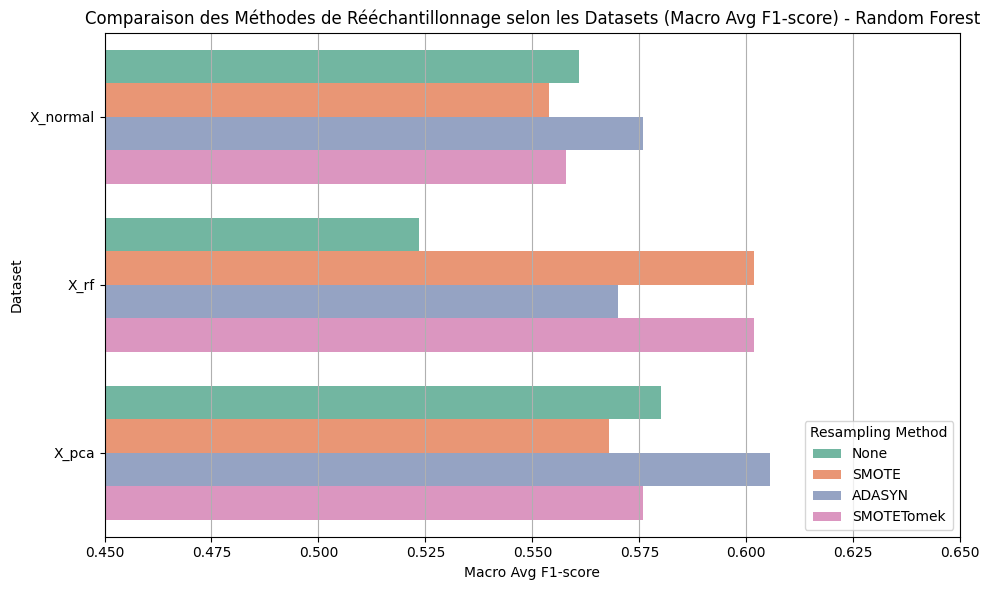

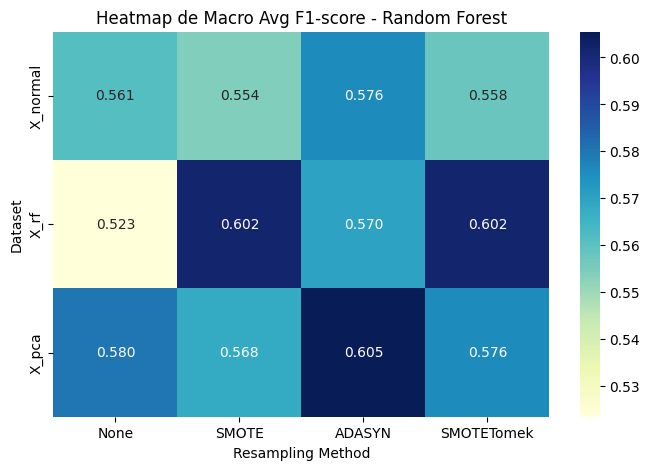

In [ ]:
plot_barplot(rf_comparison_df, "Random Forest", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(rf_comparison_df, "Random Forest", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(rf_comparison_df, "Random Forest")

Model Dataset Resampling Method  Accuracy  Precision (Class 0)  \
10  Random Forest   X_pca            ADASYN     0.810             0.310345   
5   Random Forest    X_rf             SMOTE     0.770             0.279070   
7   Random Forest    X_rf        SMOTETomek     0.770             0.279070   
8   Random Forest   X_pca              None     0.780             0.257143   
11  Random Forest   X_pca        SMOTETomek     0.805             0.269231   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
10          0.333333            0.321429             0.894737   
5           0.444444            0.342857             0.904459   
7           0.444444            0.342857             0.904459   
8           0.333333            0.290323             0.890909   
11          0.259259            0.264151             0.885057   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
10          0.884393            0.889535             0.602541   
5           0.820809            0.860606             0.591764   
7           0.820809            0.860606             0.591764   
8           0.849711            0.869822             0.574026   
11          0.890173            0.887608             0.577144   

    Macro Avg Recall  Macro Avg F1-score  
10          0.608863            0.605482  
5           0.632627            0.601732  
7           0.632627            0.601732  
8           0.591522            0.580073  
11          0.574716            0.575880

###AdaBOOST

####GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # Importer SMOTE
from sklearn.metrics import classification_report, make_scorer, f1_score # Importer f1_score et make_scorer

def perform_adaboost_grid_search_with_smote(X_train_original, y_train_original, dataset_name=''):
    """
    Applique SMOTE sur les données d'entraînement, puis effectue un Grid Search
    pour trouver les meilleurs paramètres pour AdaBoost sur ces données suréchantillonnées.
    """
    print(f"\n=== Grid Search pour AdaBoost sur {dataset_name} (avec SMOTE appliqué sur train) ===")

    # 1. Appliquer SMOTE sur les données d'entraînement originales
    print(f"Application de SMOTE sur les données d'entraînement {dataset_name}...")
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_original, y_train_original)

    print(f"Forme des données d'entraînement après SMOTE : {X_train_smote.shape}")


    # 2. Définir les hyperparamètres à tester pour AdaBoost
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
    }

    # Créer le modèle AdaBoost de base
    ada = AdaBoostClassifier(random_state=42)

    # 3. Configurer et exécuter la recherche par grille
    # déséquilibrées pour le scoring dans GridSearchCV, comme le F1-score macro.

    scoring_metric = make_scorer(f1_score, average='macro') # Utiliser F1-score macro

    grid_search = GridSearchCV(estimator=ada, param_grid=param_grid,
                               cv=5, scoring=scoring_metric, n_jobs=-1, verbose=1) # Utiliser la métrique définie

    # Lancer l'entraînement de la recherche par grille sur les données *suréchantillonnées*
    grid_search.fit(X_train_smote, y_train_smote)

    # Résultats
    print(f"\nMeilleurs paramètres pour AdaBoost sur {dataset_name} (après SMOTE) : {grid_search.best_params_}")
    print(f"Meilleur F1-score macro (validation croisée) pour AdaBoost sur {dataset_name} (après SMOTE) : {grid_search.best_score_:.4f}")

    # Le meilleur modèle trouvé (entraîné sur les données SMOTE)
    return grid_search.best_estimator_





# # Exécuter le Grid Search avec SMOTE pour chaque jeu de données d'entraînement

# print("Lancement du Grid Search pour le jeu de données NORMAL (avec SMOTE)...")
# # Passez les données d'entraînement originales/standardisées à la fonction
# best_ada_smote_normal = perform_adaboost_grid_search_with_smote(Xn_train, yn_train, 'X_normal')

# print("\nLancement du Grid Search pour le jeu de données RF (avec SMOTE)...")
# best_ada_smote_rf = perform_adaboost_grid_search_with_smote(Xrf_train, yrf_train, 'X_rf')

# print("\nLancement du Grid Search pour le jeu de données PCA (avec SMOTE)...")
# best_ada_smote_pca = perform_adaboost_grid_search_with_smote(Xpca_train, ypca_train, 'X_pca')




# lancement du Grid Search pour le jeu de données NORMAL (avec SMOTE)...

# === Grid Search pour AdaBoost sur X_normal (avec SMOTE appliqué sur train) ===
# Application de SMOTE sur les données d'entraînement X_normal...
# Forme des données d'entraînement après SMOTE : (1448, 9)
# Fitting 5 folds for each of 12 candidates, totalling 60 fits

# Meilleurs paramètres pour AdaBoost sur X_normal (après SMOTE) : {'learning_rate': 1.0, 'n_estimators': 200}
# Meilleur F1-score macro (validation croisée) pour AdaBoost sur X_normal (après SMOTE) : 0.8710

# Lancement du Grid Search pour le jeu de données RF (avec SMOTE)...

# === Grid Search pour AdaBoost sur X_rf (avec SMOTE appliqué sur train) ===
# Application de SMOTE sur les données d'entraînement X_rf...
# Forme des données d'entraînement après SMOTE : (1448, 4)
# Fitting 5 folds for each of 12 candidates, totalling 60 fits

# Meilleurs paramètres pour AdaBoost sur X_rf (après SMOTE) : {'learning_rate': 1.0, 'n_estimators': 200}
# Meilleur F1-score macro (validation croisée) pour AdaBoost sur X_rf (après SMOTE) : 0.7529

# Lancement du Grid Search pour le jeu de données PCA (avec SMOTE)...

# === Grid Search pour AdaBoost sur X_pca (avec SMOTE appliqué sur train) ===
# Application de SMOTE sur les données d'entraînement X_pca...
# Forme des données d'entraînement après SMOTE : (1448, 7)
# Fitting 5 folds for each of 12 candidates, totalling 60 fits

# Meilleurs paramètres pour AdaBoost sur X_pca (après SMOTE) : {'learning_rate': 1.0, 'n_estimators': 200}
# Meilleur F1-score macro (validation croisée) pour AdaBoost sur X_pca (après SMOTE) : 0.7500


In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier # Importer si vous voulez tester un base_estimator différent
# from sklearn.metrics import classification_report # Peut être utile après avoir trouvé le meilleur modèle

# def perform_adaboost_grid_search(X_train, y_train, dataset_name=''):
#     """
#     Effectue un Grid Search pour trouver les meilleurs paramètres pour AdaBoost.
#     """
#     print(f"\n=== Grid Search pour AdaBoost sur {dataset_name} ===")

#     # Définir les hyperparamètres à tester
#     # C'est un exemple, vous pouvez ajuster ces plages et valeurs
#     param_grid = {
#         'n_estimators': [50, 100, 200], # Tester différents nombres d'estimateurs
#         'learning_rate': [0.01, 0.1, 0.5, 1.0], # Tester différents taux d'apprentissage
#         # Si vous voulez tester un autre base_estimator (par ex. arbre plus profond), vous pouvez l'ajouter ici
#         # 'base_estimator': [DecisionTreeClassifier(max_depth=1, random_state=42), DecisionTreeClassifier(max_depth=2, random_state=42)]
#     }

#     # Créer le modèle AdaBoost de base
#     # N'incluez PAS base_estimator ici si vous le testez dans param_grid
#     ada = AdaBoostClassifier(random_state=42)

#     # Configuration de la recherche par grille avec validation croisée
#     # cv=5: utilise la validation croisée à 5 plis
#     # scoring='accuracy': utilise l'accuracy comme métrique pour évaluer les combinaisons de paramètres
#     # n_jobs=-1: utilise tous les cœurs disponibles du processeur
#     # verbose=1: affiche la progression de la recherche
#     grid_search = GridSearchCV(estimator=ada, param_grid=param_grid,
#                                cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

#     # Lancer l'entraînement de la recherche par grille sur les données d'entraînement
#     # Important: Appliquer la recherche sur les données d'entraînement SEULEMENT
#     grid_search.fit(X_train, y_train)

#     # Résultats
#     print(f"\nMeilleurs paramètres pour AdaBoost sur {dataset_name} : {grid_search.best_params_}")
#     print(f"Meilleure précision (validation croisée) pour AdaBoost sur {dataset_name} : {grid_search.best_score_:.4f}")

#     # Le meilleur modèle trouvé est accessible via grid_search.best_estimator_
#     return grid_search.best_estimator_

# # Assurez-vous que vos jeux de données d'entraînement sont disponibles :
# # Xn_train, yn_train  (Normal)
# # Xrf_train, yrf_train (RF Features)
# # Xpca_train, ypca_train (PCA Components)

# # Exécuter le Grid Search pour chaque jeu de données d'entraînement

# # Note: Vous pouvez choisir d'exécuter le Grid Search sur les données
# # rééchantillonnées (e.g., X_smote, y_smote) si vous voulez optimiser
# # le modèle spécifiquement pour ces données. Sinon, l'appliquer sur les
# # données d'entraînement originales (ou standardisées/réduites comme ici)
# # est plus courant pour trouver des paramètres généraux.

# # Exemple sur les données d'entraînement normales (standardisées)
# print("Lancement du Grid Search pour le jeu de données NORMAL...")
# best_ada_normal = perform_adaboost_grid_search(Xn_train, yn_train, 'X_normal')

# # Exemple sur les données d'entraînement après RF feature selection
# print("\nLancement du Grid Search pour le jeu de données RF...")
# best_ada_rf = perform_adaboost_grid_search(Xrf_train, yrf_train, 'X_rf')

# # Exemple sur les données d'entraînement après PCA
# print("\nLancement du Grid Search pour le jeu de données PCA...")
# best_ada_pca = perform_adaboost_grid_search(Xpca_train, ypca_train, 'X_pca')


# # Maintenant que vous avez les meilleurs estimateurs, vous pouvez les évaluer
# # sur les ensembles de test correspondants si vous le souhaitez, bien que le
# # score_cv donne déjà une bonne idée de la performance généralisée.
# # Par exemple :
# # from sklearn.metrics import accuracy_score
# # y_pred_normal = best_ada_normal.predict(Xn_test)
# # print(f"\nAccuracy du meilleur modèle (Normal) sur le test : {accuracy_score(yn_test, y_pred_normal):.4f}")




# # resultat :
# # Lancement du Grid Search pour le jeu de données NORMAL...

# # === Grid Search pour AdaBoost sur X_normal ===
# # Fitting 5 folds for each of 12 candidates, totalling 60 fits

# # Meilleurs paramètres pour AdaBoost sur X_normal : {'learning_rate': 0.5, 'n_estimators': 100}
# # Meilleure précision (validation croisée) pour AdaBoost sur X_normal : 0.9100

# # Lancement du Grid Search pour le jeu de données RF...

# # === Grid Search pour AdaBoost sur X_rf ===
# # Fitting 5 folds for each of 12 candidates, totalling 60 fits

# # Meilleurs paramètres pour AdaBoost sur X_rf : {'learning_rate': 0.01, 'n_estimators': 50}
# # Meilleure précision (validation croisée) pour AdaBoost sur X_rf : 0.9050

# # Lancement du Grid Search pour le jeu de données PCA...

# # === Grid Search pour AdaBoost sur X_pca ===
# # Fitting 5 folds for each of 12 candidates, totalling 60 fits

# # Meilleurs paramètres pour AdaBoost sur X_pca : {'learning_rate': 0.01, 'n_estimators': 50}
# # Meilleure précision (validation croisée) pour AdaBoost sur X_pca : 0.9050

####train_adaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd # Import pandas pour le DataFrame de métriques

def balance_and_train_adaboost_and_collect_metrics(X_train, y_train, X_test, y_test, method_name, dataset_name):
    """
    Applique une méthode de rééchantillonnage et entraîne un AdaBoost Classifier.
    Collecte les métriques de classification et affiche la matrice de confusion.
    Retourne un dictionnaire des métriques.
    """
    print(f"\n--- Entraînement AdaBoost avec {method_name} sur {dataset_name} ---")

    # Choix de la méthode de rééchantillonnage
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None': # Option pour tester sans rééchantillonnage
        sampler = None
        print("Aucun rééchantillonnage appliqué.")
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Rééchantillonnage (si un échantillonneur est défini)
    if sampler:
        # print(f"Application de {method_name}...")
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        # Utilise les données originales si pas de rééchantillonnage
        X_resampled, y_resampled = X_train, y_train

    # Créer et entraîner le modèle AdaBoost
    model = AdaBoostClassifier(learning_rate=1, n_estimators= 200 ,random_state=42)
    model.fit(X_resampled, y_resampled)

    # Prédiction sur les données de test originales
    y_pred = model.predict(X_test)

    # Calcul des métriques
    # Utiliser output_dict=True pour obtenir les métriques sous forme de dictionnaire
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)

    # Affichage du rapport de classification (peut être utile pendant l'exécution)
    print("\nRapport de classification :")
    # Convertir le dictionnaire en DataFrame pour un affichage lisible dans la sortie console
    print(pd.DataFrame(report).transpose())


    # Créer un dictionnaire des métriques clés à collecter
    # Assurez-vous que les clés '0' et '1' existent dans le rapport
    metrics = {
        'Model': 'AdaBoost',
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report.get('accuracy', 0.0), # Utiliser .get pour éviter KeyError si une classe est absente
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report.get('macro avg', {}).get('precision', 0.0),
        'Macro Avg Recall': report.get('macro avg', {}).get('recall', 0.0),
        'Macro Avg F1-score': report.get('macro avg', {}).get('f1-score', 0.0)
        # Ajoutez d'autres métriques si nécessaire, par exemple weighted avg
        # 'Weighted Avg F1-score': report['weighted avg']['f1-score']
    }


    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Spécifier les labels
    disp.plot(cmap="Reds")
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()


    return metrics # Retourne le dictionnaire de métriques




--- Entraînement AdaBoost avec None sur X_normal ---
Aucun rééchantillonnage appliqué.

Rapport de classification :
              precision   recall  f1-score  support
0              0.000000  0.00000  0.000000    27.00
1              0.864322  0.99422  0.924731   173.00
accuracy       0.860000  0.86000  0.860000     0.86
macro avg      0.432161  0.49711  0.462366   200.00
weighted avg   0.747638  0.86000  0.799892   200.00


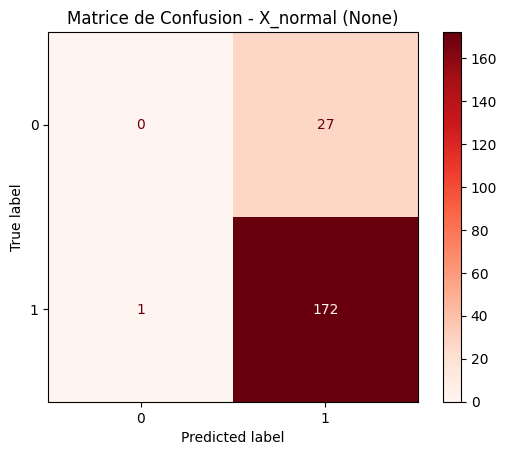


--- Entraînement AdaBoost avec SMOTE sur X_normal ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.263158  0.185185  0.217391    27.00
1              0.878453  0.919075  0.898305   173.00
accuracy       0.820000  0.820000  0.820000     0.82
macro avg      0.570805  0.552130  0.557848   200.00
weighted avg   0.795388  0.820000  0.806382   200.00


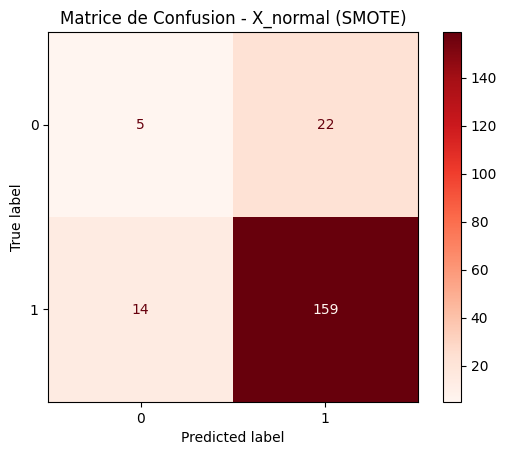


--- Entraînement AdaBoost avec ADASYN sur X_normal ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.222222  0.148148  0.177778   27.000
1              0.873626  0.919075  0.895775  173.000
accuracy       0.815000  0.815000  0.815000    0.815
macro avg      0.547924  0.533612  0.536776  200.000
weighted avg   0.785687  0.815000  0.798845  200.000


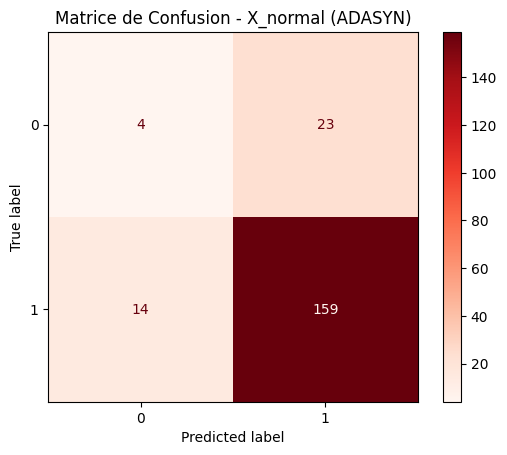


--- Entraînement AdaBoost avec SMOTETomek sur X_normal ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.259259  0.259259  0.259259     27.0
1              0.884393  0.884393  0.884393    173.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.571826  0.571826  0.571826    200.0
weighted avg   0.800000  0.800000  0.800000    200.0


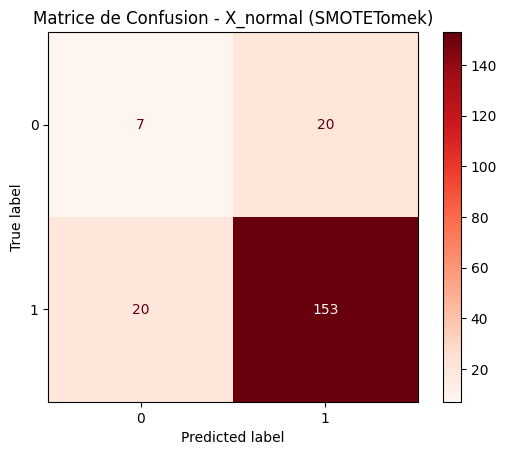


--- Entraînement AdaBoost avec None sur X_rf ---
Aucun rééchantillonnage appliqué.

Rapport de classification :
              precision  recall  f1-score  support
0              0.000000   0.000  0.000000   27.000
1              0.865000   1.000  0.927614  173.000
accuracy       0.865000   0.865  0.865000    0.865
macro avg      0.432500   0.500  0.463807  200.000
weighted avg   0.748225   0.865  0.802386  200.000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


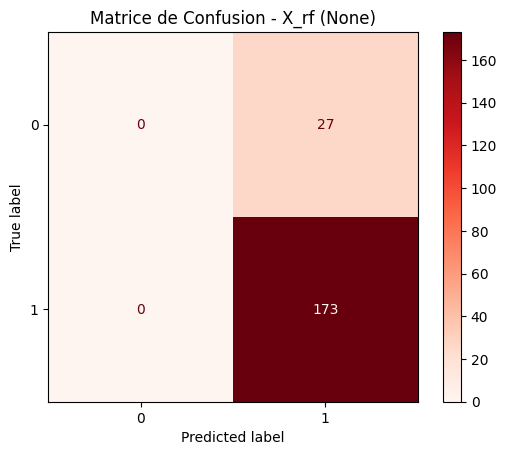


--- Entraînement AdaBoost avec SMOTE sur X_rf ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.245614  0.518519  0.333333    27.00
1              0.909091  0.751445  0.822785   173.00
accuracy       0.720000  0.720000  0.720000     0.72
macro avg      0.577352  0.634982  0.578059   200.00
weighted avg   0.819522  0.720000  0.756709   200.00


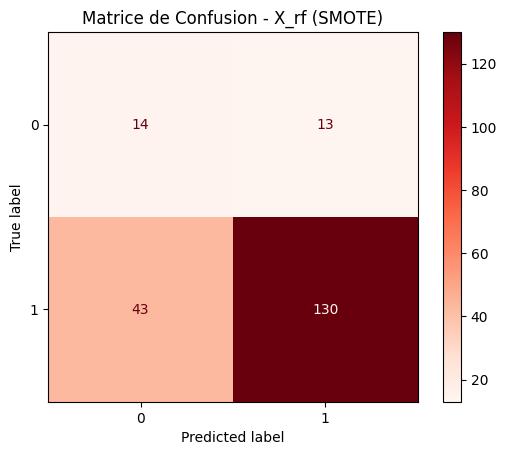


--- Entraînement AdaBoost avec ADASYN sur X_rf ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.301887  0.592593   0.40000    27.00
1              0.925170  0.786127   0.85000   173.00
accuracy       0.760000  0.760000   0.76000     0.76
macro avg      0.613528  0.689360   0.62500   200.00
weighted avg   0.841027  0.760000   0.78925   200.00


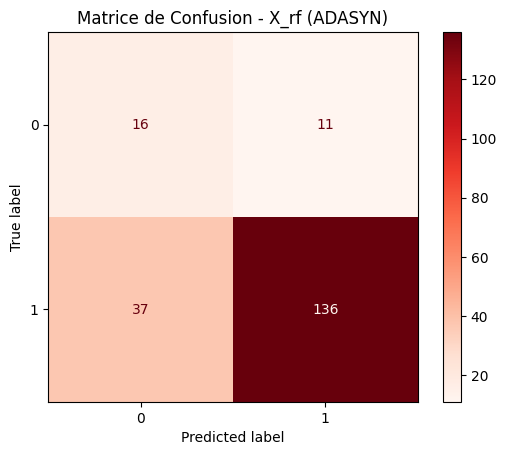


--- Entraînement AdaBoost avec SMOTETomek sur X_rf ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.245614  0.518519  0.333333    27.00
1              0.909091  0.751445  0.822785   173.00
accuracy       0.720000  0.720000  0.720000     0.72
macro avg      0.577352  0.634982  0.578059   200.00
weighted avg   0.819522  0.720000  0.756709   200.00


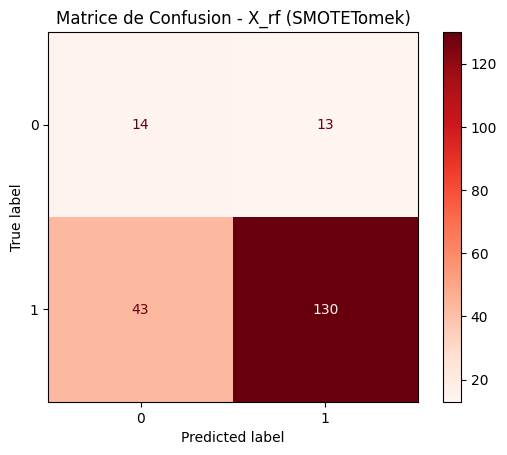


--- Entraînement AdaBoost avec None sur X_pca ---
Aucun rééchantillonnage appliqué.

Rapport de classification :
              precision   recall  f1-score  support
0              0.000000  0.00000  0.000000    27.00
1              0.864322  0.99422  0.924731   173.00
accuracy       0.860000  0.86000  0.860000     0.86
macro avg      0.432161  0.49711  0.462366   200.00
weighted avg   0.747638  0.86000  0.799892   200.00


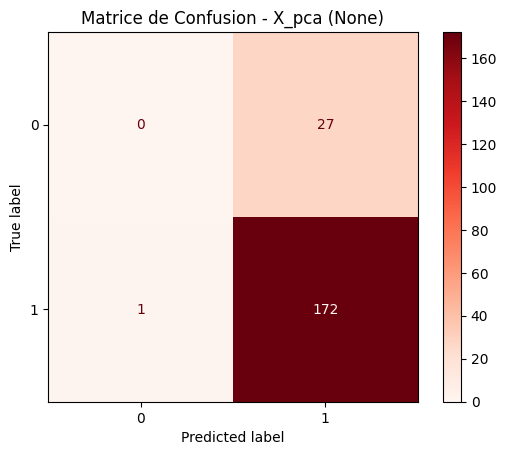


--- Entraînement AdaBoost avec SMOTE sur X_pca ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.274510  0.518519  0.358974    27.00
1              0.912752  0.786127  0.844720   173.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.593631  0.652323  0.601847   200.00
weighted avg   0.826589  0.750000  0.779145   200.00


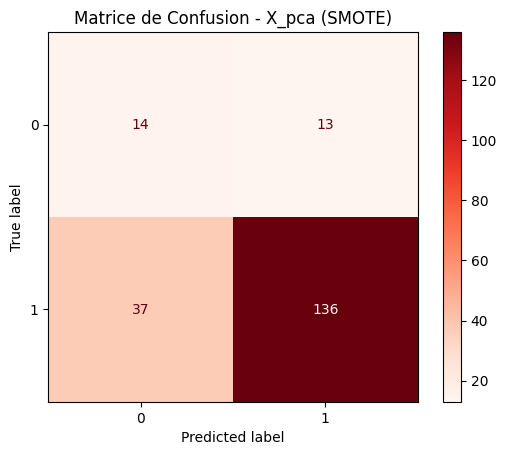


--- Entraînement AdaBoost avec ADASYN sur X_pca ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.266667  0.592593  0.367816   27.000
1              0.921429  0.745665  0.824281  173.000
accuracy       0.725000  0.725000  0.725000    0.725
macro avg      0.594048  0.669129  0.596049  200.000
weighted avg   0.833036  0.725000  0.762658  200.000


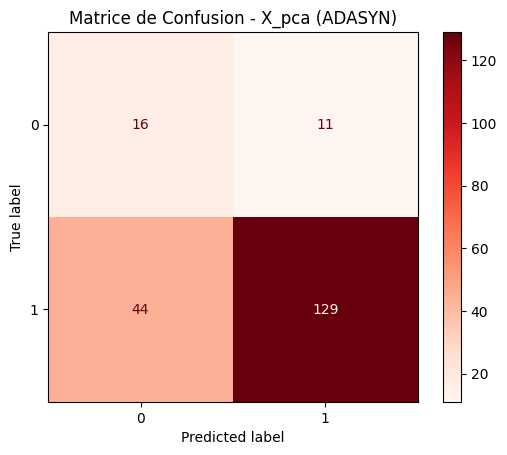


--- Entraînement AdaBoost avec SMOTETomek sur X_pca ---

Rapport de classification :
              precision    recall  f1-score  support
0              0.274510  0.518519  0.358974    27.00
1              0.912752  0.786127  0.844720   173.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.593631  0.652323  0.601847   200.00
weighted avg   0.826589  0.750000  0.779145   200.00


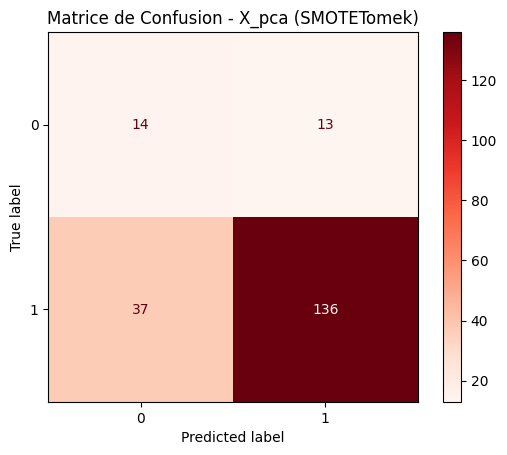

In [ ]:
# Assurez-vous que vos jeux de données splités et standardisés sont disponibles :
# Xn_train, yn_train, Xn_test, yn_test  (Normal)
# Xrf_train, yrf_train, Xrf_test, yrf_test (RF Features)
# Xpca_train, ypca_train, ypca_test, ypca_test (PCA Components)

# Dictionnaire des jeux de données et leurs splits correspondants
datasets = {
    "X_normal": (Xn_train, yn_train, Xn_test, yn_test),
    "X_rf": (Xrf_train, yrf_train, Xrf_test, yrf_test),
    "X_pca": (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Liste des méthodes de rééchantillonnage à tester, incluant 'None'
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Liste pour stocker tous les dictionnaires de métriques
all_adaboost_metrics = []

# Boucle à travers les datasets et les méthodes de rééchantillonnage
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for method_name in resampling_methods:
        # Appelle la fonction modifiée qui retourne les métriques
        metrics = balance_and_train_adaboost_and_collect_metrics(
            X_train, y_train, X_test, y_test, method_name, dataset_name
        )
        # Ajoute le dictionnaire de métriques à la liste
        all_adaboost_metrics.append(metrics)

# Créer un DataFrame Pandas à partir de la liste de métriques
adaboost_comparison_df = pd.DataFrame(all_adaboost_metrics)


##### adaboost_comparison_df

In [ ]:
# Afficher le tableau comparatif des métriques
print("\nTableau de comparaison des métriques pour AdaBoost (avec et sans rééchantillonnage) :")
# Utilise display pour un meilleur affichage dans Google Colab
adaboost_comparison_df


Tableau de comparaison des métriques pour AdaBoost (avec et sans rééchantillonnage) :


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0   AdaBoost  X_normal              None     0.860             0.000000   
1   AdaBoost  X_normal             SMOTE     0.820             0.263158   
2   AdaBoost  X_normal            ADASYN     0.815             0.222222   
3   AdaBoost  X_normal        SMOTETomek     0.800             0.259259   
4   AdaBoost      X_rf              None     0.865             0.000000   
5   AdaBoost      X_rf             SMOTE     0.720             0.245614   
6   AdaBoost      X_rf            ADASYN     0.760             0.301887   
7   AdaBoost      X_rf        SMOTETomek     0.720             0.245614   
8   AdaBoost     X_pca              None     0.860             0.000000   
9   AdaBoost     X_pca             SMOTE     0.750             0.274510   
10  AdaBoost     X_pca            ADASYN     0.725             0.266667   
11  AdaBoost     X_pca        SMOTETomek     0.750             0.274510   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.000000            0.000000             0.864322   
1           0.185185            0.217391             0.878453   
2           0.148148            0.177778             0.873626   
3           0.259259            0.259259             0.884393   
4           0.000000            0.000000             0.865000   
5           0.518519            0.333333             0.909091   
6           0.592593            0.400000             0.925170   
7           0.518519            0.333333             0.909091   
8           0.000000            0.000000             0.864322   
9           0.518519            0.358974             0.912752   
10          0.592593            0.367816             0.921429   
11          0.518519            0.358974             0.912752   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.994220            0.924731             0.432161   
1           0.919075            0.898305             0.570805   
2           0.919075            0.895775             0.547924   
3           0.884393            0.884393             0.571826   
4           1.000000            0.927614             0.432500   
5           0.751445            0.822785             0.577352   
6           0.786127            0.850000             0.613528   
7           0.751445            0.822785             0.577352   
8           0.994220            0.924731             0.432161   
9           0.786127            0.844720             0.593631   
10          0.745665            0.824281             0.594048   
11          0.786127            0.844720             0.593631   

    Macro Avg Recall  Macro Avg F1-score  
0           0.497110            0.462366  
1           0.552130            0.557848  
2           0.533612            0.536776  
3           0.571826            0.571826  
4           0.500000            0.463807  
5           0.634982            0.578059  
6           0.689360            0.625000  
7           0.634982            0.578059  
8           0.497110            0.462366  
9           0.652323            0.601847  
10          0.669129            0.596049  
11          0.652323            0.601847

##### Visualisation ADABoost

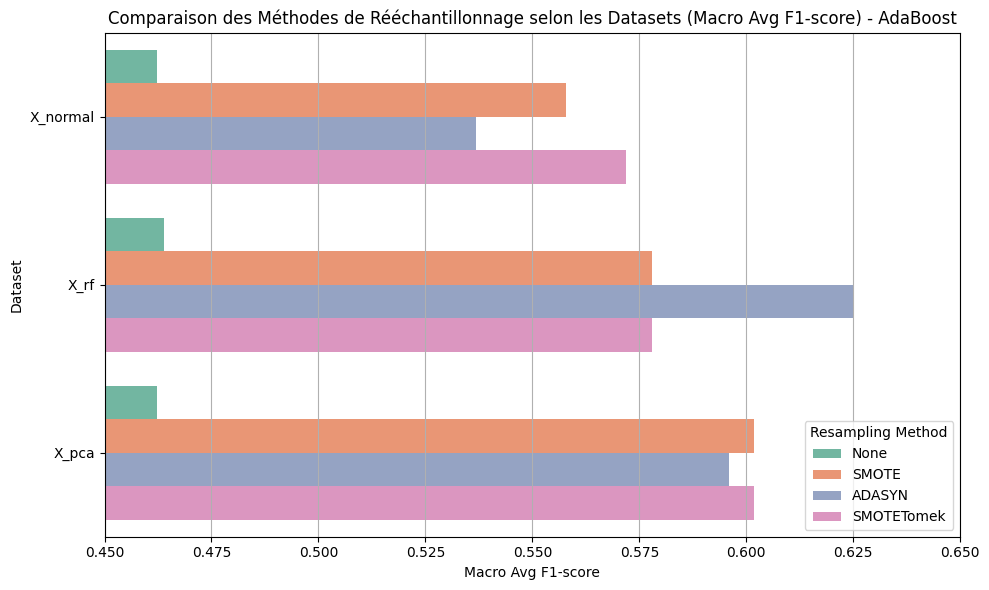

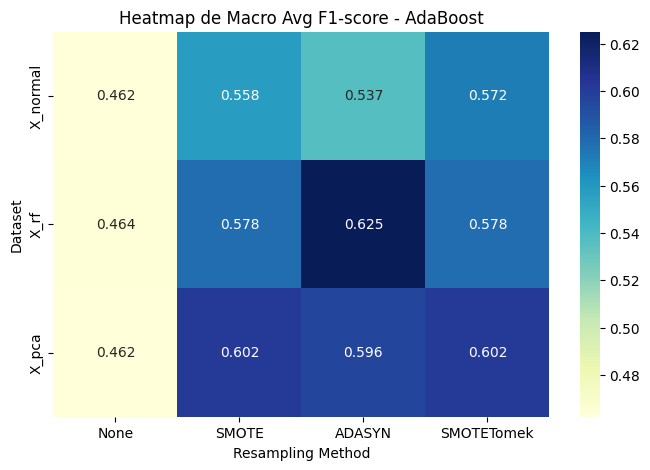

In [ ]:
plot_barplot(adaboost_comparison_df, "AdaBoost", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(adaboost_comparison_df, "AdaBoost", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(adaboost_comparison_df, "AdaBoost")

Model Dataset Resampling Method  Accuracy  Precision (Class 0)  \
6   AdaBoost    X_rf            ADASYN     0.760             0.301887   
9   AdaBoost   X_pca             SMOTE     0.750             0.274510   
11  AdaBoost   X_pca        SMOTETomek     0.750             0.274510   
10  AdaBoost   X_pca            ADASYN     0.725             0.266667   
5   AdaBoost    X_rf             SMOTE     0.720             0.245614   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
6           0.592593            0.400000             0.925170   
9           0.518519            0.358974             0.912752   
11          0.518519            0.358974             0.912752   
10          0.592593            0.367816             0.921429   
5           0.518519            0.333333             0.909091   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
6           0.786127            0.850000             0.613528   
9           0.786127            0.844720             0.593631   
11          0.786127            0.844720             0.593631   
10          0.745665            0.824281             0.594048   
5           0.751445            0.822785             0.577352   

    Macro Avg Recall  Macro Avg F1-score  
6           0.689360            0.625000  
9           0.652323            0.601847  
11          0.652323            0.601847  
10          0.669129            0.596049  
5           0.634982            0.578059

###XGBOOST

####GridSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def gridsearch_xgboost(X_train, y_train):
    """
    Fonction qui effectue un GridSearchCV sur un modèle XGBoost.

    Paramètres :
    - X_train : données d'entraînement (features)
    - y_train : labels d'entraînement

    Retour :
    - grid.best_estimator_ : le modèle XGBoost entraîné avec les meilleurs paramètres
    - grid.best_params_ : dictionnaire des meilleurs hyperparamètres trouvés
    - grid.best_score_ : meilleur score obtenu (par défaut scoring f1_macro)
    """
    # Définir le modèle de base
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Définir la grille d'hyperparamètres à tester
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }

    # Initialiser GridSearchCV
    grid = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    # Lancer la recherche sur les données d'entraînement
    grid.fit(X_train, y_train)

    print(f"Meilleurs paramètres : {grid.best_params_}")
    print(f"Meilleur score (f1_macro) : {grid.best_score_:.4f}")

    return grid.best_estimator_, grid.best_params_, grid.best_score_


In [ ]:
# best_model, best_params, best_score = gridsearch_xgboost(X_train, y_train)

# #Resultat :
# # Fitting 5 folds for each of 108 candidates, totalling 540 fits
# # Meilleurs paramètres : {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
# # Meilleur score (f1_macro) : 0.5026
# # /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:23:33] WARNING: /workspace/src/learner.cc:740:
# # Parameters: { "use_label_encoder" } are not used.

# #   warnings.warn(smsg, UserWarning)

####train_XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

# Best parameters found from your grid search
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.8
}

def train_XGBoost(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n--- Entraînement XGBoost avec {method_name} - {dataset_name} ---")

    # Choix du resampler
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None':
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Rééchantillonnage
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    model = XGBClassifier(
      colsample_bytree=best_params['colsample_bytree'],
      learning_rate=best_params['learning_rate'],
      max_depth=best_params['max_depth'],
      n_estimators=best_params['n_estimators'],
      subsample=best_params['subsample'],
      use_label_encoder=False, # Keep this as per your code
      eval_metric='logloss', # Keep this as per your code
      random_state=42 # Keep this for reproducibility
     )
    model.fit(X_resampled, y_resampled)

    # Prédiction sur le test set
    y_pred = model.predict(X_test)

    # Évaluation
    print(f"\n--- Évaluation XGBoost avec {method_name} sur {dataset_name} ---")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)
    print(classification_report(y_test, y_pred, digits=4))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Oranges')
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    # Dictionnaire des métriques
    metrics = {
        'Model': 'XGBoost',
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    return metrics



--- Entraînement XGBoost avec None - X_normal ---

--- Évaluation XGBoost avec None sur X_normal ---
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8643    0.9942    0.9247       173

    accuracy                         0.8600       200
   macro avg     0.4322    0.4971    0.4624       200
weighted avg     0.7476    0.8600    0.7999       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


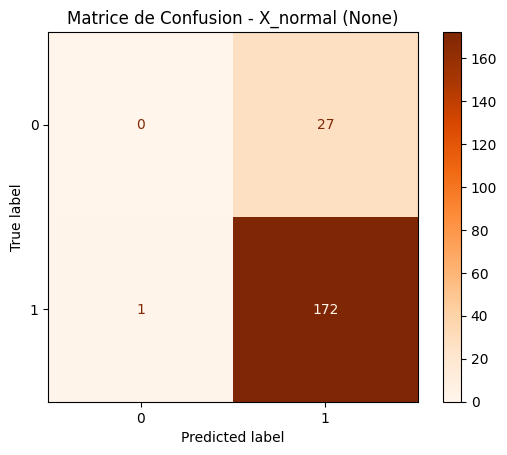


--- Entraînement XGBoost avec SMOTE - X_normal ---

--- Évaluation XGBoost avec SMOTE sur X_normal ---
              precision    recall  f1-score   support

           0     0.3077    0.1481    0.2000        27
           1     0.8770    0.9480    0.9111       173

    accuracy                         0.8400       200
   macro avg     0.5923    0.5481    0.5556       200
weighted avg     0.8001    0.8400    0.8151       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


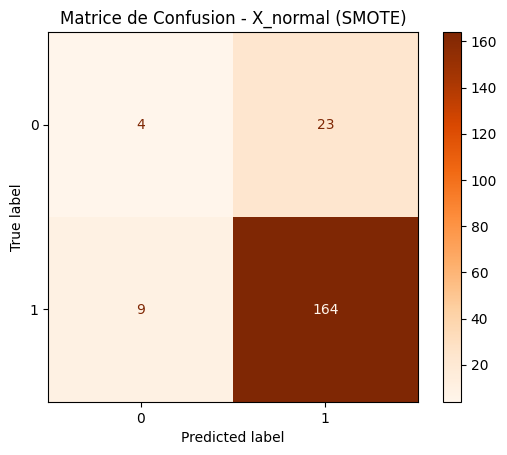


--- Entraînement XGBoost avec ADASYN - X_normal ---

--- Évaluation XGBoost avec ADASYN sur X_normal ---
              precision    recall  f1-score   support

           0     0.3077    0.1481    0.2000        27
           1     0.8770    0.9480    0.9111       173

    accuracy                         0.8400       200
   macro avg     0.5923    0.5481    0.5556       200
weighted avg     0.8001    0.8400    0.8151       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


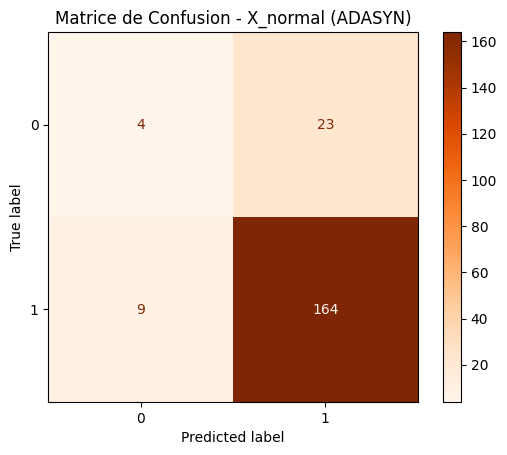


--- Entraînement XGBoost avec SMOTETomek - X_normal ---

--- Évaluation XGBoost avec SMOTETomek sur X_normal ---
              precision    recall  f1-score   support

           0     0.2857    0.1481    0.1951        27
           1     0.8763    0.9422    0.9081       173

    accuracy                         0.8350       200
   macro avg     0.5810    0.5452    0.5516       200
weighted avg     0.7966    0.8350    0.8118       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


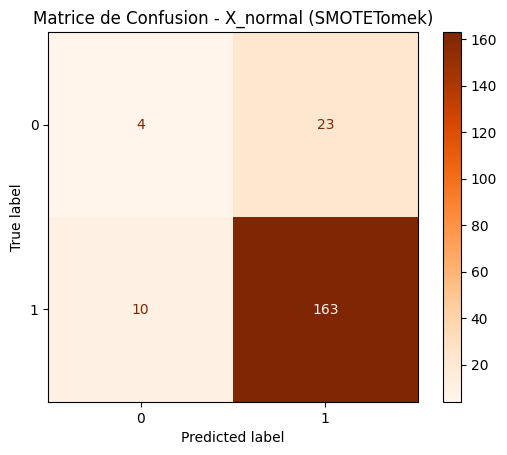


--- Entraînement XGBoost avec None - X_rf ---

--- Évaluation XGBoost avec None sur X_rf ---
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

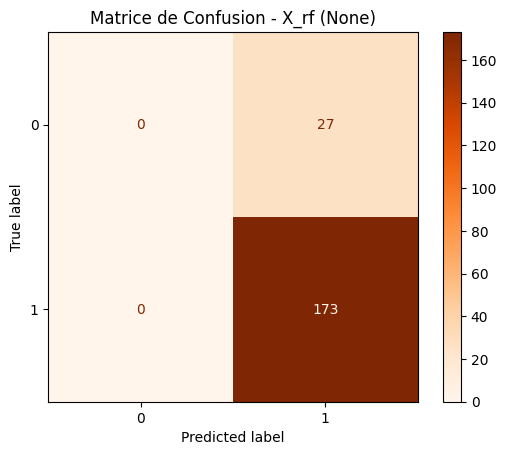


--- Entraînement XGBoost avec SMOTE - X_rf ---

--- Évaluation XGBoost avec SMOTE sur X_rf ---
              precision    recall  f1-score   support

           0     0.2264    0.4444    0.3000        27
           1     0.8980    0.7630    0.8250       173

    accuracy                         0.7200       200
   macro avg     0.5622    0.6037    0.5625       200
weighted avg     0.8073    0.7200    0.7541       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


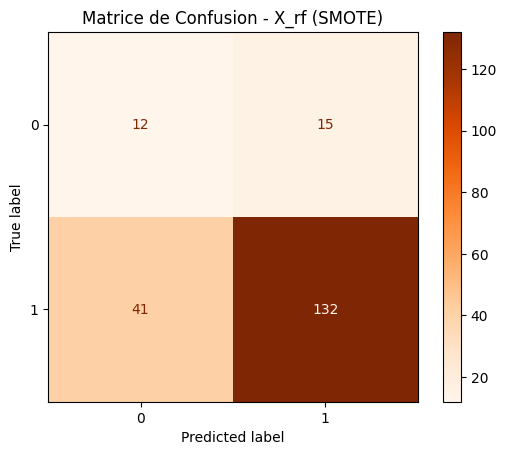


--- Entraînement XGBoost avec ADASYN - X_rf ---

--- Évaluation XGBoost avec ADASYN sur X_rf ---
              precision    recall  f1-score   support

           0     0.2364    0.4815    0.3171        27
           1     0.9034    0.7572    0.8239       173

    accuracy                         0.7200       200
   macro avg     0.5699    0.6194    0.5705       200
weighted avg     0.8134    0.7200    0.7555       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


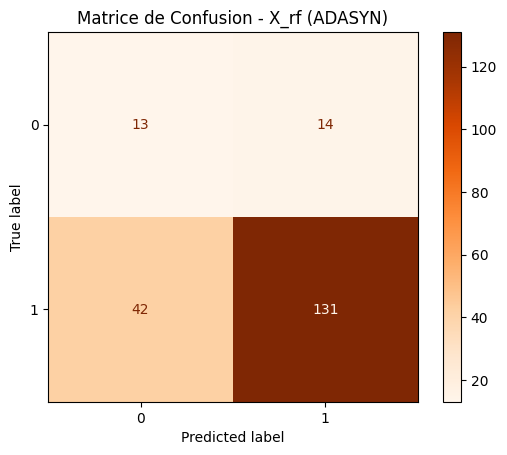


--- Entraînement XGBoost avec SMOTETomek - X_rf ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Évaluation XGBoost avec SMOTETomek sur X_rf ---
              precision    recall  f1-score   support

           0     0.2264    0.4444    0.3000        27
           1     0.8980    0.7630    0.8250       173

    accuracy                         0.7200       200
   macro avg     0.5622    0.6037    0.5625       200
weighted avg     0.8073    0.7200    0.7541       200



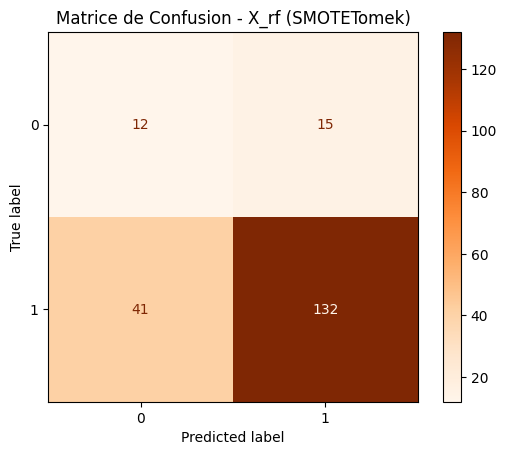


--- Entraînement XGBoost avec None - X_pca ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Évaluation XGBoost avec None sur X_pca ---
              precision    recall  f1-score   support

           0     0.4000    0.0741    0.1250        27
           1     0.8718    0.9827    0.9239       173

    accuracy                         0.8600       200
   macro avg     0.6359    0.5284    0.5245       200
weighted avg     0.8081    0.8600    0.8161       200



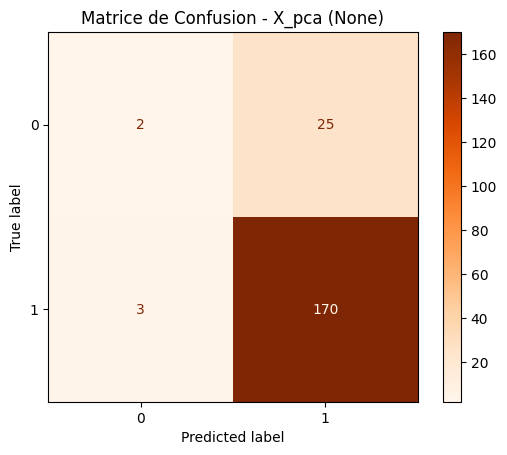


--- Entraînement XGBoost avec SMOTE - X_pca ---

--- Évaluation XGBoost avec SMOTE sur X_pca ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0     0.3030    0.3704    0.3333        27
           1     0.8982    0.8671    0.8824       173

    accuracy                         0.8000       200
   macro avg     0.6006    0.6187    0.6078       200
weighted avg     0.8179    0.8000    0.8082       200



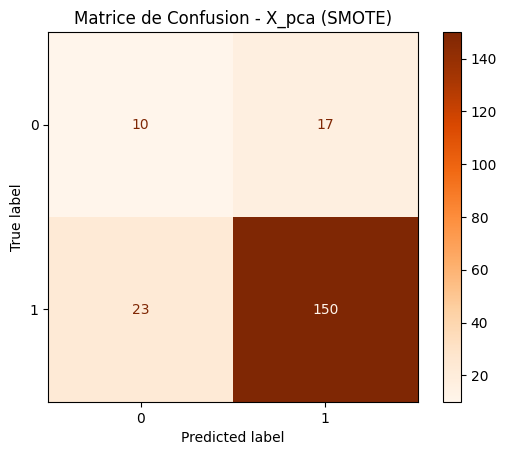


--- Entraînement XGBoost avec ADASYN - X_pca ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Évaluation XGBoost avec ADASYN sur X_pca ---
              precision    recall  f1-score   support

           0     0.3214    0.3333    0.3273        27
           1     0.8953    0.8902    0.8928       173

    accuracy                         0.8150       200
   macro avg     0.6084    0.6118    0.6100       200
weighted avg     0.8179    0.8150    0.8164       200



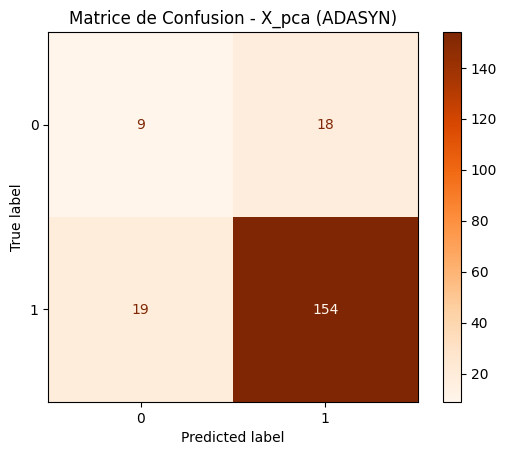


--- Entraînement XGBoost avec SMOTETomek - X_pca ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:01:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Évaluation XGBoost avec SMOTETomek sur X_pca ---
              precision    recall  f1-score   support

           0     0.2414    0.2593    0.2500        27
           1     0.8830    0.8728    0.8779       173

    accuracy                         0.7900       200
   macro avg     0.5622    0.5660    0.5640       200
weighted avg     0.7964    0.7900    0.7931       200



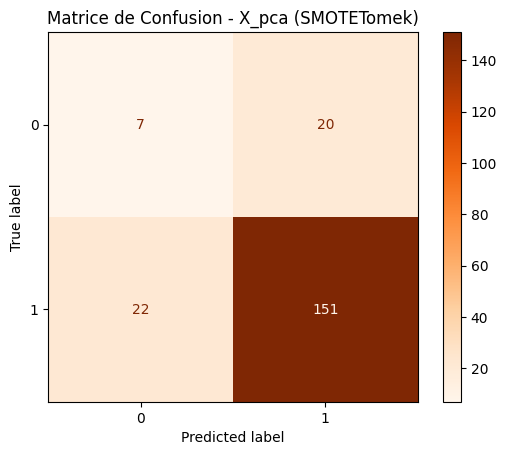

In [ ]:
# Liste pour stocker les métriques XGBoost
all_xgb_metrics = []

# Liste des datasets et de leurs splits
datasets = {
    "X_normal": (Xn_train, yn_train, Xn_test, yn_test),
    "X_rf": (Xrf_train, yrf_train, Xrf_test, yrf_test),
    "X_pca": (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Méthodes de rééchantillonnage
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Entraînement sur chaque configuration
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for method_name in resampling_methods:
        metrics = train_XGBoost(X_train, y_train, X_test, y_test, method_name, dataset_name)
        all_xgb_metrics.append(metrics)

# Convertir en DataFrame pour analyse
xgb_comparison_df = pd.DataFrame(all_xgb_metrics)


##### xgb_comparison_df

In [ ]:
xgb_comparison_df

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0   XGBoost  X_normal              None     0.860             0.000000   
1   XGBoost  X_normal             SMOTE     0.840             0.307692   
2   XGBoost  X_normal            ADASYN     0.840             0.307692   
3   XGBoost  X_normal        SMOTETomek     0.835             0.285714   
4   XGBoost      X_rf              None     0.865             0.000000   
5   XGBoost      X_rf             SMOTE     0.720             0.226415   
6   XGBoost      X_rf            ADASYN     0.720             0.236364   
7   XGBoost      X_rf        SMOTETomek     0.720             0.226415   
8   XGBoost     X_pca              None     0.860             0.400000   
9   XGBoost     X_pca             SMOTE     0.800             0.303030   
10  XGBoost     X_pca            ADASYN     0.815             0.321429   
11  XGBoost     X_pca        SMOTETomek     0.790             0.241379   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.000000            0.000000             0.864322   
1           0.148148            0.200000             0.877005   
2           0.148148            0.200000             0.877005   
3           0.148148            0.195122             0.876344   
4           0.000000            0.000000             0.865000   
5           0.444444            0.300000             0.897959   
6           0.481481            0.317073             0.903448   
7           0.444444            0.300000             0.897959   
8           0.074074            0.125000             0.871795   
9           0.370370            0.333333             0.898204   
10          0.333333            0.327273             0.895349   
11          0.259259            0.250000             0.883041   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           0.994220            0.924731             0.432161   
1           0.947977            0.911111             0.592349   
2           0.947977            0.911111             0.592349   
3           0.942197            0.908078             0.581029   
4           1.000000            0.927614             0.432500   
5           0.763006            0.825000             0.562187   
6           0.757225            0.823899             0.569906   
7           0.763006            0.825000             0.562187   
8           0.982659            0.923913             0.635897   
9           0.867052            0.882353             0.600617   
10          0.890173            0.892754             0.608389   
11          0.872832            0.877907             0.562210   

    Macro Avg Recall  Macro Avg F1-score  
0           0.497110            0.462366  
1           0.548063            0.555556  
2           0.548063            0.555556  
3           0.545172            0.551600  
4           0.500000            0.463807  
5           0.603725            0.562500  
6           0.619353            0.570486  
7           0.603725            0.562500  
8           0.528367            0.524457  
9           0.618711            0.607843  
10          0.611753            0.610013  
11          0.566046            0.563953

##### Visualisation XGBOOST

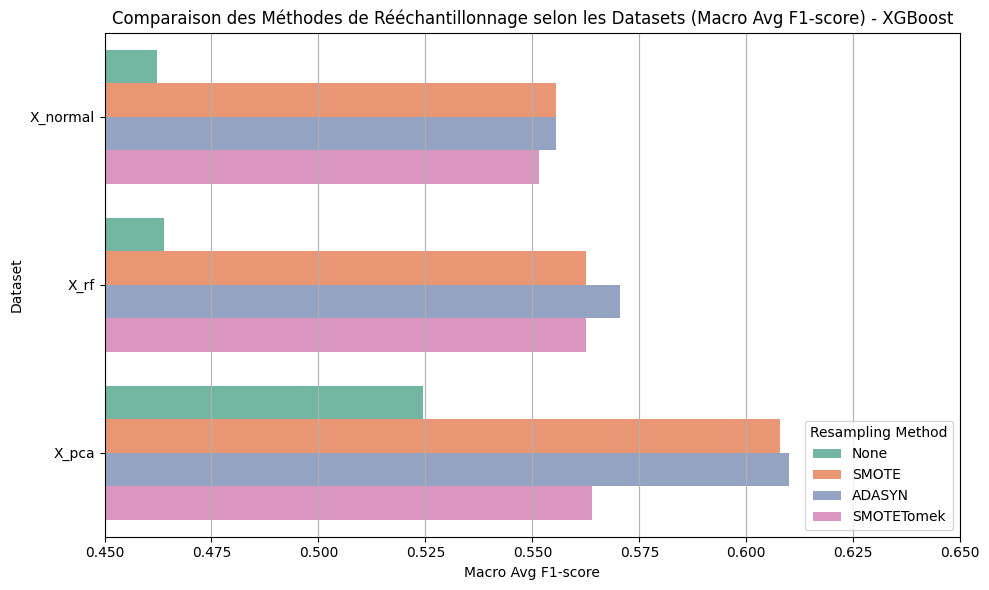

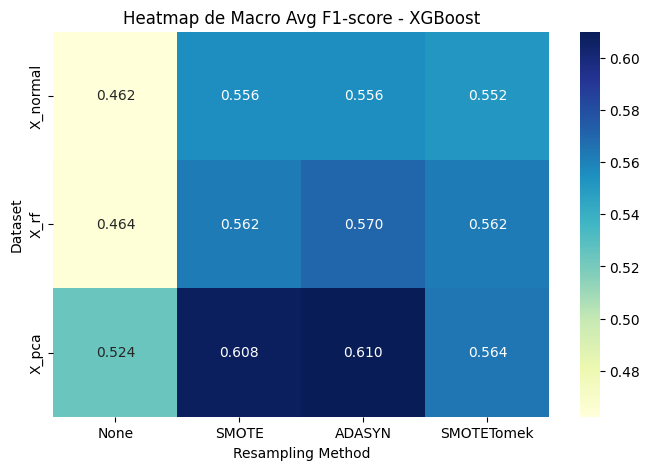

In [ ]:
plot_barplot(xgb_comparison_df, "XGBoost", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(xgb_comparison_df, "XGBoost", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(xgb_comparison_df, "XGBoost")

Model Dataset Resampling Method  Accuracy  Precision (Class 0)  \
10  XGBoost   X_pca            ADASYN     0.815             0.321429   
9   XGBoost   X_pca             SMOTE     0.800             0.303030   
6   XGBoost    X_rf            ADASYN     0.720             0.236364   
11  XGBoost   X_pca        SMOTETomek     0.790             0.241379   
5   XGBoost    X_rf             SMOTE     0.720             0.226415   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
10          0.333333            0.327273             0.895349   
9           0.370370            0.333333             0.898204   
6           0.481481            0.317073             0.903448   
11          0.259259            0.250000             0.883041   
5           0.444444            0.300000             0.897959   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
10          0.890173            0.892754             0.608389   
9           0.867052            0.882353             0.600617   
6           0.757225            0.823899             0.569906   
11          0.872832            0.877907             0.562210   
5           0.763006            0.825000             0.562187   

    Macro Avg Recall  Macro Avg F1-score  
10          0.611753            0.610013  
9           0.618711            0.607843  
6           0.619353            0.570486  
11          0.566046            0.563953  
5           0.603725            0.562500

###ANN (MLP)

####GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

def find_best_ann_params(X_train, y_train, method_name='None'):
    print(f"\nRecherche des meilleurs hyperparamètres ANN avec {method_name}")

    # Choix du resampling
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None':
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Pipeline avec (optionnellement) un sampler
    steps = []
    if sampler:
        steps.append(('sampling', sampler))
    steps.append(('scaler', StandardScaler()))
    steps.append(('mlp', MLPClassifier(max_iter=500, random_state=42)))
    pipeline = ImbPipeline(steps=steps)

    # Grille des hyperparamètres à tester
    param_grid = {
        'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'mlp__activation': ['relu', 'tanh'],
        'mlp__solver': ['adam', 'sgd'],
        'mlp__alpha': [0.0001, 0.001],
        'mlp__learning_rate': ['constant', 'adaptive']
    }

    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='f1_macro',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    # Entraînement
    grid_search.fit(X_train, y_train)

    print("Meilleurs paramètres trouvés :")
    print(grid_search.best_params_)
    print(f"Meilleure macro F1-score (cv) : {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_, grid_search.best_params_


In [ ]:
# # Exemple sur Xn_train, yn_train avec SMOTE
# best_model, best_params = find_best_ann_params(Xn_train, yn_train, method_name='SMOTE')


# #Resultat :

# # Recherche des meilleurs hyperparamètres ANN avec SMOTE
# # Fitting 5 folds for each of 48 candidates, totalling 240 fits
# # Meilleurs paramètres trouvés :
# # {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'sgd'}
# # Meilleure macro F1-score (cv) : 0.5544
# # /usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
# #   warnings.warn(

####train_ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

# Best parameters found from your grid search
best_params = {
    'mlp__activation': 'relu',
    'mlp__alpha': 0.0001,
    'mlp__hidden_layer_sizes': (100,),
    'mlp__learning_rate': 'constant',
    'mlp__solver': 'sgd'
}

# Fonction d'entraînement et d'évaluation du MLP
def train_ANN(X_train, y_train, X_test, y_test, method_name, dataset_name):
    print(f"\n--- Entraînement ANN avec {method_name} - {dataset_name} ---")

    # Choisir la méthode de resampling
    if method_name == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif method_name == 'ADASYN':
        sampler = ADASYN(random_state=42)
    elif method_name == 'SMOTETomek':
        sampler = SMOTETomek(random_state=42)
    elif method_name == 'None':
        sampler = None
    else:
        raise ValueError("Méthode inconnue : SMOTE, ADASYN, SMOTETomek ou None")

    # Resampling
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    # Normalisation (obligatoire pour MLP)
    scaler = StandardScaler()
    X_resampled = scaler.fit_transform(X_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Entraîner le modèle ANN (MLPClassifier)
    model = MLPClassifier(
      activation=best_params['mlp__activation'],
      alpha=best_params['mlp__alpha'],
      hidden_layer_sizes=best_params['mlp__hidden_layer_sizes'],
      learning_rate=best_params['mlp__learning_rate'],
      solver=best_params['mlp__solver'],
      max_iter=500,  # You can keep or adjust this as needed
      random_state=42 # Keep this for reproducibility
      )
    model.fit(X_resampled, y_resampled)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Évaluation
    print(f"\n--- Évaluation ANN avec {method_name} sur {dataset_name} ---")
    report = classification_report(y_test, y_pred, output_dict=True, digits=4)
    print(classification_report(y_test, y_pred, digits=4))

    # Dictionnaire des métriques
    metrics = {
        'Model': 'ANN',
        'Dataset': dataset_name,
        'Resampling Method': method_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report.get('0', {}).get('precision', 0.0),
        'Recall (Class 0)': report.get('0', {}).get('recall', 0.0),
        'F1-score (Class 0)': report.get('0', {}).get('f1-score', 0.0),
        'Precision (Class 1)': report.get('1', {}).get('precision', 0.0),
        'Recall (Class 1)': report.get('1', {}).get('recall', 0.0),
        'F1-score (Class 1)': report.get('1', {}).get('f1-score', 0.0),
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-score': report['macro avg']['f1-score']
    }

    # Afficher la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matrice de Confusion - {dataset_name} ({method_name})")
    plt.grid(False)
    plt.show()

    return metrics



--- Entraînement ANN avec None - X_normal ---

--- Évaluation ANN avec None sur X_normal ---
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

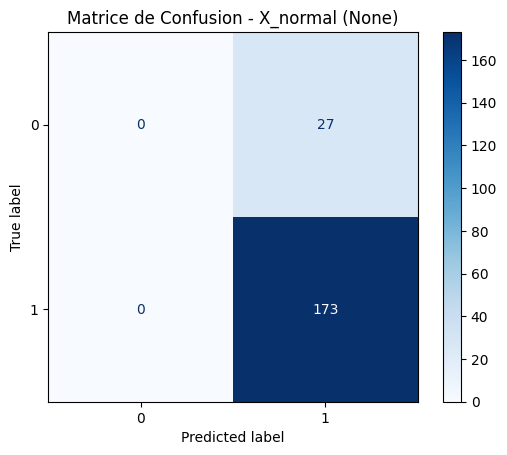


--- Entraînement ANN avec SMOTE - X_normal ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Évaluation ANN avec SMOTE sur X_normal ---
              precision    recall  f1-score   support

           0     0.2698    0.6296    0.3778        27
           1     0.9270    0.7341    0.8194       173

    accuracy                         0.7200       200
   macro avg     0.5984    0.6819    0.5986       200
weighted avg     0.8383    0.7200    0.7597       200



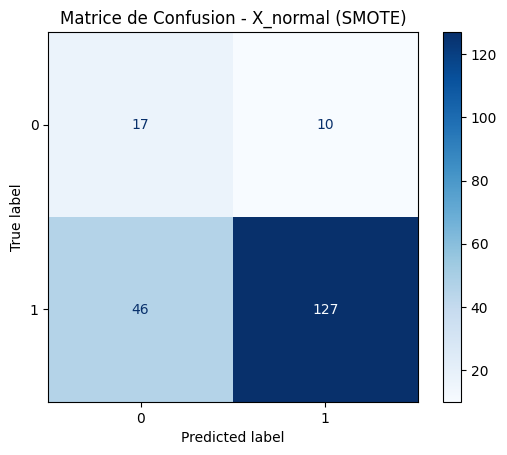


--- Entraînement ANN avec ADASYN - X_normal ---

--- Évaluation ANN avec ADASYN sur X_normal ---
              precision    recall  f1-score   support

           0     0.2615    0.6296    0.3696        27
           1     0.9259    0.7225    0.8117       173

    accuracy                         0.7100       200
   macro avg     0.5937    0.6761    0.5906       200
weighted avg     0.8362    0.7100    0.7520       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


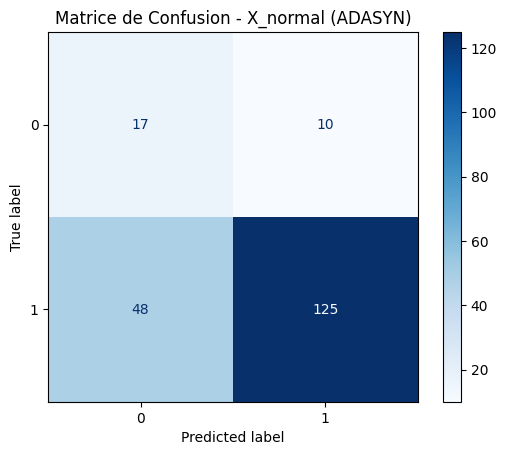


--- Entraînement ANN avec SMOTETomek - X_normal ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Évaluation ANN avec SMOTETomek sur X_normal ---
              precision    recall  f1-score   support

           0     0.2698    0.6296    0.3778        27
           1     0.9270    0.7341    0.8194       173

    accuracy                         0.7200       200
   macro avg     0.5984    0.6819    0.5986       200
weighted avg     0.8383    0.7200    0.7597       200



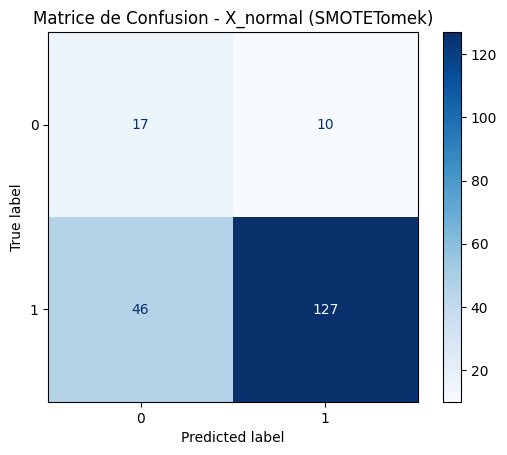


--- Entraînement ANN avec None - X_rf ---

--- Évaluation ANN avec None sur X_rf ---
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

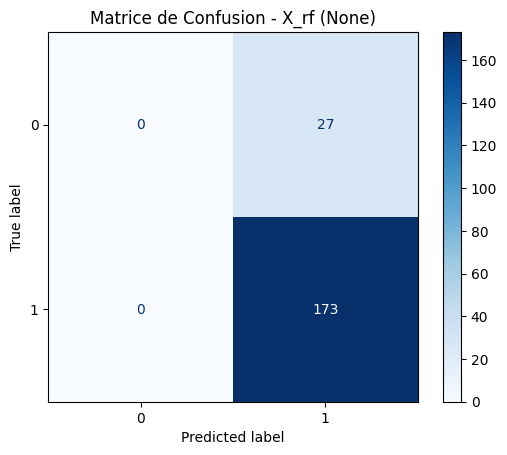


--- Entraînement ANN avec SMOTE - X_rf ---

--- Évaluation ANN avec SMOTE sur X_rf ---
              precision    recall  f1-score   support

           0     0.2278    0.6667    0.3396        27
           1     0.9256    0.6474    0.7619       173

    accuracy                         0.6500       200
   macro avg     0.5767    0.6570    0.5508       200
weighted avg     0.8314    0.6500    0.7049       200



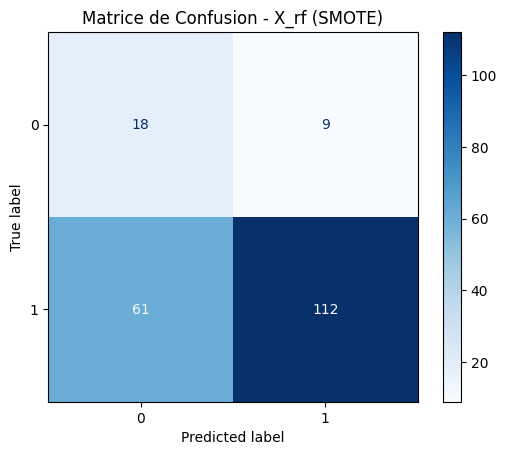


--- Entraînement ANN avec ADASYN - X_rf ---

--- Évaluation ANN avec ADASYN sur X_rf ---
              precision    recall  f1-score   support

           0     0.2195    0.6667    0.3303        27
           1     0.9237    0.6301    0.7491       173

    accuracy                         0.6350       200
   macro avg     0.5716    0.6484    0.5397       200
weighted avg     0.8287    0.6350    0.6926       200



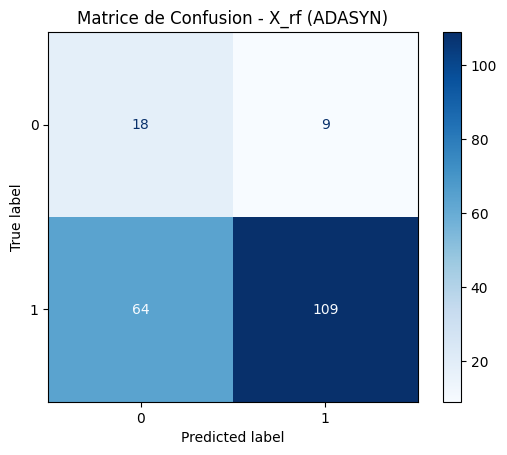


--- Entraînement ANN avec SMOTETomek - X_rf ---

--- Évaluation ANN avec SMOTETomek sur X_rf ---
              precision    recall  f1-score   support

           0     0.2278    0.6667    0.3396        27
           1     0.9256    0.6474    0.7619       173

    accuracy                         0.6500       200
   macro avg     0.5767    0.6570    0.5508       200
weighted avg     0.8314    0.6500    0.7049       200



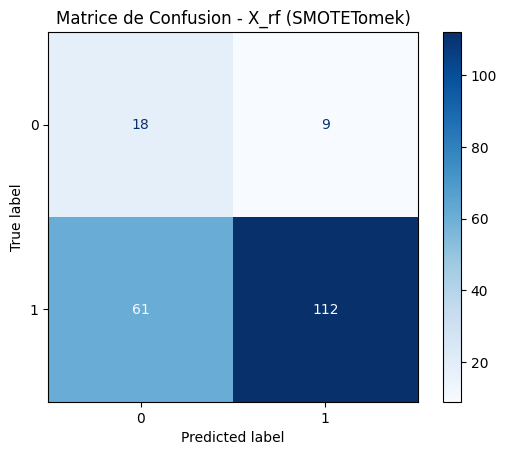


--- Entraînement ANN avec None - X_pca ---

--- Évaluation ANN avec None sur X_pca ---
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        27
           1     0.8650    1.0000    0.9276       173

    accuracy                         0.8650       200
   macro avg     0.4325    0.5000    0.4638       200
weighted avg     0.7482    0.8650    0.8024       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

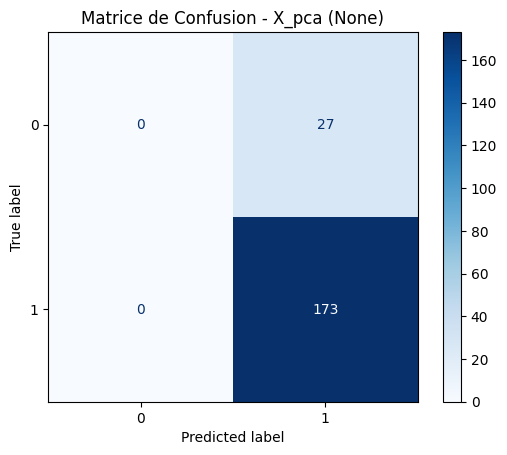


--- Entraînement ANN avec SMOTE - X_pca ---

--- Évaluation ANN avec SMOTE sur X_pca ---
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


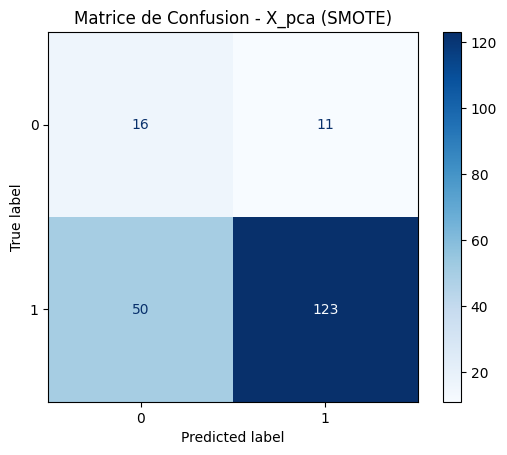


--- Entraînement ANN avec ADASYN - X_pca ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Évaluation ANN avec ADASYN sur X_pca ---
              precision    recall  f1-score   support

           0     0.2353    0.5926    0.3368        27
           1     0.9167    0.6994    0.7934       173

    accuracy                         0.6850       200
   macro avg     0.5760    0.6460    0.5651       200
weighted avg     0.8247    0.6850    0.7318       200



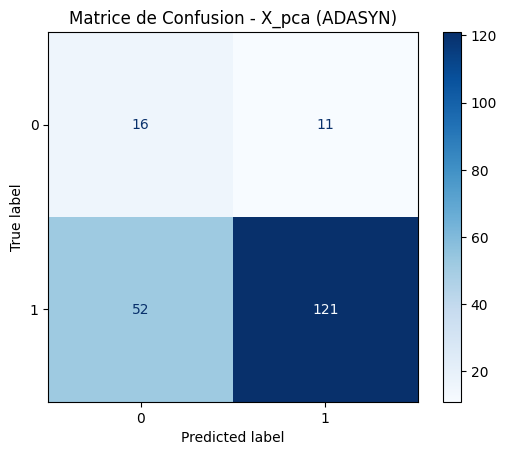


--- Entraînement ANN avec SMOTETomek - X_pca ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Évaluation ANN avec SMOTETomek sur X_pca ---
              precision    recall  f1-score   support

           0     0.2424    0.5926    0.3441        27
           1     0.9179    0.7110    0.8013       173

    accuracy                         0.6950       200
   macro avg     0.5802    0.6518    0.5727       200
weighted avg     0.8267    0.6950    0.7396       200



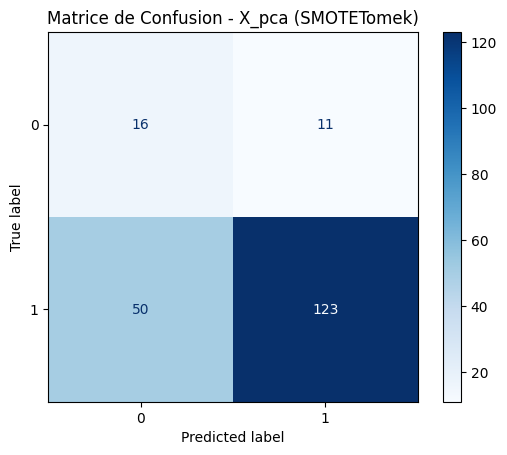

In [ ]:
# Liste des métriques ANN
all_ann_metrics = []

# Vos jeux de données (déjà définis)
datasets = {
    "X_normal": (Xn_train, yn_train, Xn_test, yn_test),
    "X_rf": (Xrf_train, yrf_train, Xrf_test, yrf_test),
    "X_pca": (Xpca_train, ypca_train, Xpca_test, ypca_test)
}

# Méthodes de rééchantillonnage à tester
resampling_methods = ['None', 'SMOTE', 'ADASYN', 'SMOTETomek']

# Boucles
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    for method_name in resampling_methods:
        metrics = train_ANN(X_train, y_train, X_test, y_test, method_name, dataset_name)
        all_ann_metrics.append(metrics)

# Convertir en DataFrame
ann_comparison_df = pd.DataFrame(all_ann_metrics)

# Optionnel : ajouter à une liste globale
# all_overall_metrics.extend(all_ann_metrics)


##### ann_comparison_df

In [ ]:
ann_comparison_df

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0    ANN  X_normal              None     0.865             0.000000   
1    ANN  X_normal             SMOTE     0.720             0.269841   
2    ANN  X_normal            ADASYN     0.710             0.261538   
3    ANN  X_normal        SMOTETomek     0.720             0.269841   
4    ANN      X_rf              None     0.865             0.000000   
5    ANN      X_rf             SMOTE     0.650             0.227848   
6    ANN      X_rf            ADASYN     0.635             0.219512   
7    ANN      X_rf        SMOTETomek     0.650             0.227848   
8    ANN     X_pca              None     0.865             0.000000   
9    ANN     X_pca             SMOTE     0.695             0.242424   
10   ANN     X_pca            ADASYN     0.685             0.235294   
11   ANN     X_pca        SMOTETomek     0.695             0.242424   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0           0.000000            0.000000             0.865000   
1           0.629630            0.377778             0.927007   
2           0.629630            0.369565             0.925926   
3           0.629630            0.377778             0.927007   
4           0.000000            0.000000             0.865000   
5           0.666667            0.339623             0.925620   
6           0.666667            0.330275             0.923729   
7           0.666667            0.339623             0.925620   
8           0.000000            0.000000             0.865000   
9           0.592593            0.344086             0.917910   
10          0.592593            0.336842             0.916667   
11          0.592593            0.344086             0.917910   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0           1.000000            0.927614             0.432500   
1           0.734104            0.819355             0.598424   
2           0.722543            0.811688             0.593732   
3           0.734104            0.819355             0.598424   
4           1.000000            0.927614             0.432500   
5           0.647399            0.761905             0.576734   
6           0.630058            0.749141             0.571621   
7           0.647399            0.761905             0.576734   
8           1.000000            0.927614             0.432500   
9           0.710983            0.801303             0.580167   
10          0.699422            0.793443             0.575980   
11          0.710983            0.801303             0.580167   

    Macro Avg Recall  Macro Avg F1-score  
0           0.500000            0.463807  
1           0.681867            0.598566  
2           0.676086            0.590627  
3           0.681867            0.598566  
4           0.500000            0.463807  
5           0.657033            0.550764  
6           0.648362            0.539708  
7           0.657033            0.550764  
8           0.500000            0.463807  
9           0.651788            0.572694  
10          0.646007            0.565142  
11          0.651788            0.572694

##### Visualisation MLP

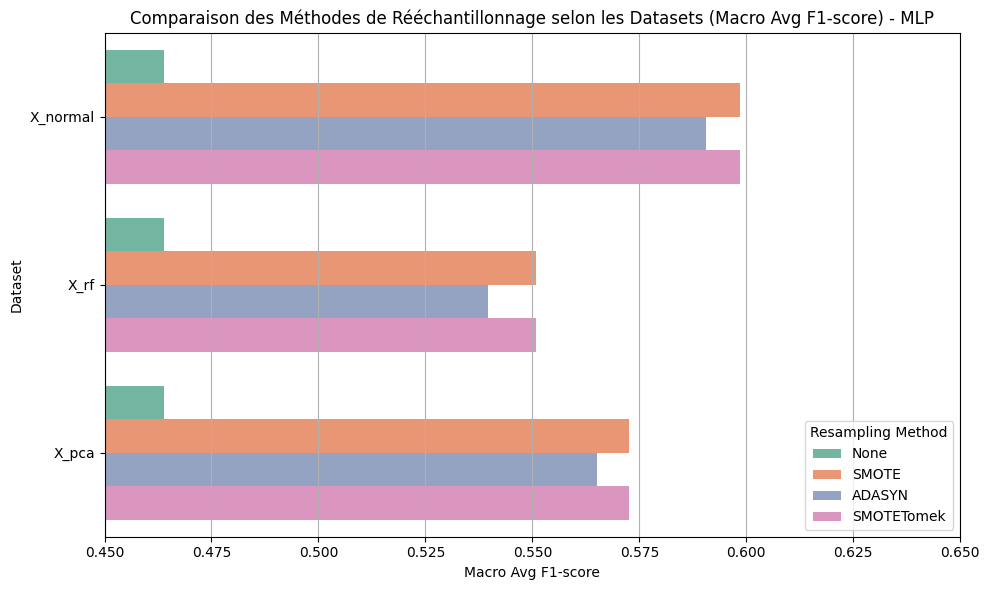

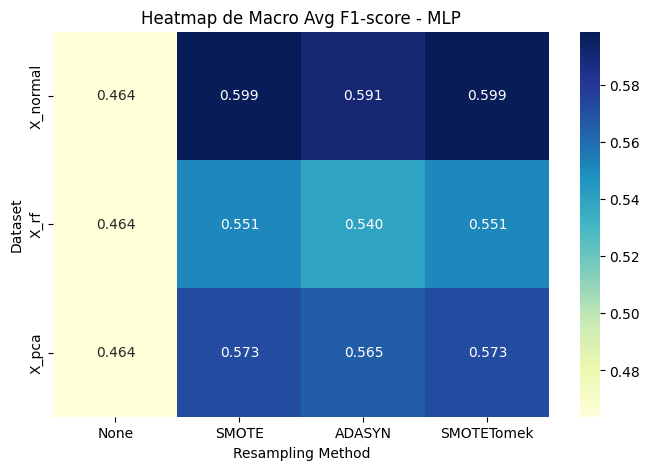

In [ ]:
plot_barplot(ann_comparison_df, "MLP", dataset_order=dataset_order, resampling_order=resampling_order)
plot_heatmap(ann_comparison_df, "MLP", resampling_order=resampling_order, dataset_order=dataset_order)


In [ ]:
print_top5(ann_comparison_df, "MLP")

Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
1    ANN  X_normal             SMOTE     0.720             0.269841   
3    ANN  X_normal        SMOTETomek     0.720             0.269841   
2    ANN  X_normal            ADASYN     0.710             0.261538   
11   ANN     X_pca        SMOTETomek     0.695             0.242424   
9    ANN     X_pca             SMOTE     0.695             0.242424   

    Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
1           0.629630            0.377778             0.927007   
3           0.629630            0.377778             0.927007   
2           0.629630            0.369565             0.925926   
11          0.592593            0.344086             0.917910   
9           0.592593            0.344086             0.917910   

    Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
1           0.734104            0.819355             0.598424   
3           0.734104            0.819355             0.598424   
2           0.722543            0.811688             0.593732   
11          0.710983            0.801303             0.580167   
9           0.710983            0.801303             0.580167   

    Macro Avg Recall  Macro Avg F1-score  
1           0.681867            0.598566  
3           0.681867            0.598566  
2           0.676086            0.590627  
11          0.651788            0.572694  
9           0.651788            0.572694

##meilleur algorithm

In [ ]:
# Liste de tous les DataFrames de métriques à fusionner
all_metrics_dataframes = [
    svc_comparison_df,
    knn_comparison_df,
    dt_comparison_df,
    nb_comparison_df,
    lr_comparison_df,
    rf_comparison_df,
    ann_comparison_df,
    xgb_comparison_df,
    adaboost_comparison_df
]

# Utiliser pd.concat pour fusionner les DataFrames
# ignore_index=True réinitialise l'index
overall_metrics_df = pd.concat(all_metrics_dataframes, ignore_index=True)

# Afficher le DataFrame final
print("DataFrame global contenant les métriques de tous les modèles et méthodes :")
overall_metrics_df

DataFrame global contenant les métriques de tous les modèles et méthodes :


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
0         SVC  X_normal              None     0.680             0.231884   
1         SVC  X_normal             SMOTE     0.660             0.226667   
2         SVC  X_normal        SMOTETomek     0.660             0.226667   
3         SVC  X_normal            ADASYN     0.650             0.227848   
4         SVC      X_rf             SMOTE     0.630             0.223529   
..        ...       ...               ...       ...                  ...   
103  AdaBoost      X_rf              None     0.865             0.000000   
104  AdaBoost     X_pca             SMOTE     0.750             0.274510   
105  AdaBoost     X_pca        SMOTETomek     0.750             0.274510   
106  AdaBoost     X_pca            ADASYN     0.725             0.266667   
107  AdaBoost     X_pca              None     0.860             0.000000   

     Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
0            0.592593            0.333333             0.916031   
1            0.629630            0.333333             0.920000   
2            0.629630            0.333333             0.920000   
3            0.666667            0.339623             0.925620   
4            0.703704            0.339286             0.930435   
..                ...                 ...                  ...   
103          0.000000            0.000000             0.865000   
104          0.518519            0.358974             0.912752   
105          0.518519            0.358974             0.912752   
106          0.592593            0.367816             0.921429   
107          0.000000            0.000000             0.864322   

     Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
0            0.693642            0.789474             0.573957   
1            0.664740            0.771812             0.573333   
2            0.664740            0.771812             0.573333   
3            0.647399            0.761905             0.576734   
4            0.618497            0.743056             0.576982   
..                ...                 ...                  ...   
103          1.000000            0.927614             0.432500   
104          0.786127            0.844720             0.593631   
105          0.786127            0.844720             0.593631   
106          0.745665            0.824281             0.594048   
107          0.994220            0.924731             0.432161   

     Macro Avg Recall  Macro Avg F1-score  
0            0.643117            0.561404  
1            0.647185            0.552573  
2            0.647185            0.552573  
3            0.657033            0.550764  
4            0.661100            0.541171  
..                ...                 ...  
103          0.500000            0.463807  
104          0.652323            0.601847  
105          0.652323            0.601847  
106          0.669129            0.596049  
107          0.497110            0.462366  

[108 rows x 13 columns]

In [ ]:
# Specify the filename for the CSV file
csv_filename = 'overall_classification_metrics.csv'
# Save the dataframe to a CSV file
overall_metrics_df.to_csv(csv_filename, index=False)

In [ ]:
import pandas as pd

# Supposons que overall_metrics_df est déjà chargé dans ton environnement
# overall_metrics_df = pd.read_csv('ton_fichier.csv')  # si besoin de charger un fichier

# Trier par Macro Avg F1-score décroissant, puis par F1-score de la classe 0
df_sorted = overall_metrics_df.sort_values(by=['Macro Avg F1-score', 'F1-score (Class 0)'], ascending=False)

# Afficher les 10 meilleurs modèles avec colonnes clés
top10 = df_sorted[['Model', 'Dataset', 'Resampling Method', 'Accuracy',
                   'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-score',
                   'Precision (Class 0)', 'Recall (Class 0)', 'F1-score (Class 0)']].head(10)
df_sorted


Model   Dataset Resampling Method  Accuracy  Precision (Class 0)  \
100       AdaBoost      X_rf            ADASYN     0.760             0.301887   
92         XGBoost     X_pca            ADASYN     0.815             0.321429   
93         XGBoost     X_pca             SMOTE     0.800             0.303030   
68   Random Forest     X_pca            ADASYN     0.810             0.310345   
104       AdaBoost     X_pca             SMOTE     0.750             0.274510   
..             ...       ...               ...       ...                  ...   
87         XGBoost  X_normal              None     0.860             0.000000   
99        AdaBoost  X_normal              None     0.860             0.000000   
107       AdaBoost     X_pca              None     0.860             0.000000   
10             SVC     X_pca             SMOTE     0.560             0.141176   
11             SVC     X_pca        SMOTETomek     0.560             0.141176   

     Recall (Class 0)  F1-score (Class 0)  Precision (Class 1)  \
100          0.592593            0.400000             0.925170   
92           0.333333            0.327273             0.895349   
93           0.370370            0.333333             0.898204   
68           0.333333            0.321429             0.894737   
104          0.518519            0.358974             0.912752   
..                ...                 ...                  ...   
87           0.000000            0.000000             0.864322   
99           0.000000            0.000000             0.864322   
107          0.000000            0.000000             0.864322   
10           0.444444            0.214286             0.869565   
11           0.444444            0.214286             0.869565   

     Recall (Class 1)  F1-score (Class 1)  Macro Avg Precision  \
100          0.786127            0.850000             0.613528   
92           0.890173            0.892754             0.608389   
93           0.867052            0.882353             0.600617   
68           0.884393            0.889535             0.602541   
104          0.786127            0.844720             0.593631   
..                ...                 ...                  ...   
87           0.994220            0.924731             0.432161   
99           0.994220            0.924731             0.432161   
107          0.994220            0.924731             0.432161   
10           0.578035            0.694444             0.505371   
11           0.578035            0.694444             0.505371   

     Macro Avg Recall  Macro Avg F1-score  
100          0.689360            0.625000  
92           0.611753            0.610013  
93           0.618711            0.607843  
68           0.608863            0.605482  
104          0.652323            0.601847  
..                ...                 ...  
87           0.497110            0.462366  
99           0.497110            0.462366  
107          0.497110            0.462366  
10           0.511240            0.454365  
11           0.511240            0.454365  

[108 rows x 13 columns]

In [ ]:
# Afficher le compte de chaque valeur unique dans la colonne 'result'
print(data_class_res['result'].value_counts())

result
1    897
0    103
Name: count, dtype: int64


## Wandb (meilleur algorithm)

In [ ]:
import wandb
import plotly.express as px


#81784866fe1084a4ccc85eac4c936f5949e639e2

In [ ]:
wandb.init(project="ML_Classification", name="F1score_Macro_And_Class0")

overall_metrics_df['Dataset'] = overall_metrics_df['Dataset'].astype(str)
overall_metrics_df['Resampling Method'] = overall_metrics_df['Resampling Method'].astype(str)

dataset_order = ["X_normal", "X_rf", "X_pca"]
method_order = overall_metrics_df['Resampling Method'].unique().tolist()

# Liste des métriques à visualiser
metrics = ['F1-score (Class 0)', 'Macro Avg F1-score']

for metric in metrics:
    suffix = "class0" if "Class 0" in metric else "macro"

    # 1. Boxplot par modèle
    fig_box = px.box(overall_metrics_df, x='Model', y=metric, color='Model',
                     title=f'Variabilité du {metric} par Modèle',
                     labels={'Model': 'Modèle', metric: metric})
    fig_box.update_layout(showlegend=False, height=700, width=1000, yaxis=dict(range=[0, 1]))
    wandb.log({f"boxplot_{suffix}_by_model": fig_box})

    # 2. Moyenne par Dataset
    mean_dataset = overall_metrics_df[overall_metrics_df['Resampling Method'] != 'None'] \
        .groupby('Dataset')[metric].mean().reset_index()
    mean_dataset['Dataset'] = pd.Categorical(mean_dataset['Dataset'], categories=dataset_order, ordered=True)
    mean_dataset = mean_dataset.sort_values(metric, ascending=False)

    fig_ds = px.bar(mean_dataset, x='Dataset', y=metric,
                    title=f'Moyenne globale {metric} par Dataset ',
                    text=metric)
    fig_ds.update_traces(texttemplate='%{text:.3f}', textposition='outside')
    fig_ds.update_layout(yaxis_range=[0, 1], height=700, width=1000)
    wandb.log({f"best_dataset_{suffix}": fig_ds})

    # 3. Moyenne par Méthode (avec "None" pour la comparaison)
    mean_method = overall_metrics_df.groupby('Resampling Method')[metric].mean().reset_index()
    mean_method['Resampling Method'] = pd.Categorical(mean_method['Resampling Method'], categories=method_order, ordered=True)
    mean_method = mean_method.sort_values(metric, ascending=False)

    fig_method = px.bar(mean_method, x='Resampling Method', y=metric,
                        title=f'Moyenne globale {metric} par Méthode (incluant None)',
                        text=metric)
    fig_method.update_traces(texttemplate='%{text:.3f}', textposition='outside')
    fig_method.update_layout(yaxis_range=[0, 1], height=700, width=1000)
    wandb.log({f"best_method_{suffix}": fig_method})

    # 4. Scatter combiné Dataset vs Méthode
    fig_scatter = px.scatter(overall_metrics_df, x='Dataset', y=metric,
                             color='Resampling Method', symbol='Model',
                             title=f'Dataset vs Méthode vs {metric}',
                             labels={'Dataset': 'Dataset', metric: metric,
                                     'Resampling Method': 'Méthode', 'Model': 'Modèle'},
                             hover_data=['Model', 'Dataset', 'Resampling Method', metric])
    fig_scatter.update_layout(yaxis_range=[0, 1], height=800, width=1000)
    wandb.log({f"scatter_{suffix}": fig_scatter})

wandb.run.summary["description"] = """
Visualisations interactives des performances :
- `F1-score (Class 0)` et `Macro Avg F1-score`
- Par Dataset, Méthode, et Modèle
- Moyenne par Dataset exclut la méthode 'None' pour un classement plus objectif
- Moyenne par Méthode inclut 'None' pour comparaison complète
"""

wandb.finish()

#81784866fe1084a4ccc85eac4c936f5949e639e2

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mohammedbardaoui88 (mohammedbardaoui88-ensaj) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import pandas as pd
import plotly.express as px

# Assurez-vous que ces colonnes sont bien typées
overall_metrics_df['Dataset'] = overall_metrics_df['Dataset'].astype(str)
overall_metrics_df['Resampling Method'] = overall_metrics_df['Resampling Method'].astype(str)

# Ordres prédéfinis pour le tri
dataset_order = ["X_normal", "X_rf", "X_pca"]
method_order = overall_metrics_df['Resampling Method'].unique().tolist()

# Liste des métriques à visualiser
metrics = ['F1-score (Class 0)', 'Macro Avg F1-score']

for metric in metrics:
    suffix = "class0" if "Class 0" in metric else "macro"

    # 1. Boxplot par modèle
    fig_box = px.box(overall_metrics_df, x='Model', y=metric, color='Model',
                     title=f'Variabilité du {metric} par Modèle',
                     labels={'Model': 'Modèle', metric: metric})
    fig_box.update_layout(showlegend=False, height=700, width=1000, yaxis=dict(range=[0, 1]))
    fig_box.show()

    # 2. Moyenne par Dataset (sans la méthode 'None')
    mean_dataset = overall_metrics_df[overall_metrics_df['Resampling Method'] != 'None'] \
        .groupby('Dataset')[metric].mean().reset_index()
    mean_dataset['Dataset'] = pd.Categorical(mean_dataset['Dataset'], categories=dataset_order, ordered=True)
    mean_dataset = mean_dataset.sort_values(metric, ascending=False)

    fig_ds = px.bar(mean_dataset, x='Dataset', y=metric,
                    title=f'Moyenne globale {metric} par Dataset',
                    text=metric)
    fig_ds.update_traces(texttemplate='%{text:.3f}', textposition='outside')
    fig_ds.update_layout(yaxis_range=[0, 1], height=700, width=1000)
    fig_ds.show()

    # 3. Moyenne par Méthode (avec 'None')
    mean_method = overall_metrics_df.groupby('Resampling Method')[metric].mean().reset_index()
    mean_method['Resampling Method'] = pd.Categorical(mean_method['Resampling Method'],
                                                      categories=method_order, ordered=True)
    mean_method = mean_method.sort_values(metric, ascending=False)

    fig_method = px.bar(mean_method, x='Resampling Method', y=metric,
                        title=f'Moyenne globale {metric} par Méthode (incluant None)',
                        text=metric)
    fig_method.update_traces(texttemplate='%{text:.3f}', textposition='outside')
    fig_method.update_layout(yaxis_range=[0, 1], height=700, width=1000)
    fig_method.show()

    # 4. Scatter combiné Dataset vs Méthode
    fig_scatter = px.scatter(overall_metrics_df, x='Dataset', y=metric,
                             color='Resampling Method', symbol='Model',
                             title=f'Dataset vs Méthode vs {metric}',
                             labels={'Dataset': 'Dataset', metric: metric,
                                     'Resampling Method': 'Méthode', 'Model': 'Modèle'},
                             hover_data=['Model', 'Dataset', 'Resampling Method', metric])
    fig_scatter.update_layout(yaxis_range=[0, 1], height=800, width=1000)
    fig_scatter.show()
